In [344]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold

file_path = r"C:\Users\olasu\Downloads\adult_train.csv"
data = pd.read_csv(file_path)

class_distribution = data['income_Class'].value_counts()
print(class_distribution)
#Plotting the training and testing set accuracy and fairness against the max_depth
#Cross validation, all the dataset, tree statistics
#AdaBoost 
# more fariness metric

income_Class
1    24720
2     7841
Name: count, dtype: int64


In [345]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
combined_categories = data['sex'] + "_" + data['Age_class'] + "_" + data['race_class']
# Apply one-hot encoding to these combined categories
combined_one_hot_encoded = pd.get_dummies(combined_categories)
combined_one_hot_encoded.columns = combined_one_hot_encoded.columns.str.lower()


new_data = data.join(combined_one_hot_encoded)
new_data = new_data.drop(["race_class", "age", "Age_class", 'fnlwgt', 'education-num'], axis = 1)

categorical_features = new_data.select_dtypes(include=['object', 'bool'])
for col in categorical_features:
    le = LabelEncoder()
    new_data[col] = new_data[col].fillna('missing')
    new_data[col] = le.fit_transform(new_data[col])
#print(new_data)

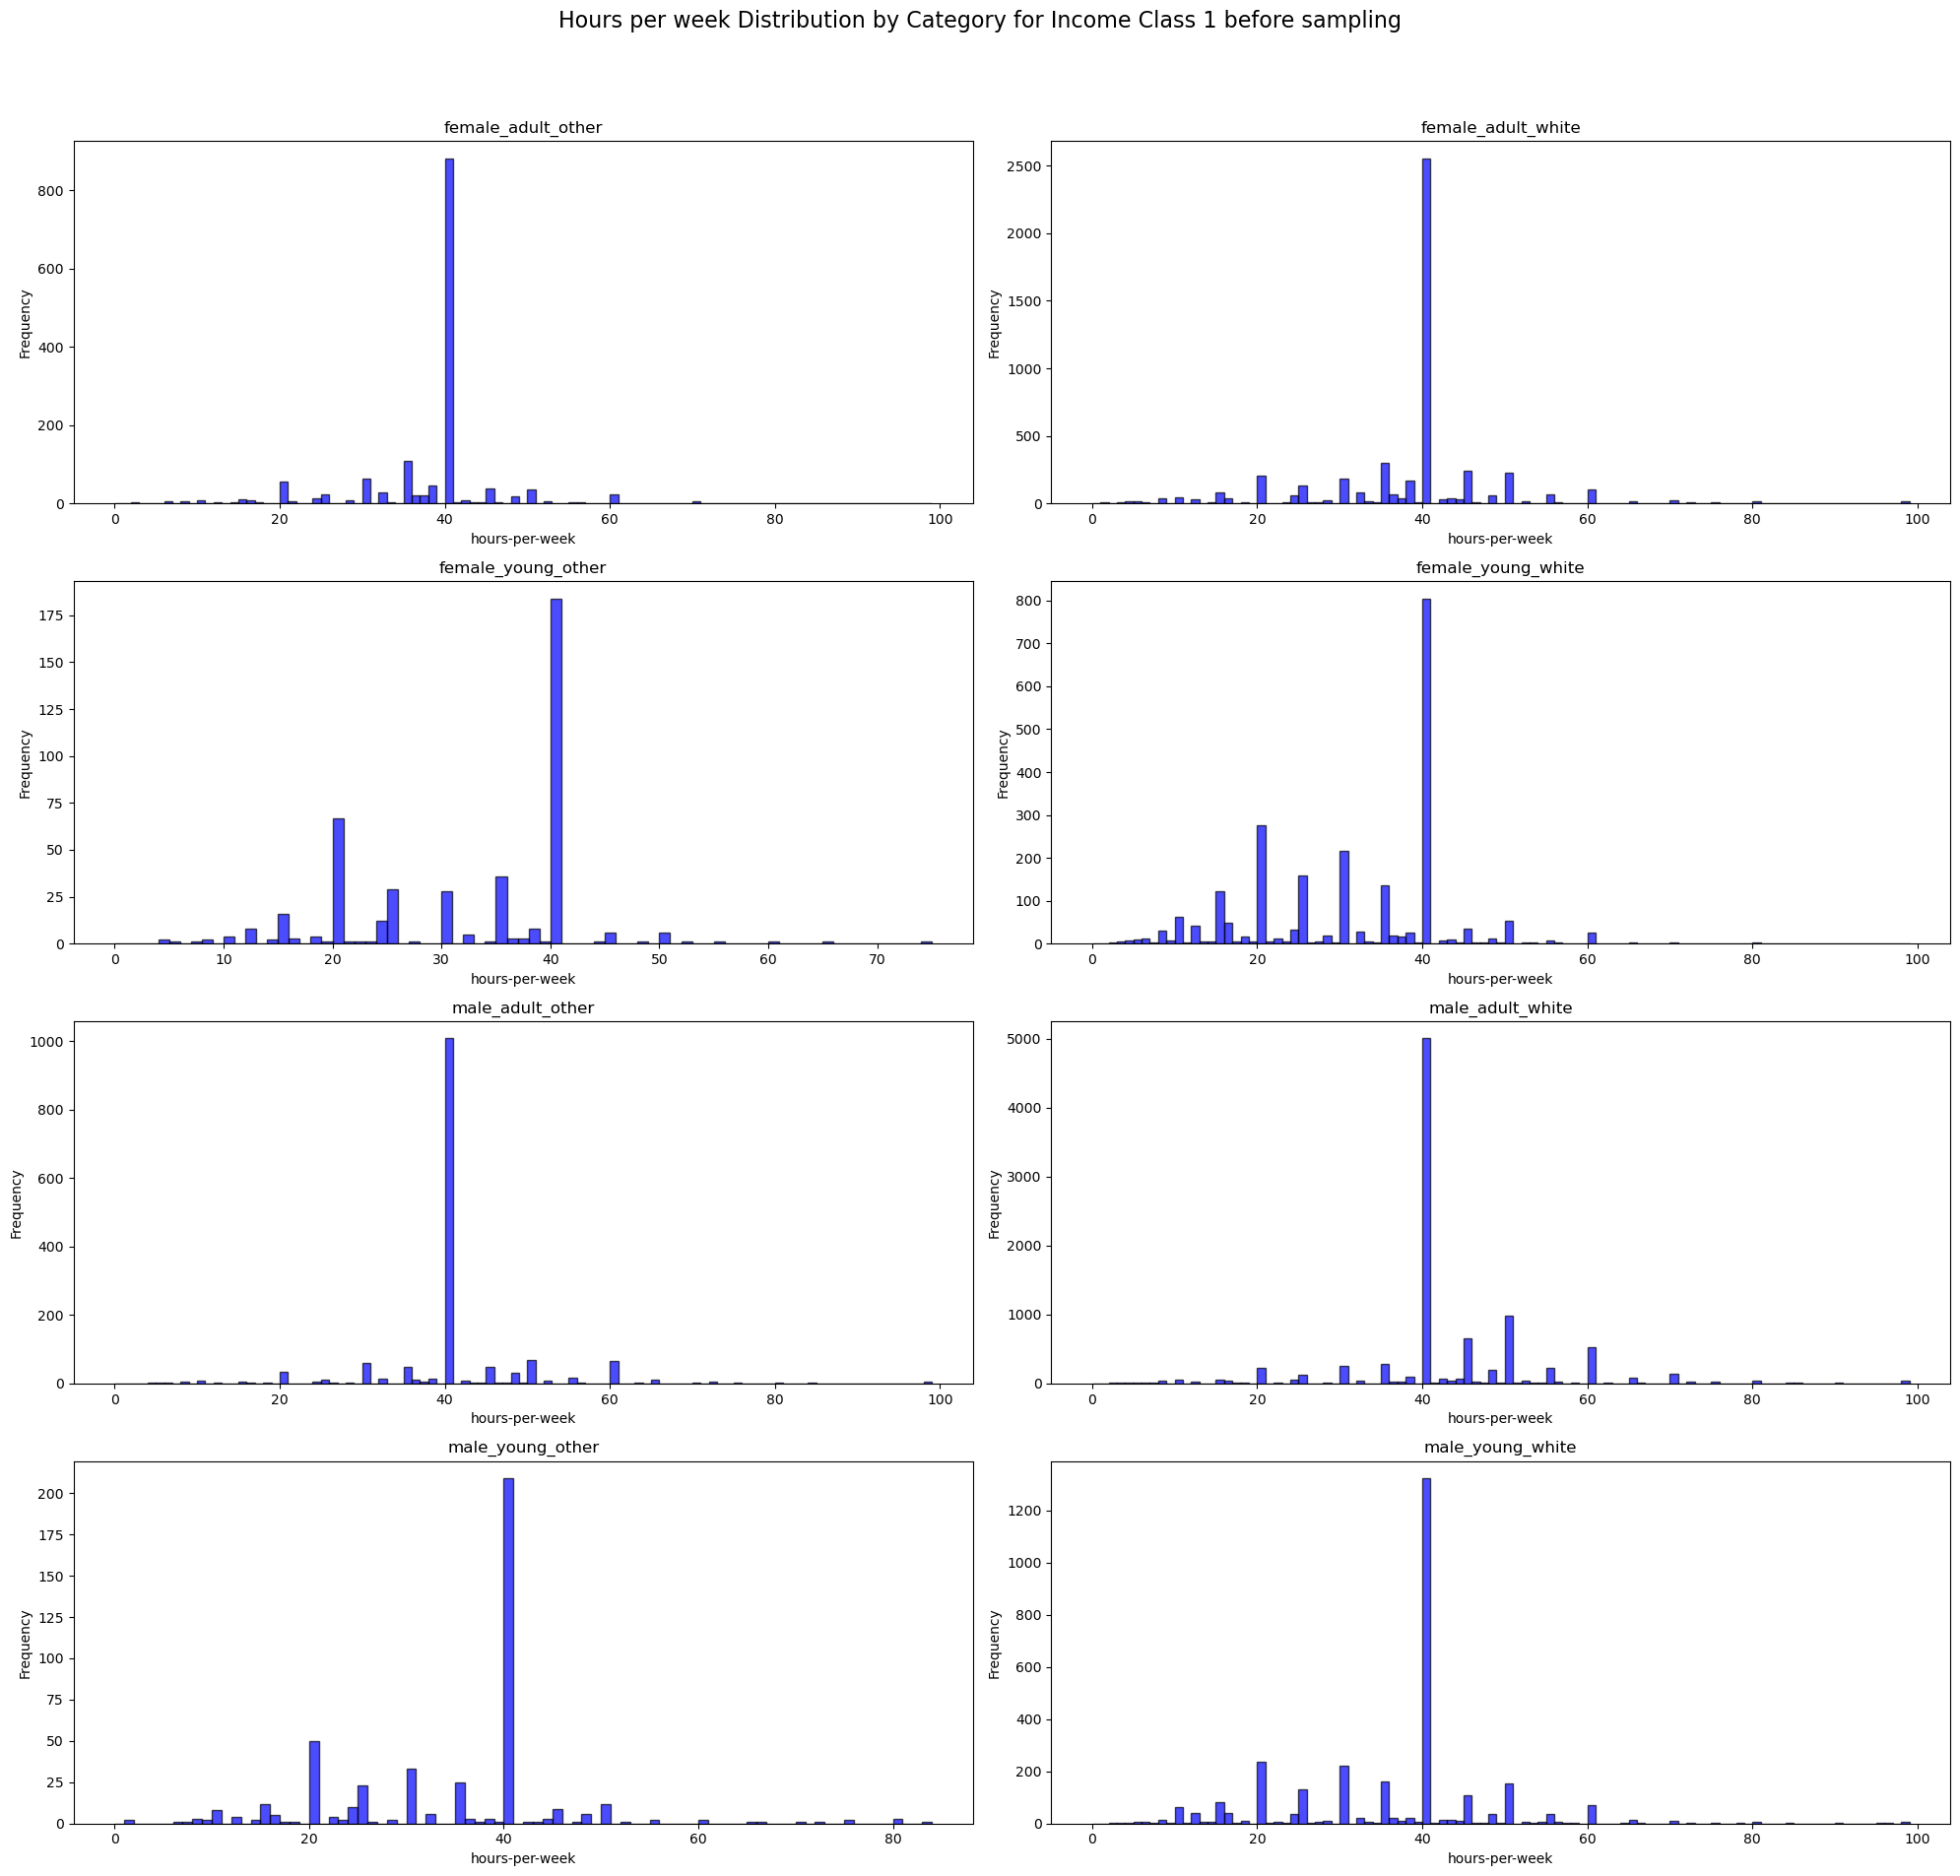

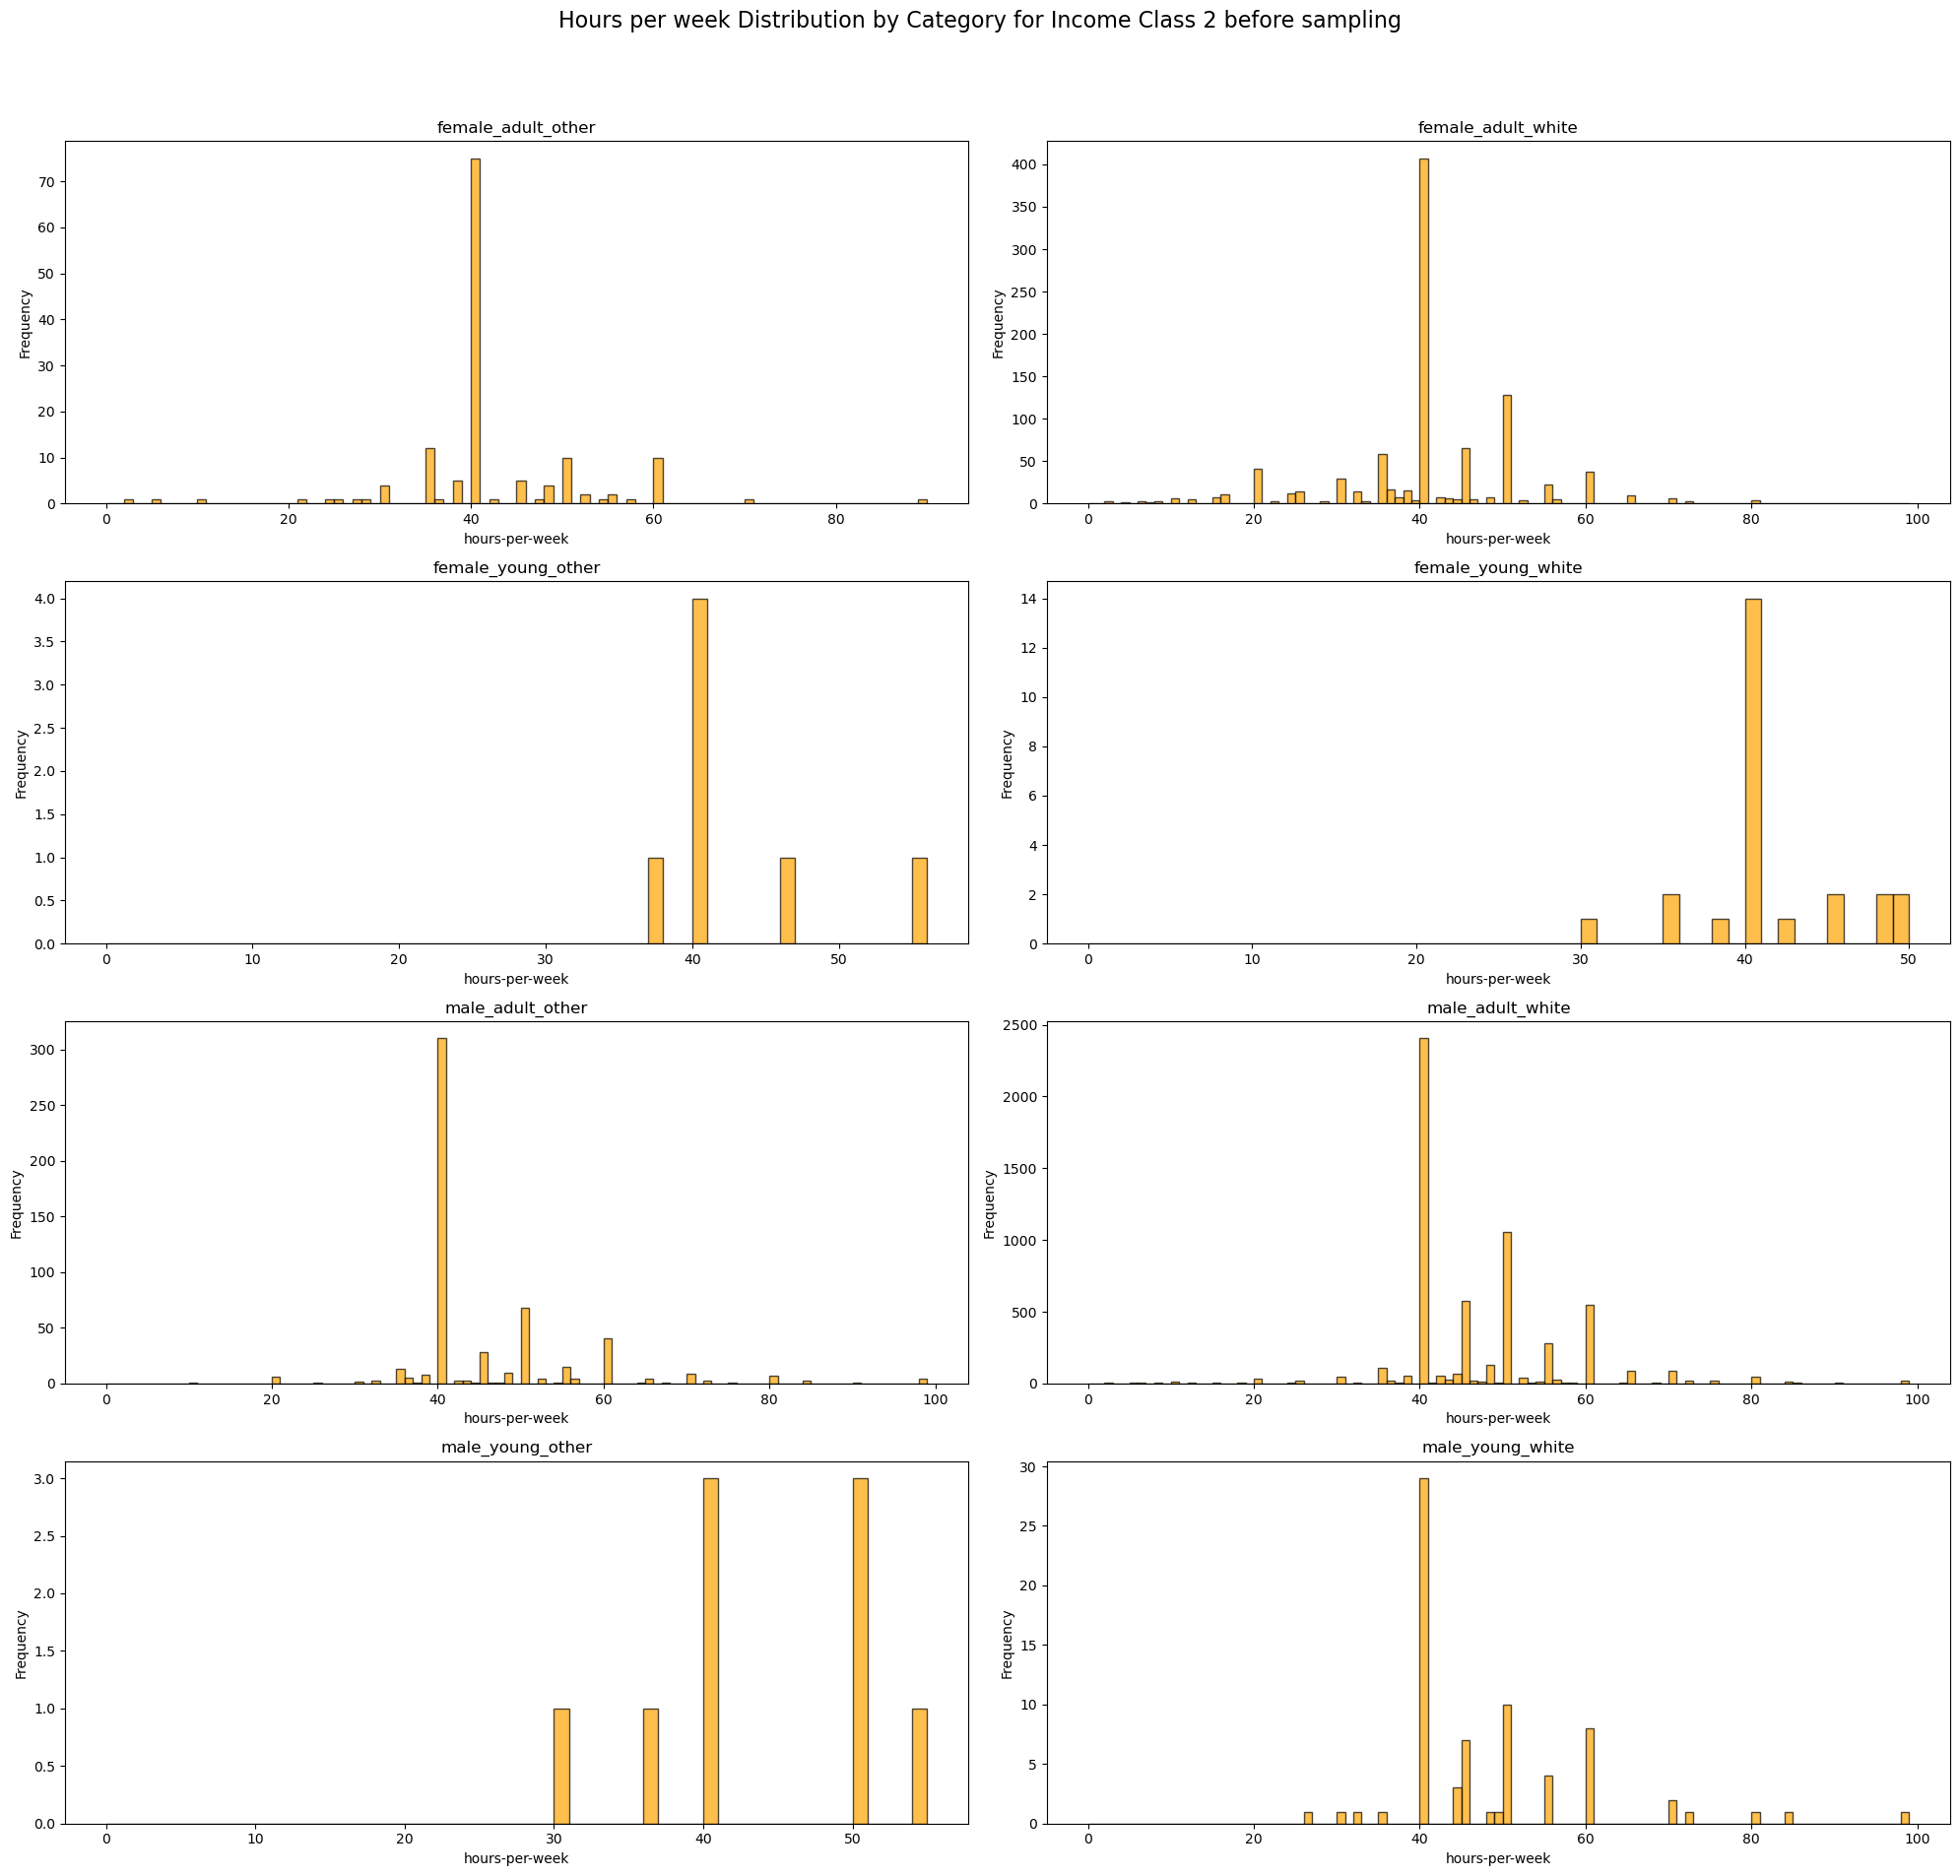

In [302]:
import matplotlib.pyplot as plt
# Prepare the dataset with the one-hot encoded features and necessary columns for plotting
plotting_data = data[['hours-per-week', 'income_Class']].join(combined_one_hot_encoded)


# Set up the plotting environment for Class 1
plt.figure(figsize=(20, 20))
plt.suptitle('Hours per week Distribution by Category for Income Class 1 before sampling', fontsize=16)

for i, column in enumerate(combined_one_hot_encoded.columns, start=1):
    plt.subplot(4, 2, i)  # Adjust layout for 8 plots in one figure
    filtered_data_class_1 = plotting_data[(plotting_data[column] == 1) & (plotting_data['income_Class'] == 1)]
    plt.hist(filtered_data_class_1['hours-per-week'], bins=range(0, filtered_data_class_1['hours-per-week'].max() + 1), alpha=0.7, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel('hours-per-week')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Set up the plotting environment for Class 2
plt.figure(figsize=(20, 20))
plt.suptitle('Hours per week Distribution by Category for Income Class 2 before sampling', fontsize=16)

for i, column in enumerate(combined_one_hot_encoded.columns, start=1):
    plt.subplot(4, 2, i)  # Adjust layout for 8 plots in one figure
    filtered_data_class_2 = plotting_data[(plotting_data[column] == 1) & (plotting_data['income_Class'] == 2)]
    plt.hist(filtered_data_class_2['hours-per-week'], bins=range(0, filtered_data_class_2['hours-per-week'].max() + 1), alpha=0.7, color='orange', edgecolor='black')
    plt.title(column)
    plt.xlabel('hours-per-week')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd


# Placeholder feature and target columns
X = new_data.drop('income_Class', axis=1)  
y = new_data['income_Class'].replace({1: 0, 2: 1})

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define preprocessing for numeric and categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


{1: [0.7589806570463616, 0.7592137592137592, 0.7592137592137592, 0.7592137592137592, 0.7592137592137592, 0.7592137592137592, 0.7592137592137592, 0.7592137592137592, 0.7592137592137592, 0.7592137592137592], 2: [0.8059564015965612, 0.808046683046683, 0.8022113022113022, 0.7988329238329238, 0.8046683046683046, 0.7994471744471745, 0.8034398034398035, 0.8034398034398035, 0.8049754299754299, 0.8083538083538083], 3: [0.8200798280626344, 0.8218673218673219, 0.8151105651105651, 0.8138820638820639, 0.8187960687960688, 0.8135749385749386, 0.8215601965601965, 0.8172604422604423, 0.8194103194103194, 0.8249385749385749], 4: [0.8213079521031624, 0.8249385749385749, 0.8166461916461917, 0.8126535626535627, 0.8181818181818182, 0.816031941031941, 0.8206388206388207, 0.8184889434889435, 0.8206388206388207, 0.8246314496314496], 5: [0.8314399754375192, 0.8307739557739557, 0.8283169533169533, 0.8313882063882064, 0.8283169533169533, 0.8286240786240786, 0.8366093366093366, 0.8249385749385749, 0.829238329238329

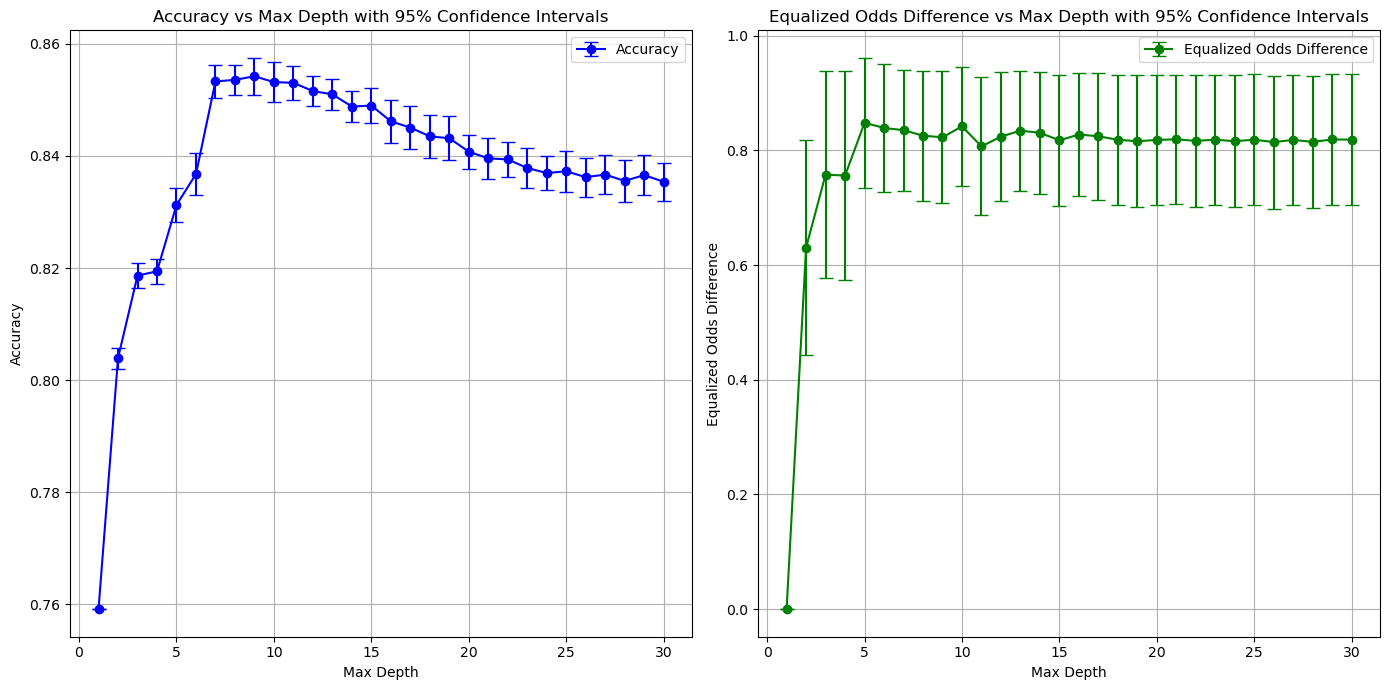

In [308]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
max_depth_range = range(1, 31)  # max_depth from 1 to 30
accuracies = {depth: [] for depth in max_depth_range}
eods = {depth: [] for depth in max_depth_range}

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for depth in max_depth_range:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies[depth].append(acc)

        # Calculate EOD
        mf = MetricFrame(metrics={'tpr': true_positive_rate, 'fpr': false_positive_rate},
                         y_true=y_test,
                         y_pred=y_pred,
                         sensitive_features=X_test[['female_adult_other', 'female_adult_white', 'female_young_other',
                             'female_young_white', 'male_adult_other', 'male_adult_white', 'male_young_other',
                             'male_young_white']])
        eod = max(mf.difference(method='between_groups')['tpr'], mf.difference(method='between_groups')['fpr'])
        eods[depth].append(eod)

# Calculate mean and confidence intervals for accuracies and eod
mean_accuracies = [np.mean(accuracies[depth]) for depth in max_depth_range]
sem_accuracies = [np.std(accuracies[depth]) / np.sqrt(len(accuracies[depth])) * 1.96 for depth in max_depth_range] 

mean_eods = [np.mean(eods[depth]) for depth in max_depth_range]
sem_eods = [np.std(eods[depth]) / np.sqrt(len(eods[depth])) * 1.96 for depth in max_depth_range]


plt.figure(figsize=(14, 7))

# Plot for Accuracy
plt.subplot(1, 2, 1)
plt.errorbar(max_depth_range, mean_accuracies, yerr=sem_accuracies, label='Accuracy', fmt='-o', capsize=5, color='blue')
plt.title('Accuracy vs Max Depth with 95% Confidence Intervals')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot for Equalized Odds Difference
plt.subplot(1, 2, 2)
plt.errorbar(max_depth_range, mean_eods, yerr=sem_eods, label='Equalized Odds Difference', fmt='-o', capsize=5, color='green')
plt.title('Equalized Odds Difference vs Max Depth with 95% Confidence Intervals')
plt.xlabel('Max Depth')
plt.ylabel('Equalized Odds Difference')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



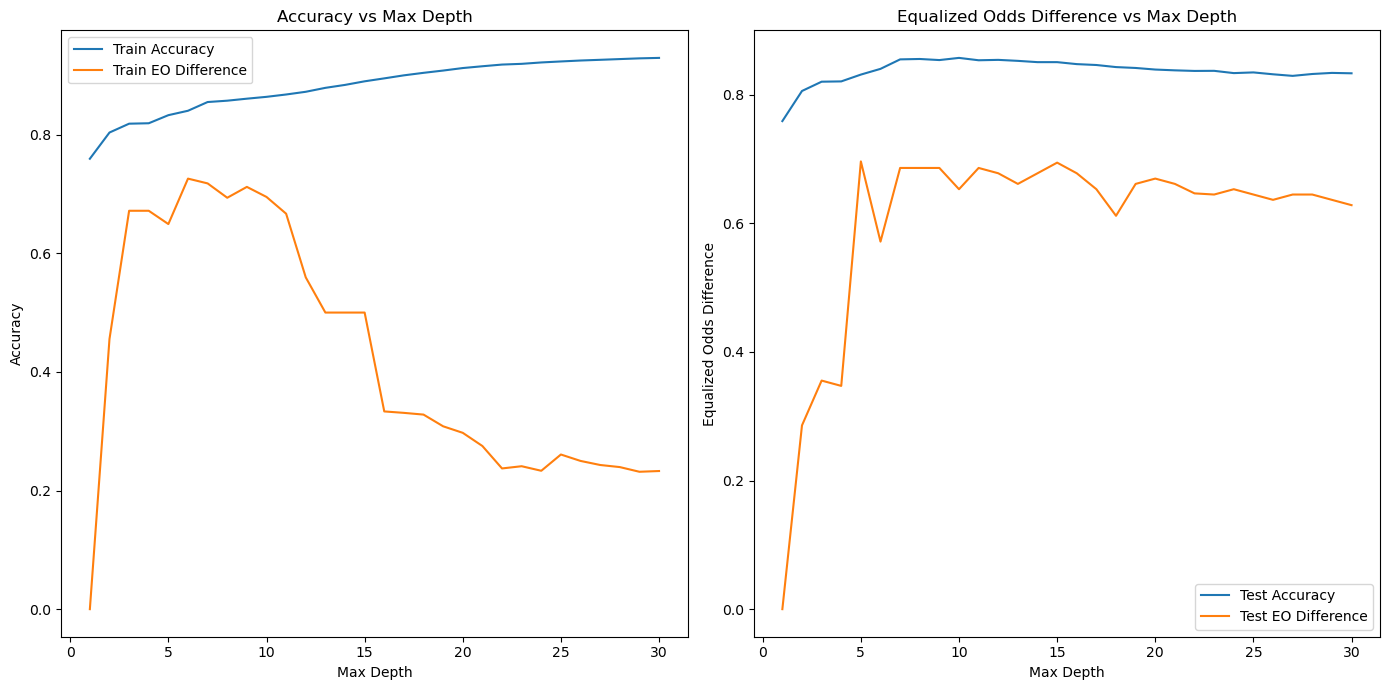

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, equalized_odds_difference

def compute_eod_and_accuracy(clf, X, y, sensitive_attr):
    predictions = clf.predict(X)
    accuracy = accuracy_score(y, predictions)

    # Calculate Equalized Odds Difference using Fairlearn's MetricFrame
    mf = MetricFrame(metrics={
                        'tpr': true_positive_rate, 
                        'fpr': false_positive_rate
                     },
                     y_true=y, 
                     y_pred=predictions, 
                     sensitive_features=sensitive_attr.idxmax(axis=1))
    
    eo_diff = max(mf.difference(method='between_groups')['tpr'], 
                  mf.difference(method='between_groups')['fpr'])
    
    return accuracy, eo_diff

max_depths = range(1, 31)
train_accuracies = []
test_accuracies = []
train_eods = []
test_eods = []

# Ensure sensitive_attr is correctly formatted before looping
sensitive_attr_train = X_train[['female_adult_other', 'female_adult_white', 'female_young_other',
                             'female_young_white', 'male_adult_other', 'male_adult_white', 'male_young_other',
                             'male_young_white']]
sensitive_attr_test = X_test[['female_adult_other', 'female_adult_white', 'female_young_other',
                             'female_young_white', 'male_adult_other', 'male_adult_white', 'male_young_other',
                             'male_young_white']]

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Compute metrics for training data
    train_accuracy, train_eod = compute_eod_and_accuracy(clf, X_train, y_train, sensitive_attr_train)
    train_accuracies.append(train_accuracy)
    train_eods.append(train_eod)

    # Compute metrics for testing data
    test_accuracy, test_eod = compute_eod_and_accuracy(clf, X_test, y_test, sensitive_attr_test)
    test_accuracies.append(test_accuracy)
    test_eods.append(test_eod)

    
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_accuracies, label='Train Accuracy')
plt.plot(max_depths, train_eods, label='Train EO Difference')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy and Equalized odd')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.plot(max_depths, test_eods, label='Test EO Difference')
plt.title('Equalized Odds Difference vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuarcy and Equalized Odds Difference')
plt.legend()

plt.tight_layout()
plt.show()



In [307]:
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

def compute_node_eod(tree, X, y, sensitive_attr):
    accuracies = np.zeros(tree.tree_.node_count)
    eo_diff = np.zeros(tree.tree_.node_count)  # Equalized Odds Difference storage

    # Decision path for all samples
    node_indicator = tree.decision_path(X)

    for node_id in range(tree.tree_.node_count):
        node_samples = node_indicator[:, node_id].toarray().ravel().astype(bool)
        node_labels = y[node_samples]
        sensitive_labels = sensitive_attr[node_samples]

        if len(node_labels) == 0:
            continue

        # Most common label predicted at this node
        most_common = np.argmax(tree.tree_.value[node_id])
        predictions = np.full(node_labels.shape, most_common)

        accuracies[node_id] = np.mean(predictions == node_labels)
                # Compute EO difference using Fairlearn's MetricFrame directly
        mf = MetricFrame(
            metrics={
                'tpr': true_positive_rate,
                'fpr': false_positive_rate,
                'accuracy_score': accuracy_score
            },
            y_true=node_labels,
            y_pred=predictions,
            sensitive_features=sensitive_labels
        )

        # Calculate EO difference: max difference in TPR and FPR across groups
        tpr_diff = mf.difference(method='between_groups')
        fpr_diff = mf.difference(method='between_groups')
        #print(tpr_diff)
        eo_diff[node_id] = max(tpr_diff.max(), fpr_diff.max())
        


    return accuracies, eo_diff

sensitive_attr = X_train[['female_adult_other', 'female_adult_white', 'female_young_other',
                             'female_young_white', 'male_adult_other', 'male_adult_white', 'male_young_other',
                             'male_young_white']]
#sensitive_attr = sensitive_attr.idxmax(axis=1)
#sensitive_attr_flat = sensitive_attr.values.ravel()
node_accuracies, eo_diff = compute_node_eod(clf, X_train, y_train, sensitive_attr)
#print(eo_diff[i])
fig, ax = plt.subplots(figsize=(20, 10))
tree_plot = plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["0", "1"], ax=ax)

# Annotating with accuracies and EO differences
for i, text in enumerate(tree_plot):
    if i < len(node_accuracies):  # Ensure there's a corresponding metric to display
        metrics_text = f'\nAccuracy = {node_accuracies[i]:.2f}'
        metrics_text += f'\nEO Diff = {eo_diff[i]:.2f}'
        text.set_text(text.get_text() + metrics_text)

plt.show()


0.8200522032857362


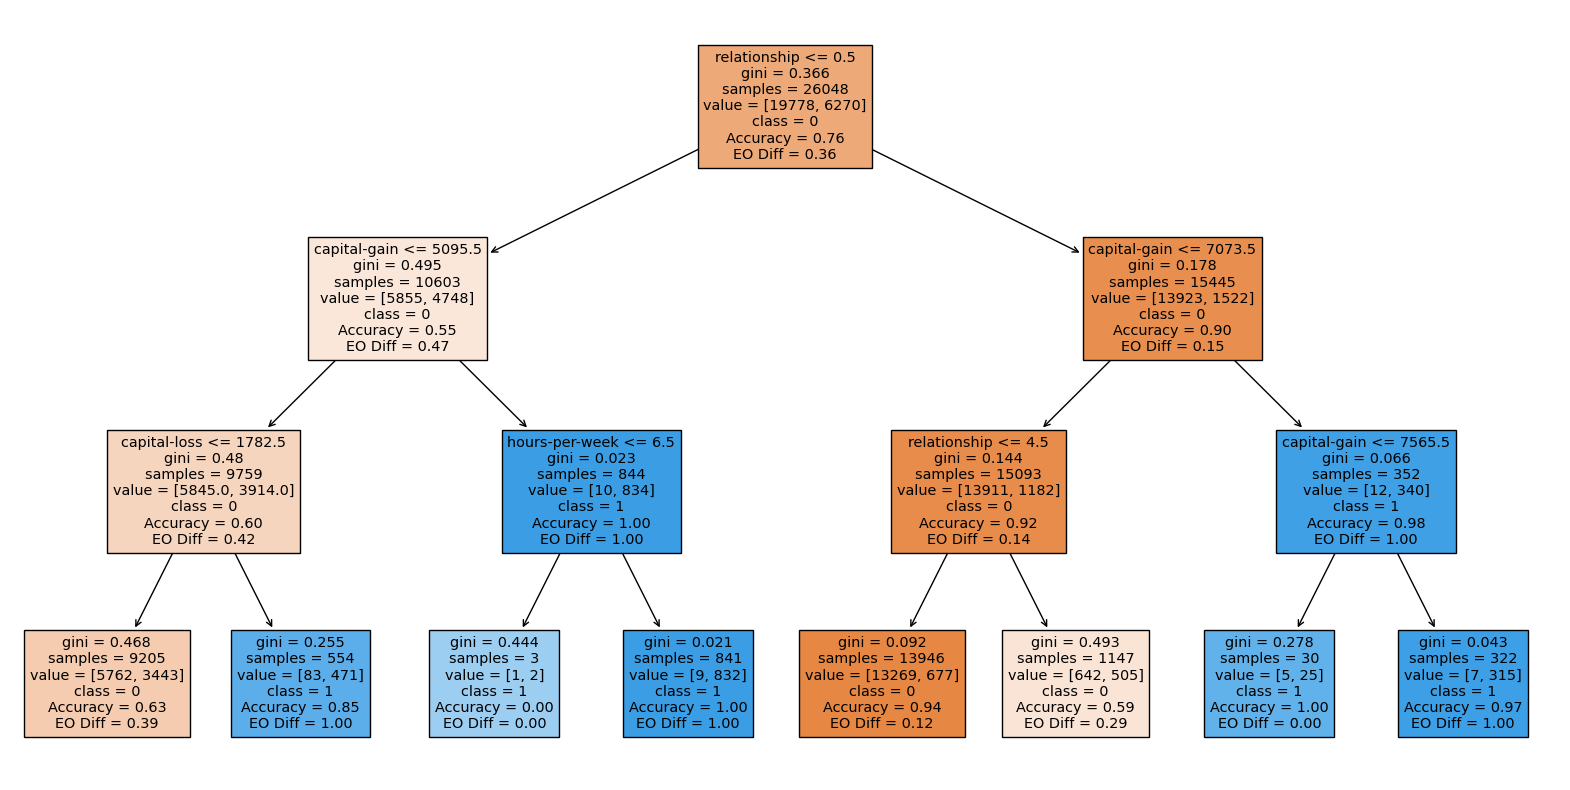

0.8184121621621622
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4942
           1       0.95      0.27      0.42      1571

    accuracy                           0.82      6513
   macro avg       0.88      0.63      0.66      6513
weighted avg       0.84      0.82      0.78      6513



In [244]:

clf = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

def compute_node_eod(tree, X, y, sensitive_attr):
    accuracies = np.zeros(tree.tree_.node_count)
    eo_diff = np.zeros(tree.tree_.node_count) 
    
    node_indicator = tree.decision_path(X)
    
    for node_id in range(tree.tree_.node_count):
        node_samples = node_indicator[:, node_id].toarray().ravel().astype(bool)
        if not any(node_samples):
            continue  

        node_labels = y[node_samples]
        node_sensitive = sensitive_attr[node_samples]
        
        # Most common label predicted at this node
        most_common = np.argmax(tree.tree_.value[node_id])
        predictions = np.full(len(node_labels), most_common)
        
        accuracies[node_id] = np.mean(predictions == node_labels)
        
        mf = MetricFrame(
            metrics={
                'tpr': true_positive_rate,
                'fpr': false_positive_rate,
                'accuracy': accuracy_score,
                
            },
            y_true=node_labels,
            y_pred=predictions,
            sensitive_features=node_sensitive
        )
        
        tpr_diff = mf.difference(method='between_groups')
        fpr_diff = mf.difference(method='between_groups')
        eo_diff[node_id] = max(tpr_diff.max(), fpr_diff.max())  # Maximum difference for EO
        
        #eo_diff[node_id] =  equalized_odds_difference(y_true=y_test, y_pred=y_predic,
                                                      #sensitive_features=sensitive_attr)
    return accuracies, eo_diff


# Assuming sensitive_attr is part of your DataFrame
sensitive_attr = X_test[['female_adult_other', 'female_adult_white', 'female_young_other',
                             'female_young_white', 'male_adult_other', 'male_adult_white', 'male_young_other',
                             'male_young_white']]

node_accuracies, node_eod = compute_node_eod(clf, X_test, y_test, sensitive_attr)

fig, ax = plt.subplots(figsize=(20, 10))
tree_plot = plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["0", "1"], ax=ax)

# Annotating with accuracies and EO difference
for i, text in enumerate(tree_plot):
    if i < len(node_accuracies):  
        metrics_text = f'\nAccuracy = {node_accuracies[i]:.2f}'
        metrics_text += f'\nEO Diff = {node_eod[i]:.2f}'
        text.set_text(text.get_text() + metrics_text)

plt.show()

y_new = clf.predict(X_train)
print(accuracy_score(y_new, y_train))
print(classification_report(y_test, y_pred))

In [16]:
# Logistic Regression Pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

# Decision Tree Pipeline
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(max_depth=3,random_state=42))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Train the Decision Tree model
dt_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['capital-gain', 'capital-loss', 'hours-per-week', 'female_adult_other',
       'female_adult_white', 'female_young_other', 'female_young_white',
       'male_adult_other', 'male_adult_white', 'male_young_other',
       'male_young_white'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [17]:
from sklearn.metrics import roc_auc_score
# Predictions with Logistic Regression
lr_preds = lr_pipeline.predict(X_test)
lr_proba = lr_pipeline.predict_proba(X_test)[:, 1]

# Predictions with Decision Tree
dt_preds = dt_pipeline.predict(X_test)
dt_proba = dt_pipeline.predict_proba(X_test)[:, 1]

# Accuracy scores
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_proba)

dt_accuracy = accuracy_score(y_test, dt_preds)
dt_auc = roc_auc_score(y_test, dt_proba)

print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'Logistic Regression AUC: {lr_auc}')

print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree AUC: {dt_auc}')


Logistic Regression Accuracy: 0.8051589129433441
Logistic Regression AUC: 0.8067501541110491
Decision Tree Accuracy: 0.8036235221863964
Decision Tree AUC: 0.7388414713155095


In [245]:
from fairlearn.metrics import MetricFrame, equalized_odds_difference
from sklearn.metrics import recall_score

sensitive_features = X_test[['female_adult_other', 'female_adult_white', 'female_young_other',
                             'female_young_white', 'male_adult_other', 'male_adult_white', 'male_young_other',
                             'male_young_white']]
sensitive_feature_single = sensitive_features.idxmax(axis=1)

# Define the metric you want to evaluate (True Positive Rate here as an example)
def true_positive_rate(y_true, y_pred):
    return recall_score(y_true, y_pred)

# Create a MetricFrame for Equalized Odds Difference calculation using the corrected sensitive_features reference
mf_lr = MetricFrame(metrics=true_positive_rate,
                    y_true=y_test,
                    y_pred=lr_preds,
                    sensitive_features=sensitive_feature_single)  # Use the variable directly

mf_dt = MetricFrame(metrics=true_positive_rate,
                    y_true=y_test,
                    y_pred=y_pred,
                    sensitive_features=sensitive_feature_single)  # Use the variable directly

# Calculate Equalized Odds Difference using the corrected sensitive_features reference
eod_lr = equalized_odds_difference(y_true=y_test, y_pred=lr_preds, sensitive_features=sensitive_feature_single)
eod_dt = equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_feature_single)

print(f"Equalized Odds Difference for Logistic Regression: {eod_lr}")
print(f"Equalized Odds Difference for Decision Tree: {eod_dt}")

# Additionally, you might want to look into the breakdown by group
print("\nMetric Frame for Logistic Regression:")
print(mf_lr.by_group)

print("\nMetric Frame for Decision Tree:")
print(mf_dt.by_group)




Equalized Odds Difference for Logistic Regression: 0.14285714285714285
Equalized Odds Difference for Decision Tree: 0.35537190082644626

Metric Frame for Logistic Regression:
sensitive_feature_0
female_adult_other    0.050000
female_adult_white    0.049020
female_young_other    0.000000
female_young_white    0.125000
male_adult_other      0.074380
male_adult_white      0.059068
male_young_other      0.000000
male_young_white      0.142857
Name: true_positive_rate, dtype: float64

Metric Frame for Decision Tree:
sensitive_feature_0
female_adult_other    0.200000
female_adult_white    0.142157
female_young_other    0.000000
female_young_white    0.125000
male_adult_other      0.355372
male_adult_white      0.283694
male_young_other      0.000000
male_young_white      0.285714
Name: true_positive_rate, dtype: float64


In [246]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

sensitive_features = X_test[['female_adult_other', 'female_adult_white', 'female_young_other',
                             'female_young_white', 'male_adult_other', 'male_adult_white', 'male_young_other',
                             'male_young_white']]
sensitive_feature_single = sensitive_features.idxmax(axis=1)

# Define a metric to evaluate the positive prediction rate
def positive_prediction_rate(y_true, y_pred):
    # Here, we ignore y_true because we're interested in the rate of positive predictions, not their correctness
    return np.mean(y_pred)

# Create a MetricFrame for Statistical Parity calculation
mf_lr_stat_parity = MetricFrame(metrics=positive_prediction_rate,
                                y_true=y_test,  # This is necessary for the MetricFrame but not used in the metric calculation
                                y_pred=lr_preds,
                                sensitive_features=sensitive_feature_single)

mf_dt_stat_parity = MetricFrame(metrics=positive_prediction_rate,
                                y_true=y_test,  # This is also necessary but not used
                                y_pred=dt_preds,
                                sensitive_features=sensitive_feature_single)

# The difference in positive prediction rates between the most and least favored groups can serve as a measure of statistical parity
diff_lr_stat_parity = mf_lr_stat_parity.difference(method='between_groups')
diff_dt_stat_parity = mf_dt_stat_parity.difference(method='between_groups')

print(f"Difference in Positive Prediction Rates for Logistic Regression (Statistical Parity): {diff_lr_stat_parity}")
print(f"Difference in Positive Prediction Rates for Decision Tree (Statistical Parity): {diff_dt_stat_parity}")

# Additionally, to see the breakdown by group
print("\nPositive Prediction Rate by Group for Logistic Regression:")
print(mf_lr_stat_parity.by_group)

print("\nPositive Prediction Rate by Group for Decision Tree:")
print(mf_dt_stat_parity.by_group)


Difference in Positive Prediction Rates for Logistic Regression (Statistical Parity): 0.029551499944077297
Difference in Positive Prediction Rates for Decision Tree (Statistical Parity): 0.02483454174994286

Positive Prediction Rate by Group for Logistic Regression:
sensitive_feature_0
female_adult_other    0.051118
female_adult_white    0.056215
female_young_other    0.066667
female_young_white    0.071739
male_adult_other      0.058685
male_adult_white      0.059098
male_young_other      0.078652
male_young_white      0.080670
Name: positive_prediction_rate, dtype: float64

Positive Prediction Rate by Group for Decision Tree:
sensitive_feature_0
female_adult_other    0.054313
female_adult_white    0.056215
female_young_other    0.055556
female_young_white    0.065217
male_adult_other      0.070423
male_adult_white      0.064697
male_young_other      0.067416
male_young_white      0.079148
Name: positive_prediction_rate, dtype: float64


Proportional Sampling

In [247]:
#oversampling of class 2
data_class_1 = data[data['income_Class'] == 1]
data_class_2 = data[data['income_Class'] == 2]


data_class_2_oversampled = resample(data_class_2,
                                    replace=True, n_samples=len(data_class_1), 
                                    random_state=123) 

balanced_data = pd.concat([data_class_1, data_class_2_oversampled])


balanced_class_distribution = balanced_data['income_Class'].value_counts()
balanced_class_distribution

income_Class
1    24720
2    24720
Name: count, dtype: int64

In [249]:
combined_columns_balanced = balanced_data['sex'] + "_" + balanced_data['Age_class'] + "_" + balanced_data['race_class']
one_hot_encoded_balanced = pd.get_dummies(combined_columns_balanced)


column_sums_balanced = one_hot_encoded_balanced.sum()
print(column_sums_balanced)
sampled_balanced_df = pd.DataFrame()

balanced_data.reset_index(drop=True, inplace=True)
one_hot_encoded_balanced.reset_index(drop=True, inplace=True)
balanced_data_old = pd.concat([balanced_data, one_hot_encoded_balanced], axis=1)
categorical_features = balanced_data_old.select_dtypes(include=['object', 'bool'])
for col in categorical_features:
    le = LabelEncoder()
    balanced_data_old[col] = balanced_data_old[col].fillna('missing')
    balanced_data_old[col] = le.fit_transform(balanced_data_old[col])
    
balanced_data_old = balanced_data_old.drop(['Age_class', 'sex', 'age', 'race_class',  'fnlwgt', 'education-num'], axis = 1) 
X = balanced_data_old.drop('income_Class', axis=1)
y= balanced_data_old['income_Class'].replace({1:0, 2:1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)
balanced_data_with_one_hot = pd.concat([X_train, y_train], axis=1)

target_samples = 5000

# Iterate over each one-hot encoded column to sample with replacement
for column in one_hot_encoded_balanced.columns:
    # Filter rows where the category is indicated
    category_rows = balanced_data_with_one_hot[balanced_data_with_one_hot[column] == 1]
    
    # Sample with replacement from these rows to reach the target count
    sampled_rows = category_rows.sample(n=target_samples, replace=True, random_state=123)
    
    # Since we're sampling per category, each set of sampled rows will have the category set to 1 and the rest to 0
    # Reset the one-hot encoded columns to reflect only the current category
    for col in one_hot_encoded_balanced.columns:
        sampled_rows[col] = 0
    sampled_rows[column] = 1
    
    # Append the sampled rows to the new DataFrame
    sampled_balanced_df = pd.concat([sampled_balanced_df, sampled_rows])

final_sampled_counts = sampled_balanced_df[one_hot_encoded_balanced.columns].sum()

#print(sampled_balanced_df)
print(final_sampled_counts)



Female_Adult_Other     2029
Female_Adult_White     8362
Female_Young_Other      465
Female_Young_White     2422
Male_Adult_Other       3365
Male_Adult_White      29050
Male_Young_Other        487
Male_Young_White       3260
dtype: int64
Female_Adult_Other    5000
Female_Adult_White    5000
Female_Young_Other    5000
Female_Young_White    5000
Male_Adult_Other      5000
Male_Adult_White      5000
Male_Young_Other      5000
Male_Young_White      5000
dtype: int64


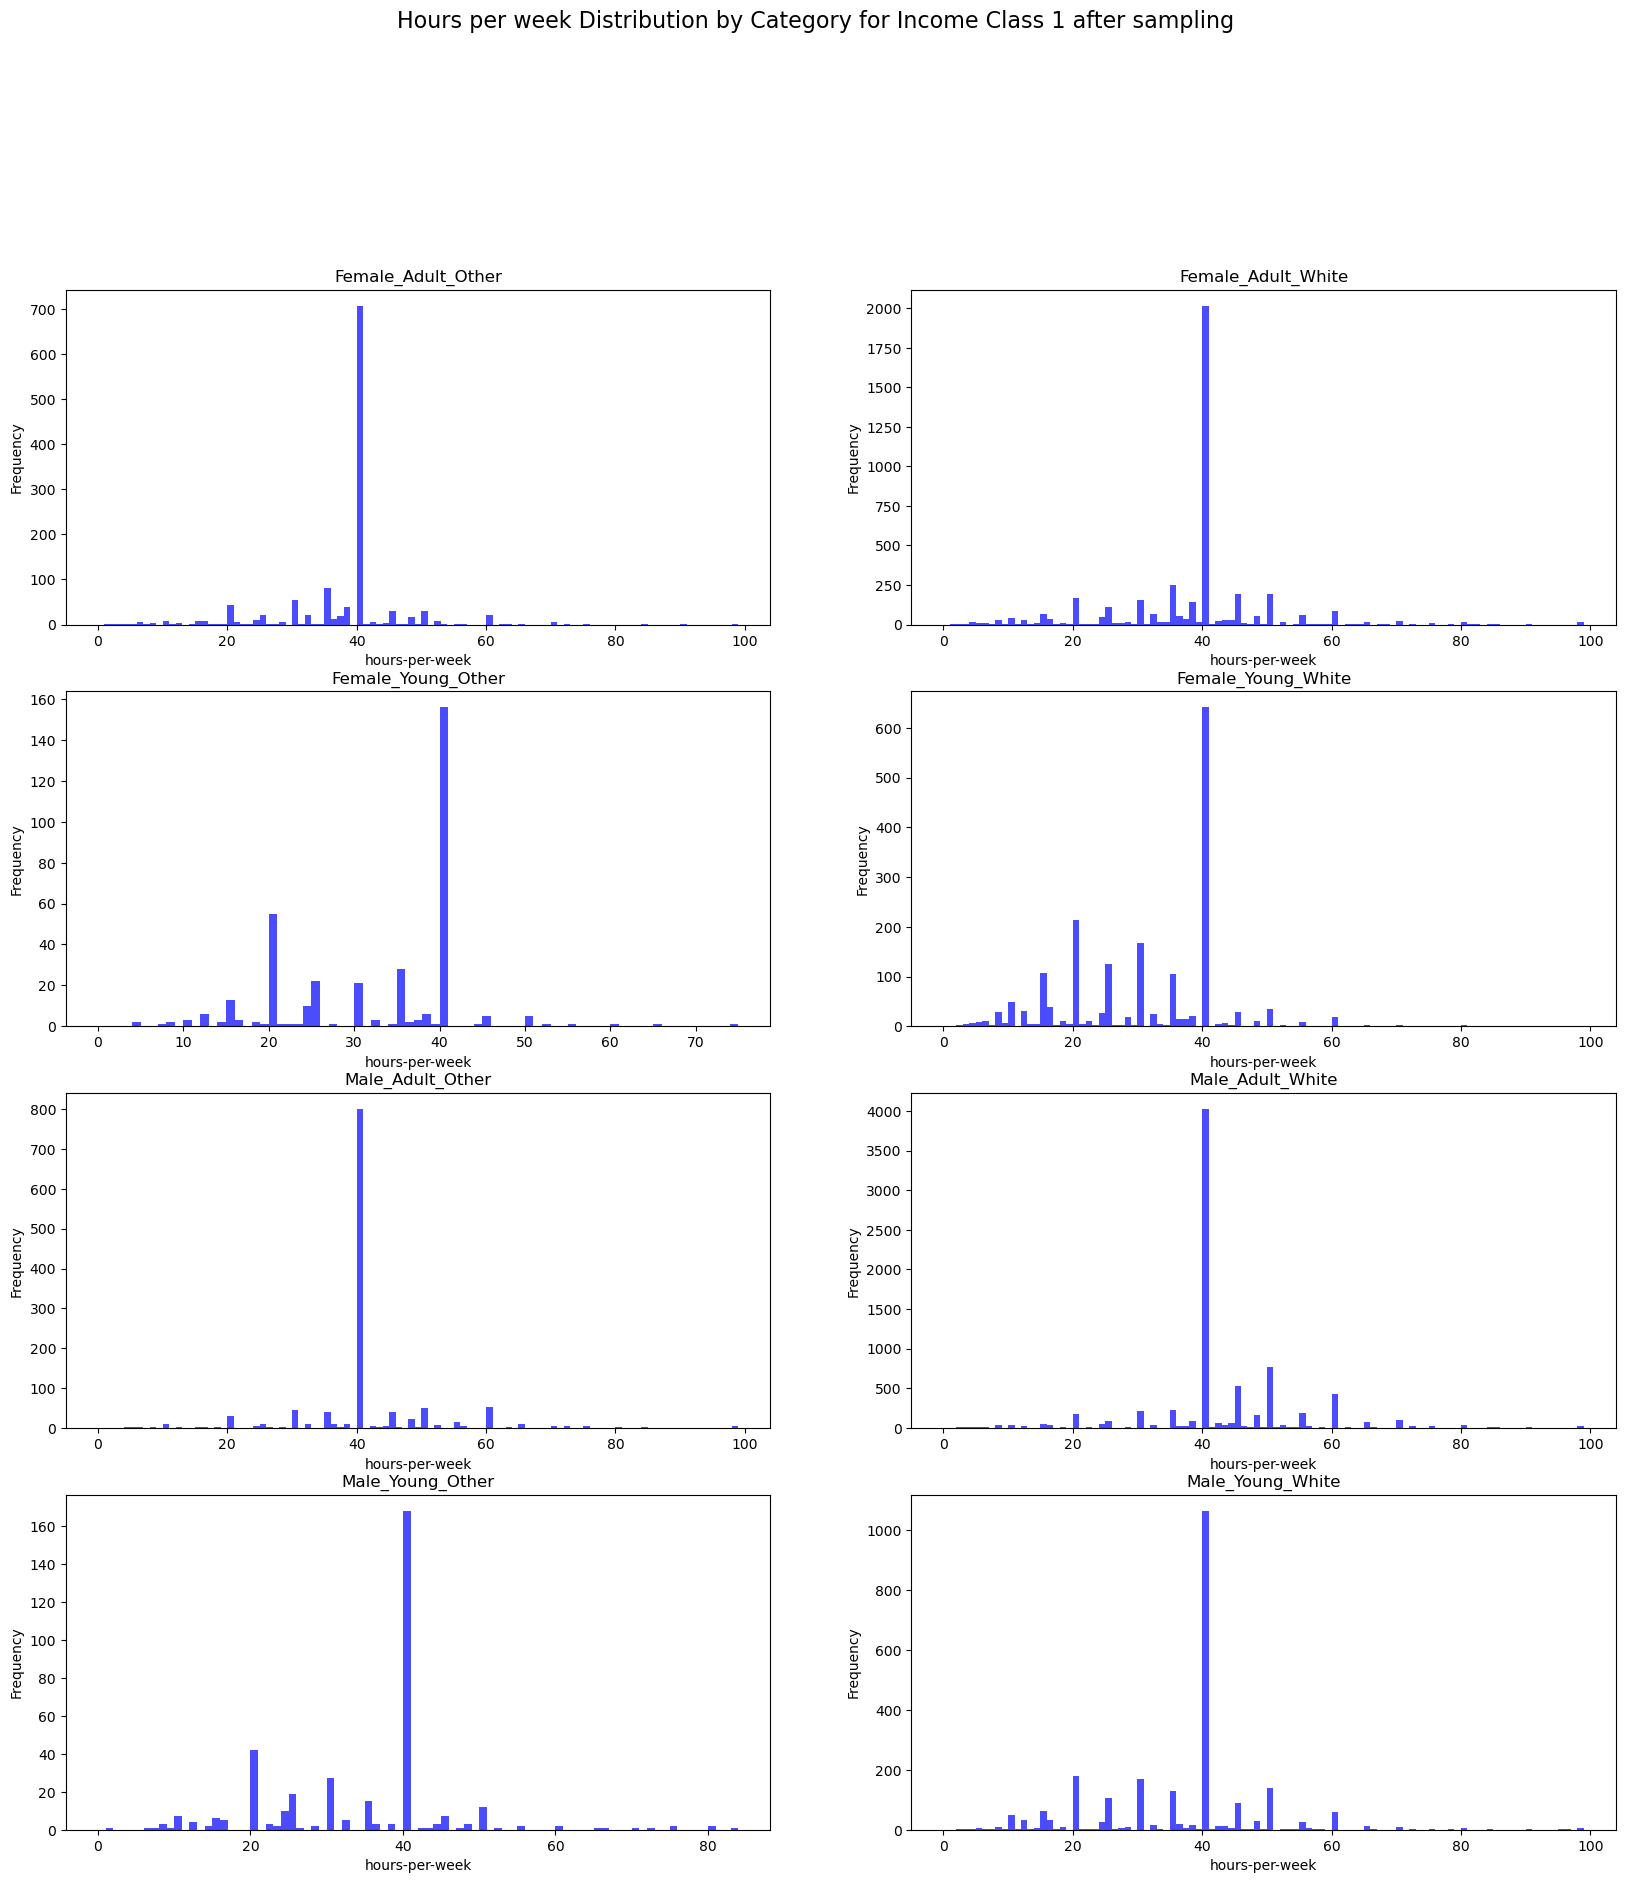

In [250]:
import matplotlib.pyplot as plt

# Define the layout for your subplots
plot_rows = 4  # Number of rows in the subplot grid
plot_cols = 2  # Number of columns in the subplot grid

# Set up the plotting environment for Class 1
plt.figure(figsize=(20, 20))
plt.suptitle('Hours per week Distribution by Category for Income Class 1 after sampling', fontsize=16, y=1.02)

# Plot for Class 1
for i, column in enumerate(one_hot_encoded_balanced.columns, start=1): 
    plt.subplot(plot_rows, plot_cols, i)
    # Filter data for the current category, for class 1
    category_class_1 = balanced_data_with_one_hot[(balanced_data_with_one_hot[column] == 1) & (balanced_data_with_one_hot['income_Class'] == 0)]
    # Plot histograms for class 1
    plt.hist(category_class_1['hours-per-week'], bins=range(0, category_class_1['hours-per-week'].max() + 1), alpha=0.7, color='blue')
    # Title and labels
    plt.title(column)
    plt.xlabel('hours-per-week')
    plt.ylabel('Frequency')

# Repeat for Class 2 in a new figure
plt.figure(figsize=(20, 20))
plt.suptitle('Hours per week Distribution by Category for Income Class 2 after sampling', fontsize=16, y=1.02)

# Plot for Class 2
for i, column in enumerate(one_hot_encoded_balanced.columns, start=1):  # Adjusted to include only the one-hot encoded columns
    plt.subplot(plot_rows, plot_cols, i)
    # Filter data for the current category, for class 2
    category_class_2 = balanced_data_with_one_hot[(balanced_data_with_one_hot[column] == 1) & (balanced_data_with_one_hot['income_Class'] == 1)]
    # Plot histograms for class 2
    plt.hist(category_class_2['hours-per-week'], bins=range(0, category_class_2['hours-per-week'].max() + 1), alpha=0.7, color='orange')
    # Title and labels
    plt.title(column)
    plt.xlabel('hours-per-week')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [257]:
X_train = sampled_balanced_df.drop(['income_Class'], axis=1)  
y_train = sampled_balanced_df['income_Class']


# Define preprocessing for numeric and categorical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [258]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, equalized_odds_difference

def compute_eod_and_accuracy(clf, X, y, sensitive_attr):
    predictions = clf.predict(X)
    accuracy = accuracy_score(y, predictions)

    # Calculate Equalized Odds Difference using Fairlearn's MetricFrame
    mf = MetricFrame(metrics={
                        'tpr': true_positive_rate, 
                        'fpr': false_positive_rate,
                        'accuracy': accuracy_score
                     },
                     y_true=y, 
                     y_pred=predictions, 
                     sensitive_features=sensitive_attr.idxmax(axis=1))
    
    eo_diff = max(mf.difference(method='between_groups')['tpr'], 
                  mf.difference(method='between_groups')['fpr'])
    
    return accuracy, eo_diff

max_depths = range(1, 31)
train_accuracies = []
test_accuracies = []
train_eods = []
test_eods = []

# Ensure sensitive_attr is correctly formatted before looping
sensitive_attr_train = X_train[['Female_Adult_Other', 'Female_Adult_White', 'Female_Young_Other',
                             'Female_Young_White', 'Male_Adult_Other', 'Male_Adult_White', 'Male_Young_Other',
                             'Male_Young_White']]
sensitive_attr_test = X_test[['Female_Adult_Other', 'Female_Adult_White', 'Female_Young_Other',
                             'Female_Young_White', 'Male_Adult_Other', 'Male_Adult_White', 'Male_Young_Other',
                             'Male_Young_White']]

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Compute metrics for training data
    train_accuracy, train_eod = compute_eod_and_accuracy(clf, X_train, y_train, sensitive_attr_train)
    train_accuracies.append(train_accuracy)
    train_eods.append(train_eod)

    # Compute metrics for testing data
    test_accuracy, test_eod = compute_eod_and_accuracy(clf, X_test, y_test, sensitive_attr_test)
    test_accuracies.append(test_accuracy)
    test_eods.append(test_eod)

    
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_accuracies, label='Train Accuracy')
plt.plot(max_depths, train_eods, label='Train EO Difference')
plt.title('Accuracy and EOD vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.plot(max_depths, test_eods, label='Test EO Difference')
plt.title('Accuracy and EOD vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Equalized Odds Difference')
plt.legend()

plt.tight_layout()
plt.show()



0.797532362459547


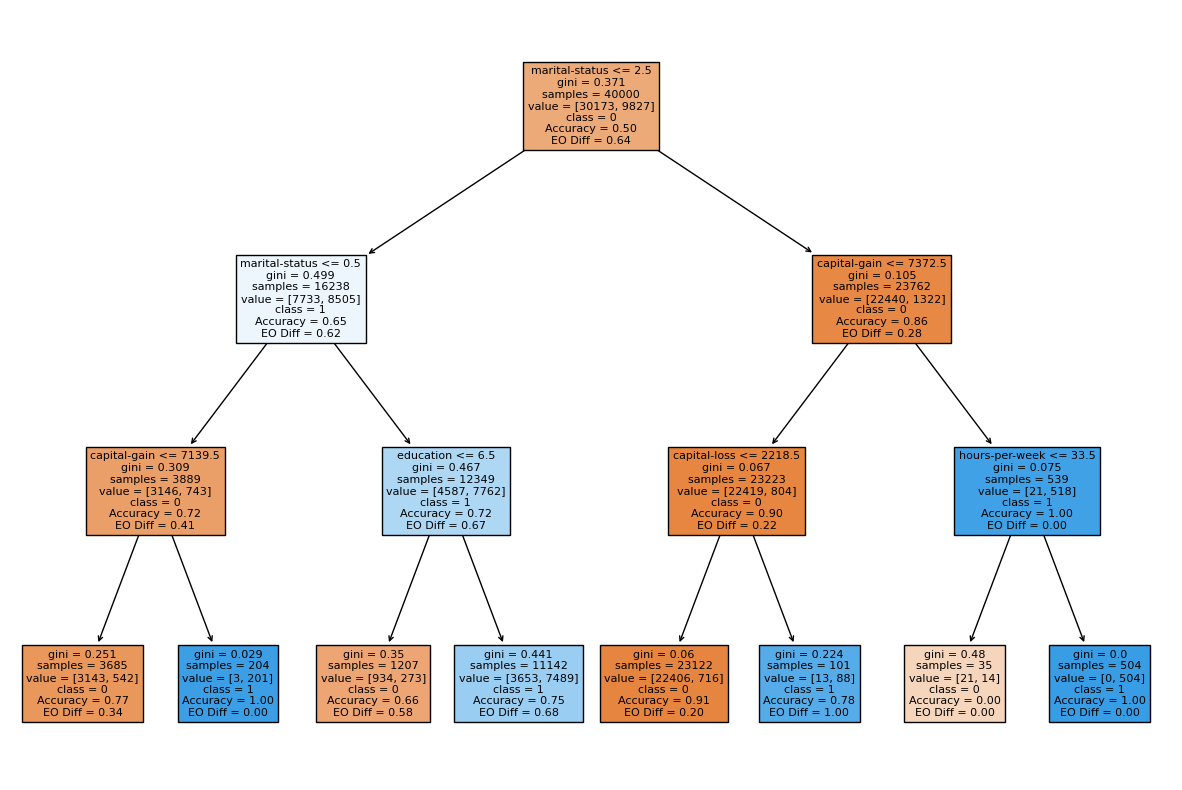

0.86965
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      4944
           1       0.76      0.87      0.81      4944

    accuracy                           0.80      9888
   macro avg       0.80      0.80      0.80      9888
weighted avg       0.80      0.80      0.80      9888



In [259]:

clf = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
clf.fit(X_train, y_train)
y_predic = clf.predict(X_test)
print(accuracy_score(y_test, y_predic))

def compute_node_eod(tree, X, y, sensitive_attr):
    accuracies = np.zeros(tree.tree_.node_count)
    eo_diff = np.zeros(tree.tree_.node_count) 
    
    node_indicator = tree.decision_path(X)
    
    for node_id in range(tree.tree_.node_count):
        node_samples = node_indicator[:, node_id].toarray().ravel().astype(bool)
        if not any(node_samples):
            continue  

        node_labels = y[node_samples]
        node_sensitive = sensitive_attr[node_samples]
        
        # Most common label predicted at this node
        most_common = np.argmax(tree.tree_.value[node_id])
        predictions = np.full(len(node_labels), most_common)
        
        accuracies[node_id] = np.mean(predictions == node_labels)
        
        mf = MetricFrame(
            metrics={
                'tpr': true_positive_rate,
                'fpr': false_positive_rate,
                'accuracy': accuracy_score
            },
            y_true=node_labels,
            y_pred=predictions,
            sensitive_features=node_sensitive
        )
        
        tpr_diff = mf.difference(method='between_groups')
        fpr_diff = mf.difference(method='between_groups')
        eo_diff[node_id] = max(tpr_diff.max(), fpr_diff.max())  # Maximum difference for EO
        
        #eo_diff[node_id] =  equalized_odds_difference(y_true=y_test, y_pred=y_predic,
                                                      #sensitive_features=sensitive_attr)
    return accuracies, eo_diff


# Assuming sensitive_attr is part of your DataFrame
sensitive_attr = X_test[['Female_Adult_Other', 'Female_Adult_White', 'Female_Young_Other',
                             'Female_Young_White', 'Male_Adult_Other', 'Male_Adult_White', 'Male_Young_Other',
                             'Male_Young_White']]

node_accuracies, node_eod = compute_node_eod(clf, X_test, y_test, sensitive_attr)

fig, ax = plt.subplots(figsize=(15, 10))
tree_plot = plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["0", "1"], ax=ax)

# Annotating with accuracies and EO difference
for i, text in enumerate(tree_plot):
    if i < len(node_accuracies):  
        metrics_text = f'\nAccuracy = {node_accuracies[i]:.2f}'
        metrics_text += f'\nEO Diff = {node_eod[i]:.2f}'
        text.set_text(text.get_text() + metrics_text)

plt.show()

y_new = clf.predict(X_train)
print(accuracy_score(y_new, y_train))
print(classification_report(y_test, y_predic))

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression Pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

# Decision Tree Pipeline
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(criterion= 'gini',random_state=42, max_depth=3))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Train the Decision Tree model
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['capital-gain', 'capital-loss', 'hours-per-week', 'Female_Adult_Other',
       'Female_Adult_White', 'Female_Young_Other', 'Female_Young_White',
       'Male_Adult_Other', 'Male_Adult_White', 'Male_Young_Other',
       'Male_Young_White'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [261]:
from sklearn.metrics import roc_auc_score
# Predictions with Logistic Regression
lr_preds = lr_pipeline.predict(X_test)
lr_proba = lr_pipeline.predict_proba(X_test)[:, 1]

# Predictions with Decision Tree
dt_preds = dt_pipeline.predict(X_test)
dt_proba = dt_pipeline.predict_proba(X_test)[:, 1]

# Accuracy scores
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_proba)

dt_accuracy = accuracy_score(y_test, dt_preds)
dt_auc = roc_auc_score(y_test, dt_proba)

print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'Logistic Regression AUC: {lr_auc}')

print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree AUC: {dt_auc}')


Logistic Regression Accuracy: 0.72582928802589
Logistic Regression AUC: 0.8109778344317193
Decision Tree Accuracy: 0.7101537216828478
Decision Tree AUC: 0.7709589309653231


In [264]:
from fairlearn.metrics import MetricFrame, equalized_odds_difference
from sklearn.metrics import recall_score

sensitive_features = X_test[['Female_Adult_Other', 'Female_Adult_White', 'Female_Young_Other',
                             'Female_Young_White', 'Male_Adult_Other', 'Male_Adult_White', 'Male_Young_Other',
                             'Male_Young_White']]
sensitive_feature_single = sensitive_features.idxmax(axis=1)

def true_positive_rate(y_true, y_pred):
    return recall_score(y_true, y_pred)


mf_lr = MetricFrame(metrics=true_positive_rate,
                    y_true=y_test,
                    y_pred=lr_preds,
                    sensitive_features=sensitive_feature_single)  

mf_dt = MetricFrame(metrics=true_positive_rate,
                    y_true=y_test,
                    y_pred=y_predic,
                    sensitive_features=sensitive_feature_single)  

# Calculate Equalized Odds Difference using the corrected sensitive_features reference
eod_lr = equalized_odds_difference(y_true=y_test, y_pred=lr_preds, sensitive_features=sensitive_feature_single)
eod_dt = equalized_odds_difference(y_true=y_test, y_pred=y_predic, sensitive_features=sensitive_feature_single)

print(f"Equalized Odds Difference for Logistic Regression: {eod_lr}")
print(f"Equalized Odds Difference for Decision Tree: {eod_dt}")

# Additionally, you might want to look into the breakdown by group
print("\nMetric Frame for Logistic Regression:")
print(mf_lr.by_group)

print("\nMetric Frame for Decision Tree:")
print(mf_dt.by_group)

Equalized Odds Difference for Logistic Regression: 0.9503267973856209
Equalized Odds Difference for Decision Tree: 0.4633114218689125

Metric Frame for Logistic Regression:
sensitive_feature_0
Female_Adult_Other    0.271028
Female_Adult_White    0.356800
Female_Young_Other    0.000000
Female_Young_White    0.000000
Male_Adult_Other      0.546012
Male_Adult_White      0.950327
Male_Young_Other      0.500000
Male_Young_White      0.100000
Name: true_positive_rate, dtype: float64

Metric Frame for Decision Tree:
sensitive_feature_0
Female_Adult_Other    0.710280
Female_Adult_White    0.753600
Female_Young_Other    1.000000
Female_Young_White    0.800000
Male_Adult_Other      0.855828
Male_Adult_White      0.900392
Male_Young_Other      0.750000
Male_Young_White      0.800000
Name: true_positive_rate, dtype: float64


In [265]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

sensitive_features = X_test[['Female_Adult_Other', 'Female_Adult_White', 'Female_Young_Other',
                             'Female_Young_White', 'Male_Adult_Other', 'Male_Adult_White', 'Male_Young_Other',
                             'Male_Young_White']]
sensitive_feature_single = sensitive_features.idxmax(axis=1)

# Define a metric to evaluate the positive prediction rate
def positive_prediction_rate(y_true, y_pred):
    # Here, we ignore y_true because we're interested in the rate of positive predictions, not their correctness
    return np.mean(y_pred)

# Create a MetricFrame for Statistical Parity calculation
mf_lr_stat_parity = MetricFrame(metrics=positive_prediction_rate,
                                y_true=y_test,  # This is necessary for the MetricFrame but not used in the metric calculation
                                y_pred=lr_preds,
                                sensitive_features=sensitive_feature_single)

mf_dt_stat_parity = MetricFrame(metrics=positive_prediction_rate,
                                y_true=y_test,  # This is also necessary but not used
                                y_pred=y_predic,
                                sensitive_features=sensitive_feature_single)

# The difference in positive prediction rates between the most and least favored groups can serve as a measure of statistical parity
diff_lr_stat_parity = mf_lr_stat_parity.difference(method='between_groups')
diff_dt_stat_parity = mf_dt_stat_parity.difference(method='between_groups')

print(f"Difference in Positive Prediction Rates for Logistic Regression (Statistical Parity): {diff_lr_stat_parity}")
print(f"Difference in Positive Prediction Rates for Decision Tree (Statistical Parity): {diff_dt_stat_parity}")

# Additionally, to see the breakdown by group
print("\nPositive Prediction Rate by Group for Logistic Regression:")
print(mf_lr_stat_parity.by_group)

print("\nPositive Prediction Rate by Group for Decision Tree:")
print(mf_dt_stat_parity.by_group)


Difference in Positive Prediction Rates for Logistic Regression (Statistical Parity): 0.9168241965973535
Difference in Positive Prediction Rates for Decision Tree (Statistical Parity): 0.7107298233554327

Positive Prediction Rate by Group for Logistic Regression:
sensitive_feature_0
Female_Adult_Other    0.091335
Female_Adult_White    0.169994
Female_Young_Other    0.000000
Female_Young_White    0.000000
Male_Adult_Other      0.380518
Male_Adult_White      0.916824
Male_Young_Other      0.040816
Male_Young_White      0.006098
Name: positive_prediction_rate, dtype: float64

Positive Prediction Rate by Group for Decision Tree:
sensitive_feature_0
Female_Adult_Other    0.255269
Female_Adult_White    0.354507
Female_Young_Other    0.083333
Female_Young_White    0.052632
Male_Adult_Other      0.624049
Male_Adult_White      0.763361
Male_Young_Other      0.153061
Male_Young_White      0.153963
Name: positive_prediction_rate, dtype: float64


Oversampling

In [266]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r"C:/Users/olasu/Downloads/adult_train.csv"
data = pd.read_csv(file_path)

# Directly combine and encode the categories
data['combined_category'] = data['Age_class'] + "_" + data['race_class'] + "_" + data['sex']
encoded_data = pd.get_dummies(data, columns=['combined_category'])

# Optionally drop original categories if they are no longer needed
encoded_data.drop(['Age_class', 'race_class', 'sex'], axis=1, inplace=True)


categorical_features = encoded_data.select_dtypes(include=['object']).columns
for col in categorical_features:
    le = LabelEncoder()
    encoded_data[col] = encoded_data[col].fillna('missing')
    encoded_data[col] = le.fit_transform(encoded_data[col])

# Drop other unnecessary columns if needed
encoded_data = encoded_data.drop(['age', 'fnlwgt', 'education-num'], axis=1)

X = encoded_data.drop('income_Class', axis=1)
y = encoded_data['income_Class'].replace({1: 0, 2: 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate the baseline proportion for 'Adult_White_Male'
baseline_count = X_train['combined_category_Adult_White_Male'].sum()
total_count = len(X_train)
baseline_proportion = baseline_count / total_count

# Initialize a DataFrame to hold the balanced dataset
balanced_data = pd.DataFrame()

# Iterate over each category to perform sampling
categories = [col for col in X_train.columns if col.startswith('combined_category_')]
for category in categories:
    category_data = X_train[X_train[category] == 1]
    category_data = pd.concat([category_data, y_train[category_data.index]], axis=1)  # Combine with y_train
    category_count = len(category_data)
    
    # Calculate target count for this category based on baseline proportion
    target_count = int(total_count * baseline_proportion)
    
    # If the category is underrepresented, sample with replacement up to the target count
    if category_count < target_count:
        sampled_data = category_data.sample(n=target_count, replace=True, random_state=42)
        balanced_data = pd.concat([balanced_data, sampled_data], ignore_index=True)
    else:
        balanced_data = pd.concat([balanced_data, category_data], ignore_index=True)

# Now split balanced_data back into X_train_balanced and y_train_balanced
X_train = balanced_data.drop('income_Class', axis=1)
y_train = balanced_data['income_Class']

print("Balanced data counts:")
print(y_train.value_counts())

Balanced data counts:
income_Class
0    90882
1    12158
Name: count, dtype: int64


In [267]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, equalized_odds_difference

def compute_eod_and_accuracy(clf, X, y, sensitive_attr):
    predictions = clf.predict(X)
    accuracy = accuracy_score(y, predictions)

    # Calculate Equalized Odds Difference using Fairlearn's MetricFrame
    mf = MetricFrame(metrics={
                        'tpr': true_positive_rate, 
                        'fpr': false_positive_rate
                     },
                     y_true=y, 
                     y_pred=predictions, 
                     sensitive_features=sensitive_attr.idxmax(axis=1))
    
    eo_diff = max(mf.difference(method='between_groups')['tpr'], 
                  mf.difference(method='between_groups')['fpr'])
    
    return accuracy, eo_diff

max_depths = range(1, 31)
train_accuracies = []
test_accuracies = []
train_eods = []
test_eods = []

# Ensure sensitive_attr is correctly formatted before looping
sensitive_attr_train = X_train[['combined_category_Adult_Other_Female', 'combined_category_Adult_White_Female', 'combined_category_Young_Other_Female',
                             'combined_category_Young_White_Female', 'combined_category_Adult_Other_Male', 'combined_category_Adult_White_Male', 
                             'combined_category_Young_Other_Male', 'combined_category_Young_White_Male']]

sensitive_attr_test = X_test[['combined_category_Adult_Other_Female', 'combined_category_Adult_White_Female', 'combined_category_Young_Other_Female',
                             'combined_category_Young_White_Female', 'combined_category_Adult_Other_Male', 'combined_category_Adult_White_Male', 
                             'combined_category_Young_Other_Male', 'combined_category_Young_White_Male']]


for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Compute metrics for training data
    train_accuracy, train_eod = compute_eod_and_accuracy(clf, X_train, y_train, sensitive_attr_train)
    train_accuracies.append(train_accuracy)
    train_eods.append(train_eod)

    # Compute metrics for testing data
    test_accuracy, test_eod = compute_eod_and_accuracy(clf, X_test, y_test, sensitive_attr_test)
    test_accuracies.append(test_accuracy)
    test_eods.append(test_eod)

    
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_accuracies, label='Train Accuracy')
plt.plot(max_depths, train_eods, label='Train EO Difference')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.plot(max_depths, test_eods, label='Test EO Difference')
plt.title('Equalized Odds Difference vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Equalized Odds Difference')
plt.legend()

plt.tight_layout()
plt.show()



0.8179026562260096


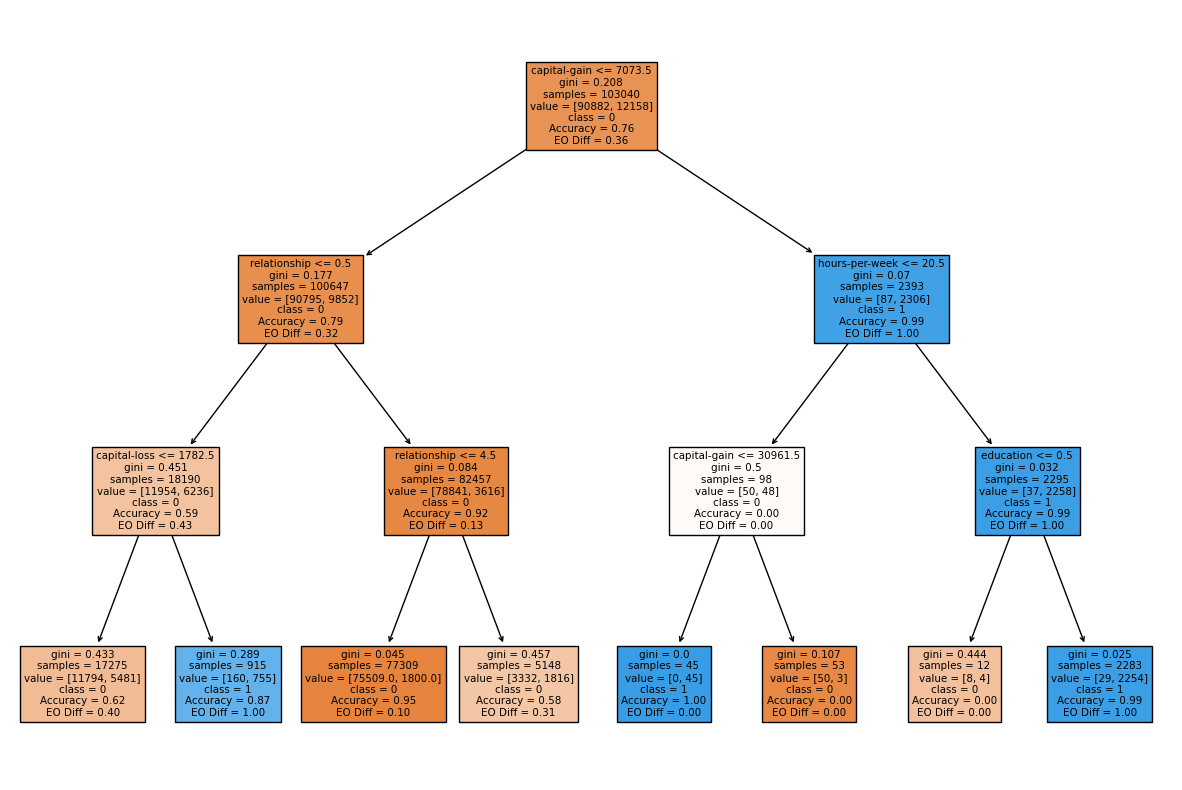

0.9098117236024845
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4945
           1       0.95      0.26      0.40      1568

    accuracy                           0.82      6513
   macro avg       0.88      0.63      0.65      6513
weighted avg       0.84      0.82      0.78      6513



In [268]:
import warnings


clf = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
clf.fit(X_train, y_train)
y_predic = clf.predict(X_test)
print(accuracy_score(y_test, y_predic))

def compute_node_eod(tree, X, y, sensitive_attr):
    accuracies = np.zeros(tree.tree_.node_count)
    eo_diff = np.zeros(tree.tree_.node_count) 
    
    node_indicator = tree.decision_path(X)
    
    for node_id in range(tree.tree_.node_count):
        node_samples = node_indicator[:, node_id].toarray().ravel().astype(bool)
        if not any(node_samples):
            continue  

        node_labels = y[node_samples]
        node_sensitive = sensitive_attr[node_samples]
        
        # Most common label predicted at this node
        most_common = np.argmax(tree.tree_.value[node_id])
        predictions = np.full(len(node_labels), most_common)
        
        accuracies[node_id] = np.mean(predictions == node_labels)
        
        mf = MetricFrame(
            metrics={
                'tpr': true_positive_rate,
                'fpr': false_positive_rate,
                'accuracy_score': accuracy_score
            },
            y_true=node_labels,
            y_pred=predictions,
            sensitive_features=node_sensitive
        )
        
        tpr_diff = mf.difference(method='between_groups')
        fpr_diff = mf.difference(method='between_groups')
        eo_diff[node_id] = max(tpr_diff.max(), fpr_diff.max())  # Maximum difference for EO
        
        #eo_diff[node_id] =  equalized_odds_difference(y_true=y_test, y_pred=y_predic,
                                                      #sensitive_features=sensitive_attr)
    return accuracies, eo_diff



sensitive_attr = X_test[['combined_category_Adult_Other_Female', 'combined_category_Adult_White_Female', 'combined_category_Young_Other_Female',
                             'combined_category_Young_White_Female', 'combined_category_Adult_Other_Male', 'combined_category_Adult_White_Male', 
                             'combined_category_Young_Other_Male', 'combined_category_Young_White_Male']]

node_accuracies, node_eod = compute_node_eod(clf, X_test, y_test, sensitive_attr)

fig, ax = plt.subplots(figsize=(15, 10))
tree_plot = plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["0", "1"], ax=ax)

# Annotating with accuracies and EO difference
for i, text in enumerate(tree_plot):
    if i < len(node_accuracies):  
        metrics_text = f'\nAccuracy = {node_accuracies[i]:.2f}'
        metrics_text += f'\nEO Diff = {node_eod[i]:.2f}'
        text.set_text(text.get_text() + metrics_text)

plt.show()

y_new = clf.predict(X_train)
print(accuracy_score(y_new, y_train))
print(classification_report(y_test, y_predic))

In [269]:

# Define preprocessing for numeric and categorical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression Pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

# Decision Tree Pipeline
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(max_depth=3,random_state=42))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Train the Decision Tree model
dt_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [272]:
# Predictions with Logistic Regression
lr_preds = lr_pipeline.predict(X_test)

# Predictions with Decision Tree
dt_preds = dt_pipeline.predict(X_test)

# Accuracy scores
lr_accuracy = accuracy_score(y_test, lr_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)

print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'Decision Tree Accuracy: {dt_accuracy}')

Logistic Regression Accuracy: 0.803930600337786
Decision Tree Accuracy: 0.8174420389989252


In [273]:
from fairlearn.metrics import MetricFrame, equalized_odds_difference
from sklearn.metrics import recall_score

sensitive_features = X_test[['combined_category_Adult_Other_Female', 'combined_category_Adult_White_Female', 'combined_category_Young_Other_Female',
                             'combined_category_Young_White_Female', 'combined_category_Adult_Other_Male', 'combined_category_Adult_White_Male', 
                             'combined_category_Young_Other_Male', 'combined_category_Young_White_Male']]
sensitive_feature_single = sensitive_features.idxmax(axis=1)

def true_positive_rate(y_true, y_pred):
    return recall_score(y_true, y_pred)


mf_lr = MetricFrame(metrics=true_positive_rate,
                    y_true=y_test,
                    y_pred=lr_preds,
                    sensitive_features=sensitive_feature_single)  

mf_dt = MetricFrame(metrics=true_positive_rate,
                    y_true=y_test,
                    y_pred=y_predic,
                    sensitive_features=sensitive_feature_single)  

# Calculate Equalized Odds Difference using the corrected sensitive_features reference
eod_lr = equalized_odds_difference(y_true=y_test, y_pred=lr_preds, sensitive_features=sensitive_feature_single)
eod_dt = equalized_odds_difference(y_true=y_test, y_pred=y_predic, sensitive_features=sensitive_feature_single)

print(f"Equalized Odds Difference for Logistic Regression: {eod_lr}")
print(f"Equalized Odds Difference for Decision Tree: {eod_dt}")

# Additionally, you might want to look into the breakdown by group
print("\nMetric Frame for Logistic Regression:")
print(mf_lr.by_group)

print("\nMetric Frame for Decision Tree:")
print(mf_dt.by_group)

Equalized Odds Difference for Logistic Regression: 0.6666666666666666
Equalized Odds Difference for Decision Tree: 0.6666666666666666

Metric Frame for Logistic Regression:
sensitive_feature_0
combined_category_Adult_Other_Female    0.300000
combined_category_Adult_Other_Male      0.209677
combined_category_Adult_White_Female    0.253589
combined_category_Adult_White_Male      0.211685
combined_category_Young_Other_Female    0.000000
combined_category_Young_Other_Male      0.666667
combined_category_Young_White_Female    0.200000
combined_category_Young_White_Male      0.333333
Name: true_positive_rate, dtype: float64

Metric Frame for Decision Tree:
sensitive_feature_0
combined_category_Adult_Other_Female    0.300000
combined_category_Adult_Other_Male      0.274194
combined_category_Adult_White_Female    0.229665
combined_category_Adult_White_Male      0.258256
combined_category_Young_Other_Female    0.000000
combined_category_Young_Other_Male      0.666667
combined_category_Young_Whi

In [274]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

sensitive_features = X_test[['combined_category_Adult_Other_Female', 'combined_category_Adult_White_Female', 'combined_category_Young_Other_Female',
                             'combined_category_Young_White_Female', 'combined_category_Adult_Other_Male', 'combined_category_Adult_White_Male', 
                             'combined_category_Young_Other_Male', 'combined_category_Young_White_Male']]
sensitive_feature_single = sensitive_features.idxmax(axis=1)

# Define a metric to evaluate the positive prediction rate
def positive_prediction_rate(y_true, y_pred):
    # Here, we ignore y_true because we're interested in the rate of positive predictions, not their correctness
    return np.mean(y_pred)

# Create a MetricFrame for Statistical Parity calculation
mf_lr_stat_parity = MetricFrame(metrics=positive_prediction_rate,
                                y_true=y_test,  # This is necessary for the MetricFrame but not used in the metric calculation
                                y_pred=lr_preds,
                                sensitive_features=sensitive_feature_single)

mf_dt_stat_parity = MetricFrame(metrics=positive_prediction_rate,
                                y_true=y_test,  # This is also necessary but not used
                                y_pred=dt_preds,
                                sensitive_features=sensitive_feature_single)

# The difference in positive prediction rates between the most and least favored groups can serve as a measure of statistical parity
diff_lr_stat_parity = mf_lr_stat_parity.difference(method='between_groups')
diff_dt_stat_parity = mf_dt_stat_parity.difference(method='between_groups')

print(f"Difference in Positive Prediction Rates for Logistic Regression (Statistical Parity): {diff_lr_stat_parity}")
print(f"Difference in Positive Prediction Rates for Decision Tree (Statistical Parity): {diff_dt_stat_parity}")

# Additionally, to see the breakdown by group
print("\nPositive Prediction Rate by Group for Logistic Regression:")
print(mf_lr_stat_parity.by_group)

print("\nPositive Prediction Rate by Group for Decision Tree:")
print(mf_dt_stat_parity.by_group)

Difference in Positive Prediction Rates for Logistic Regression (Statistical Parity): 0.09036523929471033
Difference in Positive Prediction Rates for Decision Tree (Statistical Parity): 0.09382871536523929

Positive Prediction Rate by Group for Logistic Regression:
sensitive_feature_0
combined_category_Adult_Other_Female    0.034286
combined_category_Adult_Other_Male      0.068132
combined_category_Adult_White_Female    0.050121
combined_category_Adult_White_Male      0.090365
combined_category_Young_Other_Female    0.000000
combined_category_Young_Other_Male      0.021505
combined_category_Young_White_Female    0.002045
combined_category_Young_White_Male      0.009509
Name: positive_prediction_rate, dtype: float64

Positive Prediction Rate by Group for Decision Tree:
sensitive_feature_0
combined_category_Adult_Other_Female    0.031429
combined_category_Adult_Other_Male      0.076923
combined_category_Adult_White_Female    0.052546
combined_category_Adult_White_Male      0.093829
combi

Custom Smote

In [313]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors

In [314]:
def custom_smote(data, n_samples):
    """
    Custom SMOTE-like function to generate synthetic samples within a single category.
    
    :param data: Data subset belonging to a specific category (numpy array).
    :param n_samples: Number of synthetic samples to generate.
    :return: Synthetic samples generated within the given category.
    """
    # Initialize the synthetic samples array
    synthetic_samples = np.zeros((n_samples, data.shape[1]))
    
    # Fit the NearestNeighbors model to the data
    nn = NearestNeighbors(n_neighbors=7).fit(data)
    neighbors = nn.kneighbors(data, return_distance=False)
    
    # Generate synthetic samples
    for i in range(n_samples):
        # Randomly choose a sample to serve as the base for the synthetic sample
        sample_idx = np.random.randint(data.shape[0])
        # Use one of its nearest neighbors
        nn_idx = np.random.choice(neighbors[sample_idx, 1:])
        
        # Calculate the difference between the sample and its neighbor
        diff = data[nn_idx] - data[sample_idx]
        # Generate a random weight to interpolate between the sample and its neighbor
        weight = np.random.rand(1)
        
        # Create the synthetic sample
        synthetic_samples[i] = data[sample_idx] + weight * diff
    
    return synthetic_samples


def generate_balanced_synthetic_labels(n_samples_needed, balance_ratio):
    """
    Generates a balanced list of class labels for synthetic samples.
    
    :param n_samples_needed: Total number of synthetic samples needed.
    :param balance_ratio: Target ratio of class 1 labels to total labels. 
                          Default is 0.5 for equal balance.
    :return: A list of synthetic labels with the specified balance.
    """
    n_class_1 = int(n_samples_needed * balance_ratio)
    n_class_0 = n_samples_needed - n_class_1  # Adjust to ensure total matches n_samples_needed
    
    synthetic_labels = [0] * n_class_0 + [1] * n_class_1
    np.random.shuffle(synthetic_labels)  # Shuffle to mix class labels
    
    return synthetic_labels


In [315]:
def custom_borderline_smote(data, labels, n_samples_needed, k_neighbors=5):
    """
    Generates synthetic samples focusing on borderline samples.

    :param data: Data points (features).
    :param labels: Class labels.
    :param n_samples_needed: Number of synthetic samples needed.
    :param k_neighbors: Number of nearest neighbors.
    :return: Array of synthetic samples.
    """
    nn = NearestNeighbors(n_neighbors=k_neighbors + 1).fit(data)
    _, indices = nn.kneighbors(data)
    synthetic_samples = []
    
    danger_indexes = []

    for i in range(data.shape[0]):
        neighbor_labels = labels[indices[i][1:]]  # Get labels of the neighbors
        if len(set(neighbor_labels)) > 1:  # Check if neighbors' labels are mixed
            danger_indexes.append(i)

    while len(synthetic_samples) < n_samples_needed and danger_indexes:
        i = np.random.choice(danger_indexes)
        nn_index = np.random.choice(indices[i][1:])
        if labels[i] != labels[nn_index]:
            continue
        diff = data[nn_index] - data[i]
        gap = np.random.rand()
        synthetic_samples.append(data[i] + gap * diff)

    return np.array(synthetic_samples[:n_samples_needed])


In [347]:
# Load the data
file_path = 'C:/Users/olasu/Downloads/adult_train.csv'
df = pd.read_csv(file_path)

# Check if the necessary columns exist to avoid 'NoneType' errors
required_columns = ['sex', 'Age_class', 'race_class', 'income_Class']
if not all(column in df.columns for column in required_columns):
    raise ValueError("One or more required columns are missing from the DataFrame")

# Combine categories and create a new column for them
df['combined_category'] = df['sex'] + "_" + df['Age_class'] + "_" + df['race_class']
df['income_Class'] = df['income_Class'].replace({1: 0, 2: 1}) 


combined_one_hot_encoded = pd.get_dummies(df['combined_category'])
combined_one_hot_encoded.columns = combined_one_hot_encoded.columns.str.lower()

# Join the one-hot encoded data back to the original DataFrame and drop unnecessary columns
new_data = df.join(combined_one_hot_encoded)
new_data.drop(["race_class", "Age_class", "sex", "age", 'fnlwgt', 'education-num'], axis=1, inplace=True)

# Encoding other categorical features
categorical_features = new_data.select_dtypes(include=['object', 'bool'])
for col in categorical_features:
    le = LabelEncoder()
    new_data[col] = new_data[col].fillna('missing')
    new_data[col] = le.fit_transform(new_data[col])
X = new_data.drop(['income_Class'], axis=1)
y = new_data['income_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

new_data3= pd.concat([X_train, y_train], axis=1)
categories = new_data3['combined_category'].unique()
max_size = new_data3['combined_category'].value_counts().max()
balanced_df_list = []


for category in categories:
    category_subset = new_data3[new_data3['combined_category'] == category]
    features = category_subset.drop(['income_Class', 'combined_category'], axis=1)
    n_samples_needed = max_size - category_subset.shape[0]
    
    if n_samples_needed > 0:
        synthetic_features = custom_smote(features.to_numpy(), n_samples_needed)
        synthetic_features_df = pd.DataFrame(synthetic_features, columns=features.columns)
        
        # Generate a balanced distribution of synthetic labels
        synthetic_labels = generate_balanced_synthetic_labels(n_samples_needed, balance_ratio=0.34)
        
        synthetic_features_df['income_Class'] = synthetic_labels
        synthetic_features_df['combined_category'] = category
        
        category_subset_balanced = pd.concat([category_subset, synthetic_features_df])
    else:
        category_subset_balanced = category_subset
    
    balanced_df_list.append(category_subset_balanced)

balanced_df1 = pd.concat(balanced_df_list).reset_index(drop=True)


# Prepare features and target variable
X_train = balanced_df1.drop(['income_Class', 'combined_category'], axis=1)  
y_train =balanced_df1['income_Class'] 

X_test = X_test.drop(['combined_category'], axis=1)


9009     0
25134    0
16682    0
27044    0
3302     0
        ..
11814    0
27934    0
6890     0
32529    0
18518    0
Name: female_adult_other, Length: 6513, dtype: int64


In [324]:

max_depth_range = range(1, 31)
accuracies = {depth: [] for depth in max_depth_range}
eods = {depth: [] for depth in max_depth_range}


X = new_data.drop(['income_Class'], axis=1)
y = new_data['income_Class']

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    new_data3= pd.concat([X_train, y_train], axis=1)
    categories = new_data3['combined_category'].unique()
    max_size = new_data3['combined_category'].value_counts().max()
    balanced_df_list = []


    for category in categories:
        category_subset = new_data3[new_data3['combined_category'] == category]
        features = category_subset.drop(['income_Class', 'combined_category'], axis=1)
        n_samples_needed = max_size - category_subset.shape[0]

        if n_samples_needed > 0:

            synthetic_features = custom_smote(features.to_numpy(),  n_samples_needed)
            synthetic_features_df = pd.DataFrame(synthetic_features, columns=features.columns)
            synthetic_labels = generate_balanced_synthetic_labels(n_samples_needed, balance_ratio=0.34)
            synthetic_features_df['income_Class'] = synthetic_labels
            synthetic_features_df['combined_category'] = category
            category_subset_balanced = pd.concat([category_subset, synthetic_features_df])
        else:
            category_subset_balanced = category_subset
        balanced_df_list.append(category_subset_balanced)
    balanced_df1 = pd.concat(balanced_df_list).reset_index(drop=True)
    X_train = balanced_df1.drop(['income_Class', 'combined_category'], axis=1)  
    y_train =balanced_df1['income_Class'] 

    X_test = X_test.drop(['combined_category'], axis=1)


    for depth in max_depth_range:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Calculate and store accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies[depth].append(acc)

        # Calculate and store EOD
        sensitive_features_test = X_test[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]
        mf = MetricFrame(metrics={'tpr': true_positive_rate, 'fpr': false_positive_rate},
                         y_true=y_test,
                         y_pred=y_pred,
                         sensitive_features=sensitive_features_test)
        eod = max(mf.difference(method='between_groups')['tpr'], mf.difference(method='between_groups')['fpr'])
        eods[depth].append(eod)

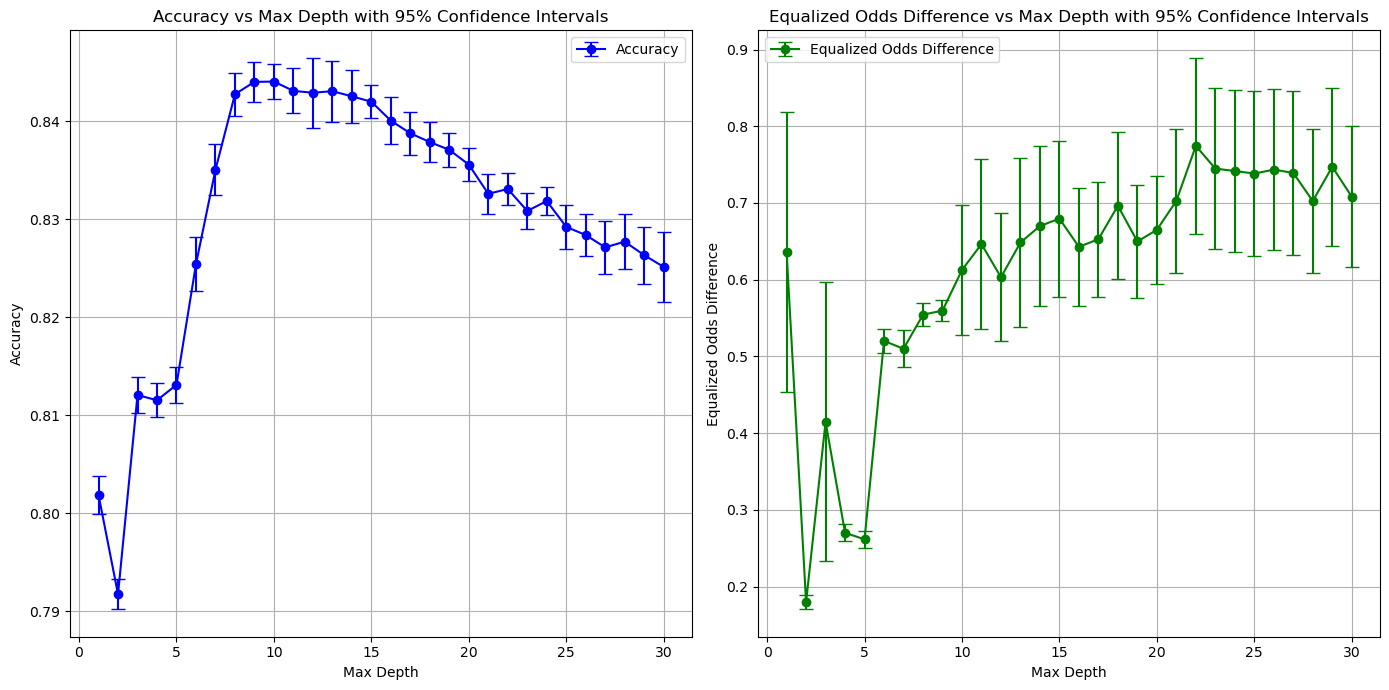

In [325]:
# Calculate mean and confidence intervals for accuracies and eod
mean_accuracies = [np.mean(accuracies[depth]) for depth in max_depth_range]
sem_accuracies = [np.std(accuracies[depth]) / np.sqrt(len(accuracies[depth])) * 1.96 for depth in max_depth_range] 

mean_eods = [np.mean(eods[depth]) for depth in max_depth_range]
sem_eods = [np.std(eods[depth]) / np.sqrt(len(eods[depth])) * 1.96 for depth in max_depth_range]


plt.figure(figsize=(14, 7))

# Plot for Accuracy
plt.subplot(1, 2, 1)
plt.errorbar(max_depth_range, mean_accuracies, yerr=sem_accuracies, label='Accuracy', fmt='-o', capsize=5, color='blue')
plt.title('Accuracy vs Max Depth with 95% Confidence Intervals')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot for Equalized Odds Difference
plt.subplot(1, 2, 2)
plt.errorbar(max_depth_range, mean_eods, yerr=sem_eods, label='Equalized Odds Difference', fmt='-o', capsize=5, color='green')
plt.title('Equalized Odds Difference vs Max Depth with 95% Confidence Intervals')
plt.xlabel('Max Depth')
plt.ylabel('Equalized Odds Difference')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


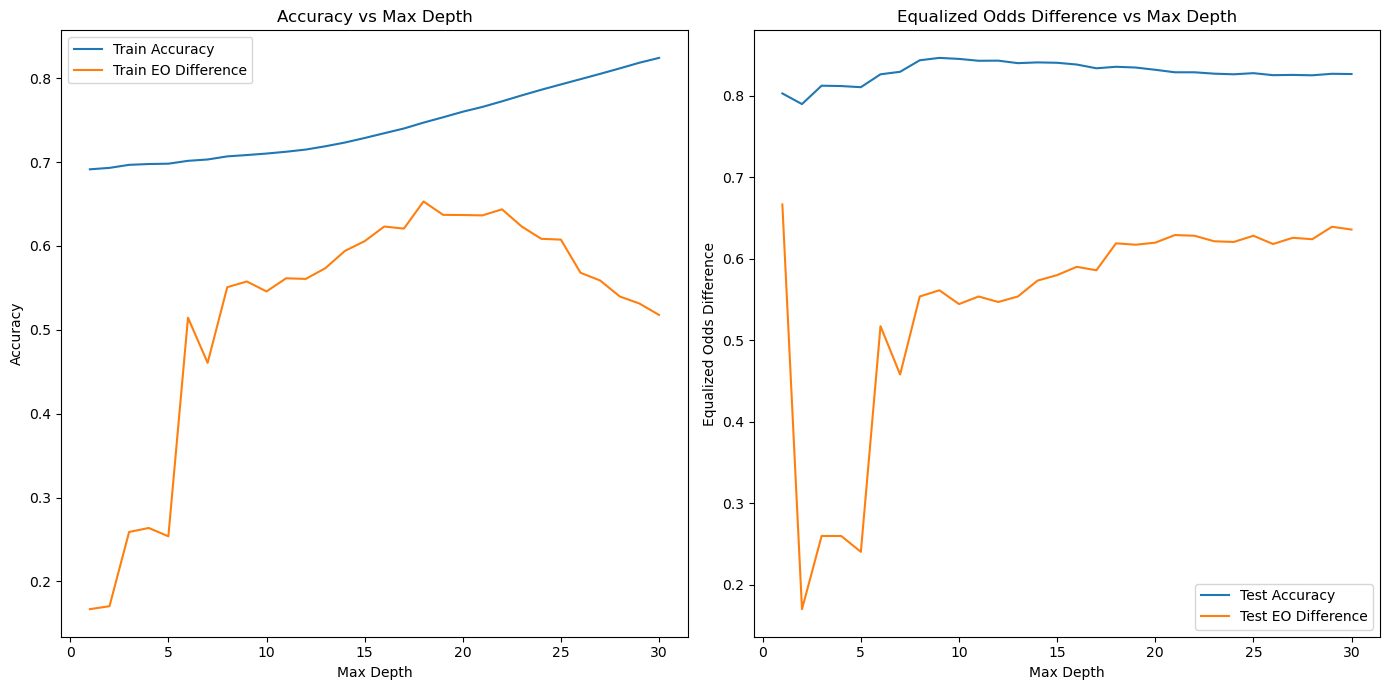

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, equalized_odds_difference

def compute_eod_and_accuracy(clf, X, y, sensitive_attr):
    predictions = clf.predict(X)
    accuracy = accuracy_score(y, predictions)

    # Calculate Equalized Odds Difference using Fairlearn's MetricFrame
    mf = MetricFrame(metrics={
                        'tpr': true_positive_rate, 
                        'fpr': false_positive_rate
                     },
                     y_true=y, 
                     y_pred=predictions, 
                     sensitive_features=sensitive_attr.idxmax(axis=1))
    
    eo_diff = max(mf.difference(method='between_groups')['tpr'], 
                  mf.difference(method='between_groups')['fpr'])
    
    return accuracy, eo_diff

max_depths = range(1, 31)
train_accuracies = []
test_accuracies = []
train_eods = []
test_eods = []

# Ensure sensitive_attr is correctly formatted before looping
sensitive_attr_train = X_train[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]

sensitive_attr_test = X_test[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]


for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Compute metrics for training data
    train_accuracy, train_eod = compute_eod_and_accuracy(clf, X_train, y_train, sensitive_attr_train)
    train_accuracies.append(train_accuracy)
    train_eods.append(train_eod)

    # Compute metrics for testing data
    test_accuracy, test_eod = compute_eod_and_accuracy(clf, X_test, y_test, sensitive_attr_test)
    test_accuracies.append(test_accuracy)
    test_eods.append(test_eod)

    
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_accuracies, label='Train Accuracy')
plt.plot(max_depths, train_eods, label='Train EO Difference')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.plot(max_depths, test_eods, label='Test EO Difference')
plt.title('Equalized Odds Difference vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Equalized Odds Difference')
plt.legend()

plt.tight_layout()
plt.show()



In [234]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_predic = clf.predict(X_test)
print(accuracy_score(y_test, y_predic))

from sklearn.metrics import recall_score, roc_auc_score

from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate

def compute_node_eod(tree, X, y, sensitive_attr):
    accuracies = np.zeros(tree.tree_.node_count)
    eo_diff = np.zeros(tree.tree_.node_count) 
    
    node_indicator = tree.decision_path(X)
    
    for node_id in range(tree.tree_.node_count):
        node_samples = node_indicator[:, node_id].toarray().ravel().astype(bool)
        if not any(node_samples):
            continue  

        node_labels = y[node_samples]
        node_sensitive = sensitive_attr[node_samples]
        
        # Most common label predicted at this node
        most_common = np.argmax(tree.tree_.value[node_id])
        predictions = np.full(len(node_labels), most_common)
        
        accuracies[node_id] = np.mean(predictions == node_labels)
        
        mf = MetricFrame(
            metrics={
                'tpr': true_positive_rate,
                'fpr': false_positive_rate,
                'accuracy': accuracy_score
            },
            y_true=node_labels,
            y_pred=predictions,
            sensitive_features=node_sensitive
        )
        
        tpr_diff = mf.difference(method='between_groups')
        fpr_diff = mf.difference(method='between_groups')
        eo_diff[node_id] = max(tpr_diff.max(), fpr_diff.max())  # Maximum difference for EO
        
        #eo_diff[node_id] =  equalized_odds_difference(y_true=y_test, y_pred=y_predic,
                                                     # sensitive_features=sensitive_attr)
    return accuracies, eo_diff




# Assuming sensitive_attr is part of your DataFrame
sensitive_attr = X_test[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]
#sensitive_attr = sensitive_attr.idxmax(axis=1)
node_accuracies, node_eod = compute_node_eod(clf, X_test, y_test, sensitive_attr)

fig, ax = plt.subplots(figsize=(15, 10))
tree_plot = plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["0", "1"], ax=ax)

# Annotating with accuracies and EO difference
for i, text in enumerate(tree_plot):
    if i < len(node_accuracies):  
        metrics_text = f'\nAccuracy = {node_accuracies[i]:.2f}'
        metrics_text += f'\nEO Diff = {node_eod[i]:.2f}'
        text.set_text(text.get_text() + metrics_text)

plt.show()

y_new = clf.predict(X_train)
print(accuracy_score(y_new, y_train))
print(classification_report(y_test, y_predic))

0.812375249500998


0.696671195652174
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4945
           1       0.95      0.23      0.38      1568

    accuracy                           0.81      6513
   macro avg       0.87      0.61      0.63      6513
weighted avg       0.84      0.81      0.77      6513



In [235]:
from fairlearn.metrics import MetricFrame, equalized_odds_difference
from sklearn.metrics import recall_score
import warnings

sensitive_features = X_test[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]
sensitive_feature_single = sensitive_features.idxmax(axis=1)

def true_postive_rate(y_test, y_pred):
    return recall_score(y_test, y_pred)

mf_lr = MetricFrame(metrics=true_positive_rate,
                    y_true=y_test,
                    y_pred=lr_preds,
                    sensitive_features=sensitive_feature_single)  

mf_dt = MetricFrame(metrics=true_positive_rate,
                    y_true=y_test,
                    y_pred=y_predic,
                    sensitive_features=sensitive_feature_single)  

# Calculate Equalized Odds Difference using the corrected sensitive_features reference
eod_lr = equalized_odds_difference(y_true=y_test, y_pred=lr_preds, sensitive_features=sensitive_feature_single)
eod_dt = equalized_odds_difference(y_true=y_test, y_pred=y_predic, sensitive_features=sensitive_feature_single)

print(f"Equalized Odds Difference for Logistic Regression: {eod_lr}")
print(f"Equalized Odds Difference for Decision Tree: {eod_dt}")

# Additionally, you might want to look into the breakdown by group
print("\nMetric Frame for Logistic Regression:")
print(mf_lr.by_group)

print("\nMetric Frame for Decision Tree:")
print(mf_dt.by_group)

Equalized Odds Difference for Logistic Regression: 0.6666666666666666
Equalized Odds Difference for Decision Tree: 0.25994919559695173

Metric Frame for Logistic Regression:
sensitive_feature_0
female_adult_other    0.300000
female_adult_white    0.253589
female_young_other    0.000000
female_young_white    0.200000
male_adult_other      0.209677
male_adult_white      0.211685
male_young_other      0.666667
male_young_white      0.333333
Name: true_positive_rate, dtype: float64

Metric Frame for Decision Tree:
sensitive_feature_0
female_adult_other    0.000000
female_adult_white    0.229665
female_young_other    0.000000
female_young_white    0.000000
male_adult_other      0.096774
male_adult_white      0.259949
male_young_other      0.000000
male_young_white      0.000000
Name: true_positive_rate, dtype: float64


In [230]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

sensitive_features = X_test[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]

sensitive_feature_single = sensitive_features.idxmax(axis=1)

# Define a metric to evaluate the positive prediction rate
def positive_prediction_rate(y_true, y_pred):
    # Here, we ignore y_true because we're interested in the rate of positive predictions, not their correctness
    return np.mean(y_pred)

# Create a MetricFrame for Statistical Parity calculation
mf_lr_stat_parity = MetricFrame(metrics=positive_prediction_rate,
                                y_true=y_test,  # This is necessary for the MetricFrame but not used in the metric calculation
                                y_pred=lr_preds,
                                sensitive_features=sensitive_feature_single)

mf_dt_stat_parity = MetricFrame(metrics=positive_prediction_rate,
                                y_true=y_test,  # This is also necessary but not used
                                y_pred=y_predic,
                                sensitive_features=sensitive_feature_single)

# The difference in positive prediction rates between the most and least favored groups can serve as a measure of statistical parity
diff_lr_stat_parity = mf_lr_stat_parity.difference(method='between_groups')
diff_dt_stat_parity = mf_dt_stat_parity.difference(method='between_groups')

print(f"Difference in Positive Prediction Rates for Logistic Regression (Statistical Parity): {diff_lr_stat_parity}")
print(f"Difference in Positive Prediction Rates for Decision Tree (Statistical Parity): {diff_dt_stat_parity}")

# Additionally, to see the breakdown by group
print("\nPositive Prediction Rate by Group for Logistic Regression:")
print(mf_lr_stat_parity.by_group)

print("\nPositive Prediction Rate by Group for Decision Tree:")
print(mf_dt_stat_parity.by_group)

Difference in Positive Prediction Rates for Logistic Regression (Statistical Parity): 0.09036523929471033
Difference in Positive Prediction Rates for Decision Tree (Statistical Parity): 0.07336272040302266

Positive Prediction Rate by Group for Logistic Regression:
sensitive_feature_0
female_adult_other    0.034286
female_adult_white    0.050121
female_young_other    0.000000
female_young_white    0.002045
male_adult_other      0.068132
male_adult_white      0.090365
male_young_other      0.021505
male_young_white      0.009509
Name: positive_prediction_rate, dtype: float64

Positive Prediction Rate by Group for Decision Tree:
sensitive_feature_0
female_adult_other    0.000000
female_adult_white    0.042846
female_young_other    0.000000
female_young_white    0.000000
male_adult_other      0.000000
male_adult_white      0.073363
male_young_other      0.000000
male_young_white      0.000000
Name: positive_prediction_rate, dtype: float64


CUSTOM ADASYN

In [326]:
def custom_adasyn_categories(data, n_samples_needed, n_neighbors=5):
    """
    Custom ADASYN-like function adapted for balancing based on categories.
    Generates exactly n_samples_needed synthetic samples.
    """
    nn = NearestNeighbors(n_neighbors=n_neighbors + 1).fit(data)
    distances, indices = nn.kneighbors(data)
    
    synthetic_samples = []
    while len(synthetic_samples) < n_samples_needed:
        for i in range(len(data)):
            # Find the indices of the neighbors (excluding the first one, which is the point itself)
            for nn_index in indices[i][1:]:
                diff = data[nn_index] - data[i]
                synthetic_sample = data[i] + np.random.rand() * diff
                synthetic_samples.append(synthetic_sample)
                if len(synthetic_samples) >= n_samples_needed:
                    break
            if len(synthetic_samples) >= n_samples_needed:
                break
    
    return np.array(synthetic_samples[:n_samples_needed])


def generate_balanced_synthetic_label(n_samples_needed, balance_ratio):
    """
    Generate a balanced array of labels based on the specified balance ratio.
    """
    n_pos = int(n_samples_needed * balance_ratio)
    n_neg = n_samples_needed - n_pos
    labels = np.array([1] * n_pos + [0] * n_neg)
    np.random.shuffle(labels)
    return labels


from sklearn.cluster import KMeans



In [327]:
# Load the data
file_path = 'C:/Users/olasu/Downloads/adult_train.csv'
df = pd.read_csv(file_path)

# Check if the necessary columns exist to avoid 'NoneType' errors
required_columns = ['sex', 'Age_class', 'race_class', 'income_Class']
if not all(column in df.columns for column in required_columns):
    raise ValueError("One or more required columns are missing from the DataFrame")

# Combine categories and create a new column for them
df['combined_category'] = df['sex'] + "_" + df['Age_class'] + "_" + df['race_class']
df['income_Class'] = df['income_Class'].replace({1: 0, 2: 1}) 


combined_one_hot_encoded = pd.get_dummies(df['combined_category'])
combined_one_hot_encoded.columns = combined_one_hot_encoded.columns.str.lower()

# Join the one-hot encoded data back to the original DataFrame and drop unnecessary columns
new_data = df.join(combined_one_hot_encoded)
new_data.drop(["race_class", "Age_class", "sex", "age", 'fnlwgt', 'education-num'], axis=1, inplace=True)

# Encoding other categorical features
categorical_features = new_data.select_dtypes(include=['object', 'bool'])
for col in categorical_features:
    le = LabelEncoder()
    new_data[col] = new_data[col].fillna('missing')
    new_data[col] = le.fit_transform(new_data[col])
X = new_data.drop(['income_Class'], axis=1)
y = new_data['income_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

new_data3= pd.concat([X_train, y_train], axis=1)
categories = new_data3['combined_category'].unique()
max_size = new_data3['combined_category'].value_counts().max()
balanced_df_list = []


for category in categories:
    category_subset = new_data3[new_data3['combined_category'] == category]
    features = category_subset.drop(['income_Class', 'combined_category'], axis=1)
    n_samples_needed = max_size - category_subset.shape[0]
    
    if n_samples_needed > 0:
        synthetic_features = custom_adasyn_categories(features.to_numpy(),  n_samples_needed)
        synthetic_features_df = pd.DataFrame(synthetic_features, columns=features.columns)
        
        # Generate a balanced distribution of synthetic labels
        synthetic_labels = generate_balanced_synthetic_labels(n_samples_needed, balance_ratio=0.34)
        
        synthetic_features_df['income_Class'] = synthetic_labels
        synthetic_features_df['combined_category'] = category
        
        category_subset_balanced = pd.concat([category_subset, synthetic_features_df])
    else:
        category_subset_balanced = category_subset
    
    balanced_df_list.append(category_subset_balanced)

balanced_df1 = pd.concat(balanced_df_list).reset_index(drop=True)


# Prepare features and target variable
X_train_balanced = balanced_df1.drop(['income_Class', 'combined_category'], axis=1)  
y_train_balanced =balanced_df1['income_Class'] 

X_test_adasyn = X_test.drop(['combined_category'], axis=1)


In [328]:
max_depth_range = range(1, 31)
accuracies = {depth: [] for depth in max_depth_range}
eods = {depth: [] for depth in max_depth_range}

# Example dataset preparation
X = new_data.drop(['income_Class'], axis=1)
y = new_data['income_Class']

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    new_data3= pd.concat([X_train, y_train], axis=1)
    categories = new_data3['combined_category'].unique()
    max_size = new_data3['combined_category'].value_counts().max()
    balanced_df_list = []


    for category in categories:
        category_subset = new_data3[new_data3['combined_category'] == category]
        features = category_subset.drop(['income_Class', 'combined_category'], axis=1)
        n_samples_needed = max_size - category_subset.shape[0]

        if n_samples_needed > 0:

            synthetic_features = custom_adasyn_categories(features.to_numpy(),  n_samples_needed)
            synthetic_features_df = pd.DataFrame(synthetic_features, columns=features.columns)
            synthetic_labels = generate_balanced_synthetic_labels(n_samples_needed, balance_ratio=0.34)
            synthetic_features_df['income_Class'] = synthetic_labels
            synthetic_features_df['combined_category'] = category
            category_subset_balanced = pd.concat([category_subset, synthetic_features_df])
        else:
            category_subset_balanced = category_subset
        balanced_df_list.append(category_subset_balanced)
    balanced_df1 = pd.concat(balanced_df_list).reset_index(drop=True)
    X_train = balanced_df1.drop(['income_Class', 'combined_category'], axis=1)  
    y_train =balanced_df1['income_Class'] 

    X_test = X_test.drop(['combined_category'], axis=1)

    for depth in max_depth_range:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Calculate and store accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies[depth].append(acc)

        # Calculate and store EOD
        sensitive_features_test = X_test[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]
        mf = MetricFrame(metrics={'tpr': true_positive_rate, 'fpr': false_positive_rate},
                         y_true=y_test,
                         y_pred=y_pred,
                         sensitive_features=sensitive_features_test)
        eod = max(mf.difference(method='between_groups')['tpr'], mf.difference(method='between_groups')['fpr'])
        eods[depth].append(eod)

    

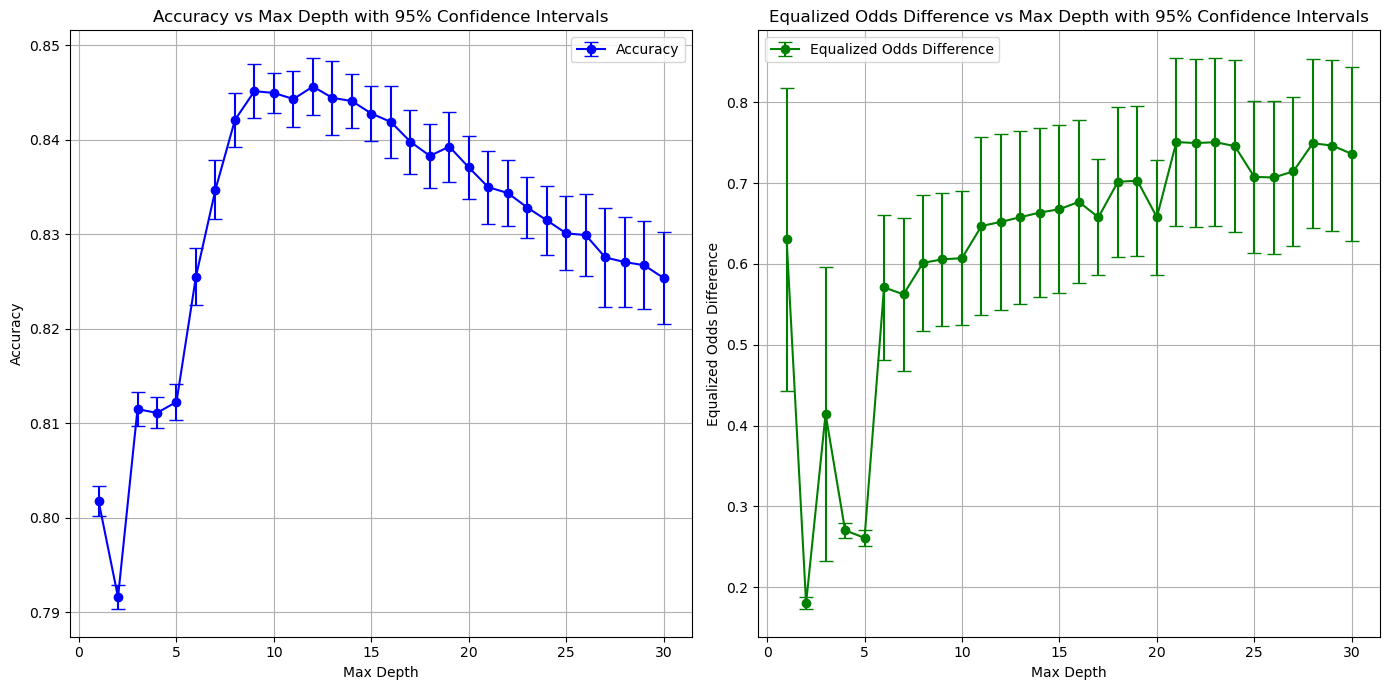

In [329]:
# Calculate mean and confidence intervals for accuracies and eod
mean_accuracies = [np.mean(accuracies[depth]) for depth in max_depth_range]
sem_accuracies = [np.std(accuracies[depth]) / np.sqrt(len(accuracies[depth])) * 1.96 for depth in max_depth_range] 

mean_eods = [np.mean(eods[depth]) for depth in max_depth_range]
sem_eods = [np.std(eods[depth]) / np.sqrt(len(eods[depth])) * 1.96 for depth in max_depth_range]


plt.figure(figsize=(14, 7))

# Plot for Accuracy
plt.subplot(1, 2, 1)
plt.errorbar(max_depth_range, mean_accuracies, yerr=sem_accuracies, label='Accuracy', fmt='-o', capsize=5, color='blue')
plt.title('Accuracy vs Max Depth with 95% Confidence Intervals')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot for Equalized Odds Difference
plt.subplot(1, 2, 2)
plt.errorbar(max_depth_range, mean_eods, yerr=sem_eods, label='Equalized Odds Difference', fmt='-o', capsize=5, color='green')
plt.title('Equalized Odds Difference vs Max Depth with 95% Confidence Intervals')
plt.xlabel('Max Depth')
plt.ylabel('Equalized Odds Difference')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

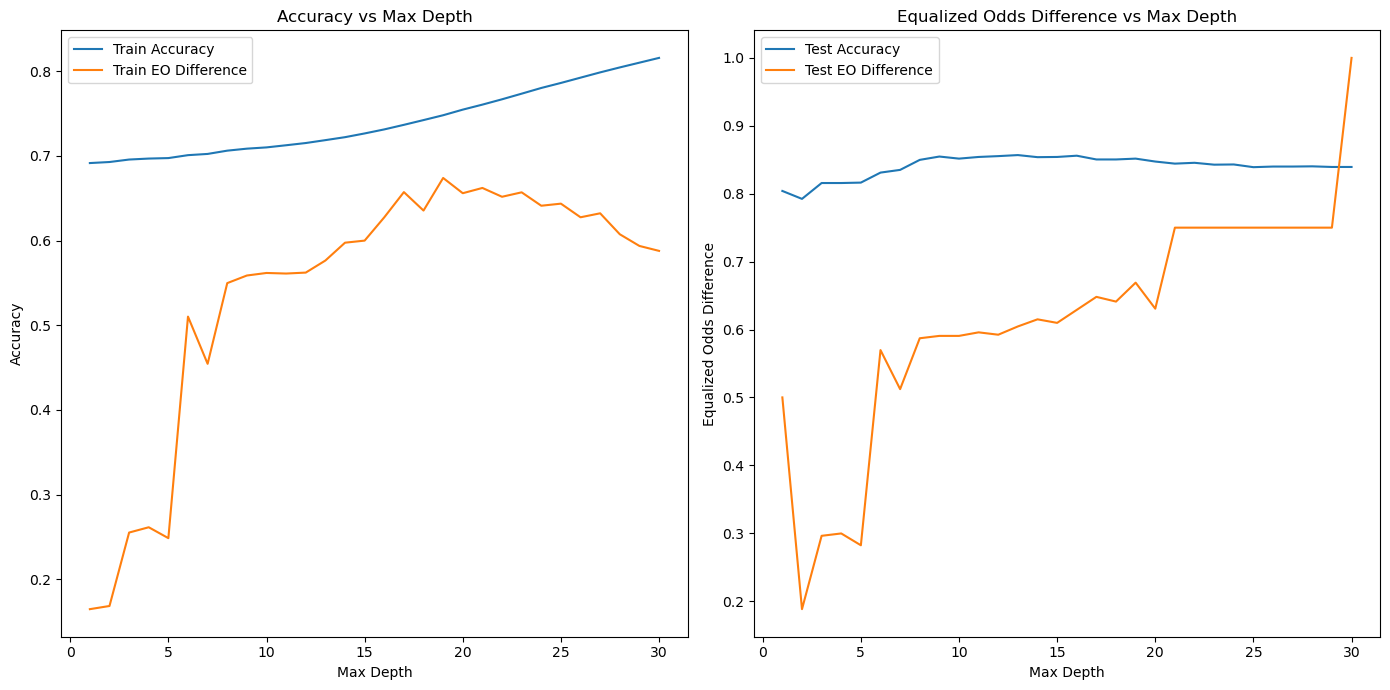

In [330]:

def compute_eod_and_accuracy(clf, X, y, sensitive_attr):
    predictions = clf.predict(X)
    accuracy = accuracy_score(y, predictions)

    # Calculate Equalized Odds Difference using Fairlearn's MetricFrame
    mf = MetricFrame(metrics={
                        'tpr': true_positive_rate, 
                        'fpr': false_positive_rate
                     },
                     y_true=y, 
                     y_pred=predictions, 
                     sensitive_features=sensitive_attr.idxmax(axis=1))
    
    eo_diff = max(mf.difference(method='between_groups')['tpr'], 
                  mf.difference(method='between_groups')['fpr'])
    
    return accuracy, eo_diff

max_depths = range(1, 31)
train_accuracies = []
test_accuracies = []
train_eods = []
test_eods = []

# Ensure sensitive_attr is correctly formatted before looping
sensitive_attr_train = X_train[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]

sensitive_attr_test = X_test[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]


for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Compute metrics for training data
    train_accuracy, train_eod = compute_eod_and_accuracy(clf, X_train, y_train, sensitive_attr_train)
    train_accuracies.append(train_accuracy)
    train_eods.append(train_eod)

    # Compute metrics for testing data
    test_accuracy, test_eod = compute_eod_and_accuracy(clf, X_test, y_test, sensitive_attr_test)
    test_accuracies.append(test_accuracy)
    test_eods.append(test_eod)

    
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_accuracies, label='Train Accuracy')
plt.plot(max_depths, train_eods, label='Train EO Difference')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.plot(max_depths, test_eods, label='Test EO Difference')
plt.title('Equalized Odds Difference vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Equalized Odds Difference')
plt.legend()

plt.tight_layout()
plt.show()



0.8143712574850299


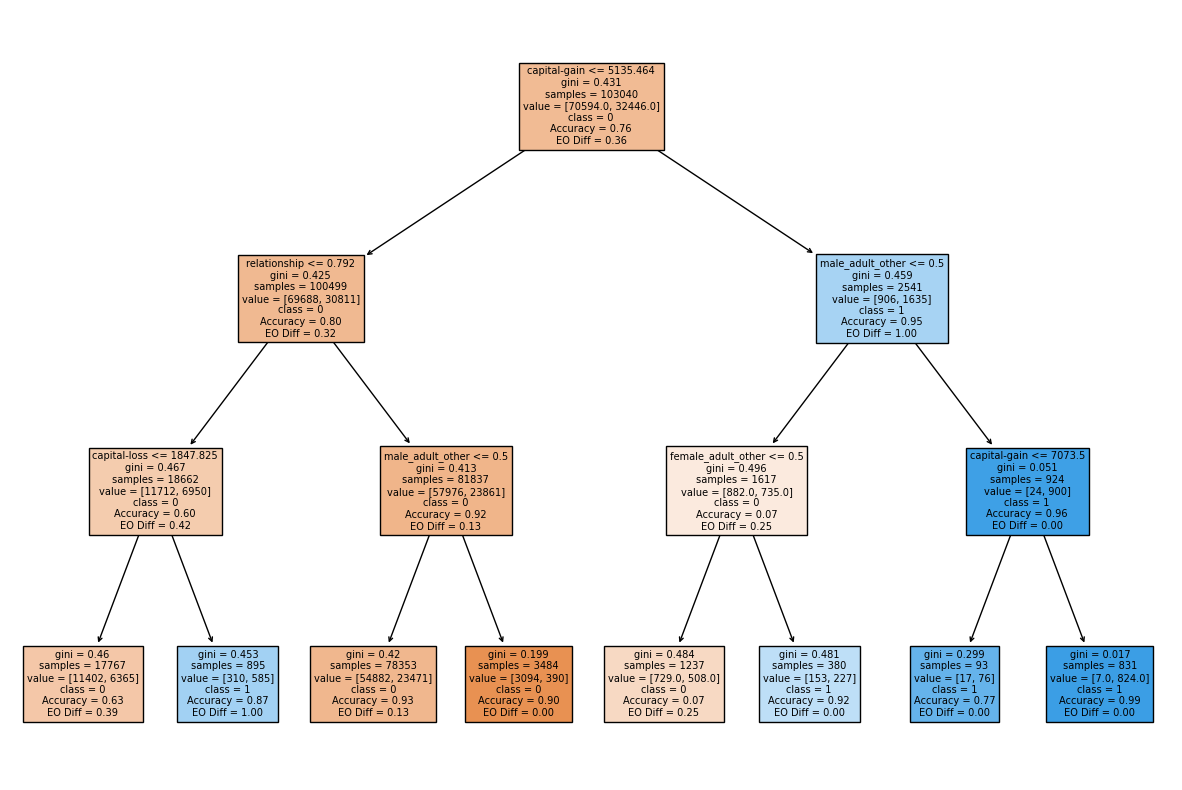

0.6970011645962733
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4945
           1       0.93      0.25      0.39      1568

    accuracy                           0.81      6513
   macro avg       0.87      0.62      0.64      6513
weighted avg       0.84      0.81      0.77      6513



In [291]:
import matplotlib.pyplot as plt
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib
import sklearn.tree

clf = DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_split=20, min_samples_leaf=10, random_state=42)
clf.fit(X_train_balanced, y_train_balanced)
"""
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, parameter_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
clf = grid_search.best_estimator_
"""
y_predi = clf.predict(X_test_adasyn)
print(accuracy_score(y_test, y_predi))

from sklearn.metrics import recall_score, roc_auc_score

from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate

def compute_node_eod(tree, X, y, sensitive_attr):
    accuracies = np.zeros(tree.tree_.node_count)
    eo_diff = np.zeros(tree.tree_.node_count) 
    
    node_indicator = tree.decision_path(X)
    
    for node_id in range(tree.tree_.node_count):
        node_samples = node_indicator[:, node_id].toarray().ravel().astype(bool)
        if not any(node_samples):
            continue  

        node_labels = y[node_samples]
        node_sensitive = sensitive_attr[node_samples]
        
        # Most common label predicted at this node
        most_common = np.argmax(tree.tree_.value[node_id])
        predictions = np.full(len(node_labels), most_common)
        
        accuracies[node_id] = np.mean(predictions == node_labels)
        
        mf = MetricFrame(
            metrics={
                'tpr': true_positive_rate,
                'fpr': false_positive_rate,
                'accuracy': accuracy_score
            },
            y_true=node_labels,
            y_pred=predictions,
            sensitive_features=node_sensitive
        )
        
        tpr_diff = mf.difference(method='between_groups')
        fpr_diff = mf.difference(method='between_groups')
        eo_diff[node_id] = max(tpr_diff.max(), fpr_diff.max())  # Maximum difference for EO
        
        #eo_diff[node_id] =  equalized_odds_difference(y_true=y_test, y_pred=y_predic,
                                                      #sensitive_features=sensitive_attr)
    return accuracies, eo_diff




# Assuming sensitive_attr is part of your DataFrame
sensitive_attr = X_test[['female_adult_other', 'female_adult_white', 'female_young_other',
                             'female_young_white', 'male_adult_other', 'male_adult_white', 'male_young_other',
                             'male_young_white']]

#sensitive_attr = sensitive_attr.idxmax(axis=1)
node_accuracies, node_eod = compute_node_eod(clf, X_test_adasyn, y_test, sensitive_attr)

fig, ax = plt.subplots(figsize=(15, 10))
tree_plot = plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["0", "1"], ax=ax)

# Annotating with accuracies and EO difference
for i, text in enumerate(tree_plot):
    if i < len(node_accuracies):  
        metrics_text = f'\nAccuracy = {node_accuracies[i]:.2f}'
        metrics_text += f'\nEO Diff = {node_eod[i]:.2f}'
        text.set_text(text.get_text() + metrics_text)

plt.show()

y_new = clf.predict(X_train_balanced)
print(accuracy_score(y_new, y_train_balanced))
print(classification_report(y_test, y_predi))

In [795]:
numeric_features = X_test.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_test.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [292]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression Pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

# Decision Tree Pipeline
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(max_depth=2, min_samples_leaf=4,min_samples_split=2, random_state=42))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Train the Decision Tree model
dt_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=4,
                                        random_state=42))])

In [293]:
from sklearn.metrics import classification_report, accuracy_score
# Predictions with Logistic Regression
lr_preds = lr_pipeline.predict(X_test)

# Predictions with Decision Tree
dt_preds = dt_pipeline.predict(X_test)

# Accuracy scores
lr_accuracy = accuracy_score(y_test, lr_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)

print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'Decision Tree Accuracy: {dt_accuracy}')

Logistic Regression Accuracy: 0.8034699831107017
Decision Tree Accuracy: 0.8179026562260096


In [294]:
from fairlearn.metrics import MetricFrame, equalized_odds_difference
from sklearn.metrics import recall_score
import warnings

sensitive_features = X_test[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]
sensitive_feature_single = sensitive_features.idxmax(axis=1)

def true_postive_rate(y_test, y_pred):
    return recall_score(y_test, y_pred)

mf_lr = MetricFrame(metrics=true_positive_rate,
                    y_true=y_test,
                    y_pred=lr_preds,
                    sensitive_features=sensitive_feature_single)  

mf_dt = MetricFrame(metrics=true_positive_rate,
                    y_true=y_test,
                    y_pred=y_predi,
                    sensitive_features=sensitive_feature_single)  

# Calculate Equalized Odds Difference using the corrected sensitive_features reference
eod_lr = equalized_odds_difference(y_true=y_test, y_pred=lr_preds, sensitive_features=sensitive_feature_single)
eod_dt = equalized_odds_difference(y_true=y_test, y_pred=y_predi, sensitive_features=sensitive_feature_single)

print(f"Equalized Odds Difference for Logistic Regression: {eod_lr}")
print(f"Equalized Odds Difference for Decision Tree: {eod_dt}")

# Additionally, you might want to look into the breakdown by group
print("\nMetric Frame for Logistic Regression:")
print(mf_lr.by_group)

print("\nMetric Frame for Decision Tree:")
print(mf_dt.by_group)

Equalized Odds Difference for Logistic Regression: 0.6666666666666666
Equalized Odds Difference for Decision Tree: 0.2785774767146486

Metric Frame for Logistic Regression:
sensitive_feature_0
female_adult_other    0.300000
female_adult_white    0.296651
female_young_other    0.000000
female_young_white    0.200000
male_adult_other      0.258065
male_adult_white      0.272650
male_young_other      0.666667
male_young_white      0.400000
Name: true_positive_rate, dtype: float64

Metric Frame for Decision Tree:
sensitive_feature_0
female_adult_other    0.000000
female_adult_white    0.234450
female_young_other    0.000000
female_young_white    0.000000
male_adult_other      0.096774
male_adult_white      0.278577
male_young_other      0.000000
male_young_white      0.000000
Name: true_positive_rate, dtype: float64


In [295]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

sensitive_features = X_test[['female_adult_other', 'female_adult_white', 'female_young_white',
                             'female_young_other', 'male_adult_other', 'male_adult_white', 
                             'male_young_other', 'male_young_white']]

sensitive_feature_single = sensitive_features.idxmax(axis=1)

# Define a metric to evaluate the positive prediction rate
def positive_prediction_rate(y_true, y_pred):
    # Here, we ignore y_true because we're interested in the rate of positive predictions, not their correctness
    return np.mean(y_pred)

# Create a MetricFrame for Statistical Parity calculation
mf_lr_stat_parity = MetricFrame(metrics=positive_prediction_rate,
                                y_true=y_test,  # This is necessary for the MetricFrame but not used in the metric calculation
                                y_pred=lr_preds,
                                sensitive_features=sensitive_feature_single)

mf_dt_stat_parity = MetricFrame(metrics=positive_prediction_rate,
                                y_true=y_test,  # This is also necessary but not used
                                y_pred=dt_preds,
                                sensitive_features=sensitive_feature_single)

# The difference in positive prediction rates between the most and least favored groups can serve as a measure of statistical parity
diff_lr_stat_parity = mf_lr_stat_parity.difference(method='between_groups')
diff_dt_stat_parity = mf_dt_stat_parity.difference(method='between_groups')

print(f"Difference in Positive Prediction Rates for Logistic Regression (Statistical Parity): {diff_lr_stat_parity}")
print(f"Difference in Positive Prediction Rates for Decision Tree (Statistical Parity): {diff_dt_stat_parity}")

# Additionally, to see the breakdown by group
print("\nPositive Prediction Rate by Group for Logistic Regression:")
print(mf_lr_stat_parity.by_group)

print("\nPositive Prediction Rate by Group for Decision Tree:")
print(mf_dt_stat_parity.by_group)

Difference in Positive Prediction Rates for Logistic Regression (Statistical Parity): 0.13066750629722923
Difference in Positive Prediction Rates for Decision Tree (Statistical Parity): 0.11775818639798488

Positive Prediction Rate by Group for Logistic Regression:
sensitive_feature_0
female_adult_other    0.051429
female_adult_white    0.067098
female_young_other    0.000000
female_young_white    0.008180
male_adult_other      0.098901
male_adult_white      0.130668
male_young_other      0.053763
male_young_white      0.015848
Name: positive_prediction_rate, dtype: float64

Positive Prediction Rate by Group for Decision Tree:
sensitive_feature_0
female_adult_other    0.054286
female_adult_white    0.064673
female_young_other    0.000000
female_young_white    0.010225
male_adult_other      0.090110
male_adult_white      0.117758
male_young_other      0.032258
male_young_white      0.015848
Name: positive_prediction_rate, dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score

In [99]:
## Dataset 2 German credit

In [209]:
import pandas as pd
from sklearn.utils import resample

# Load the data
file_path = r"C:\Users\olasu\Downloads\germandata.csv"
data = pd.read_csv(file_path)


class_distribution = data['credit'].value_counts()
print(class_distribution)


credit
1    700
2    300
Name: count, dtype: int64


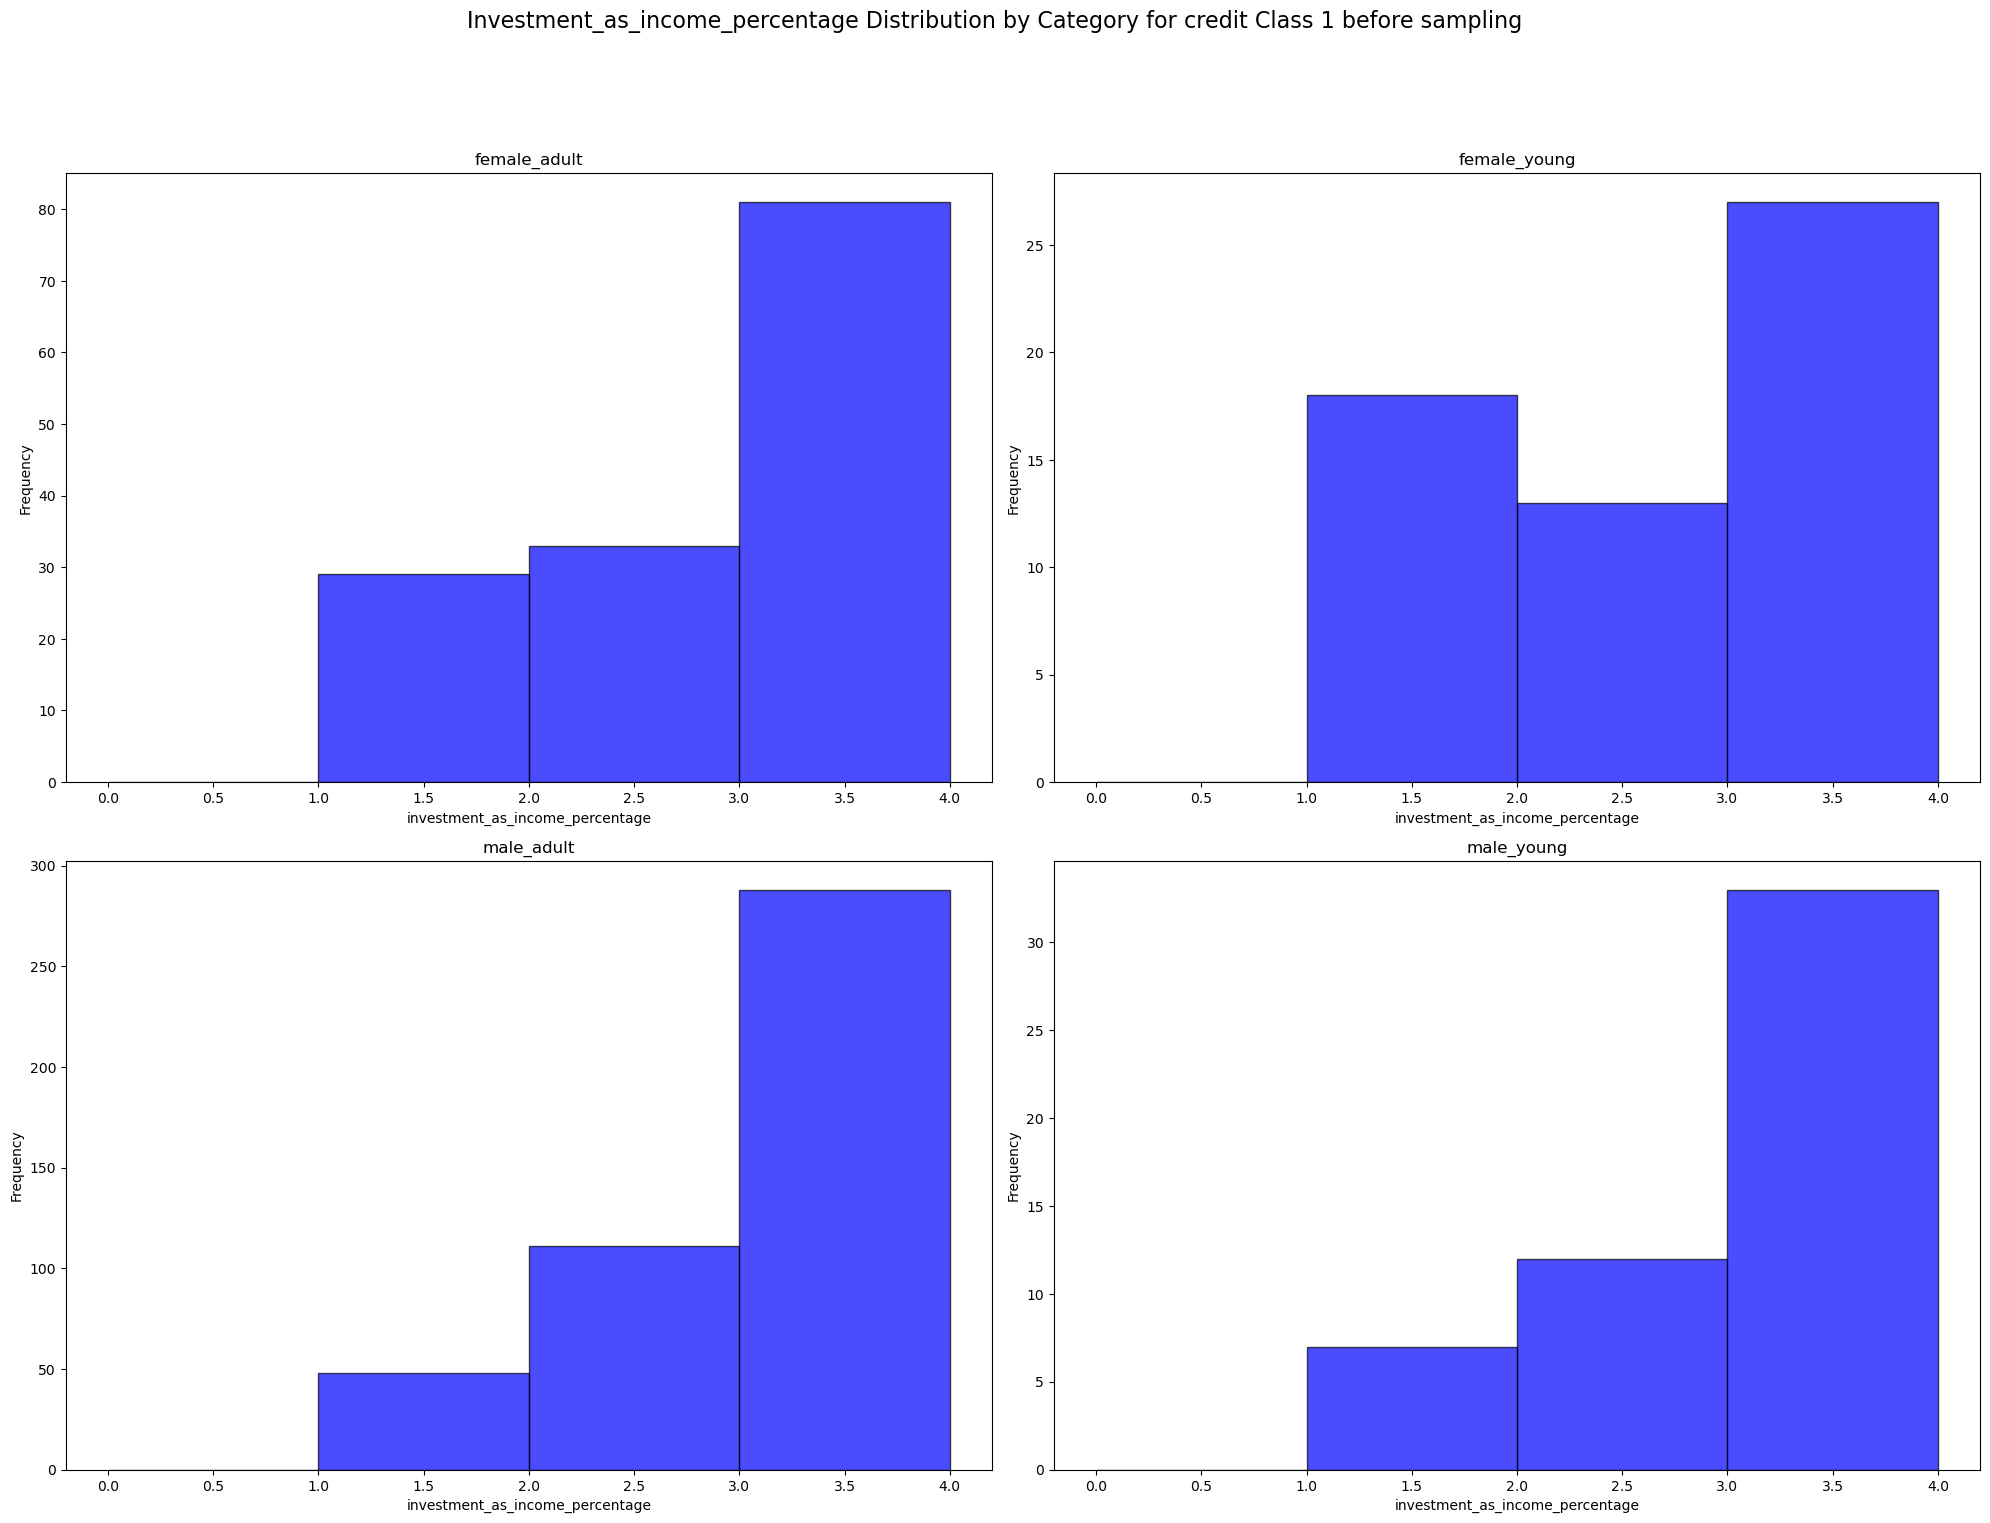

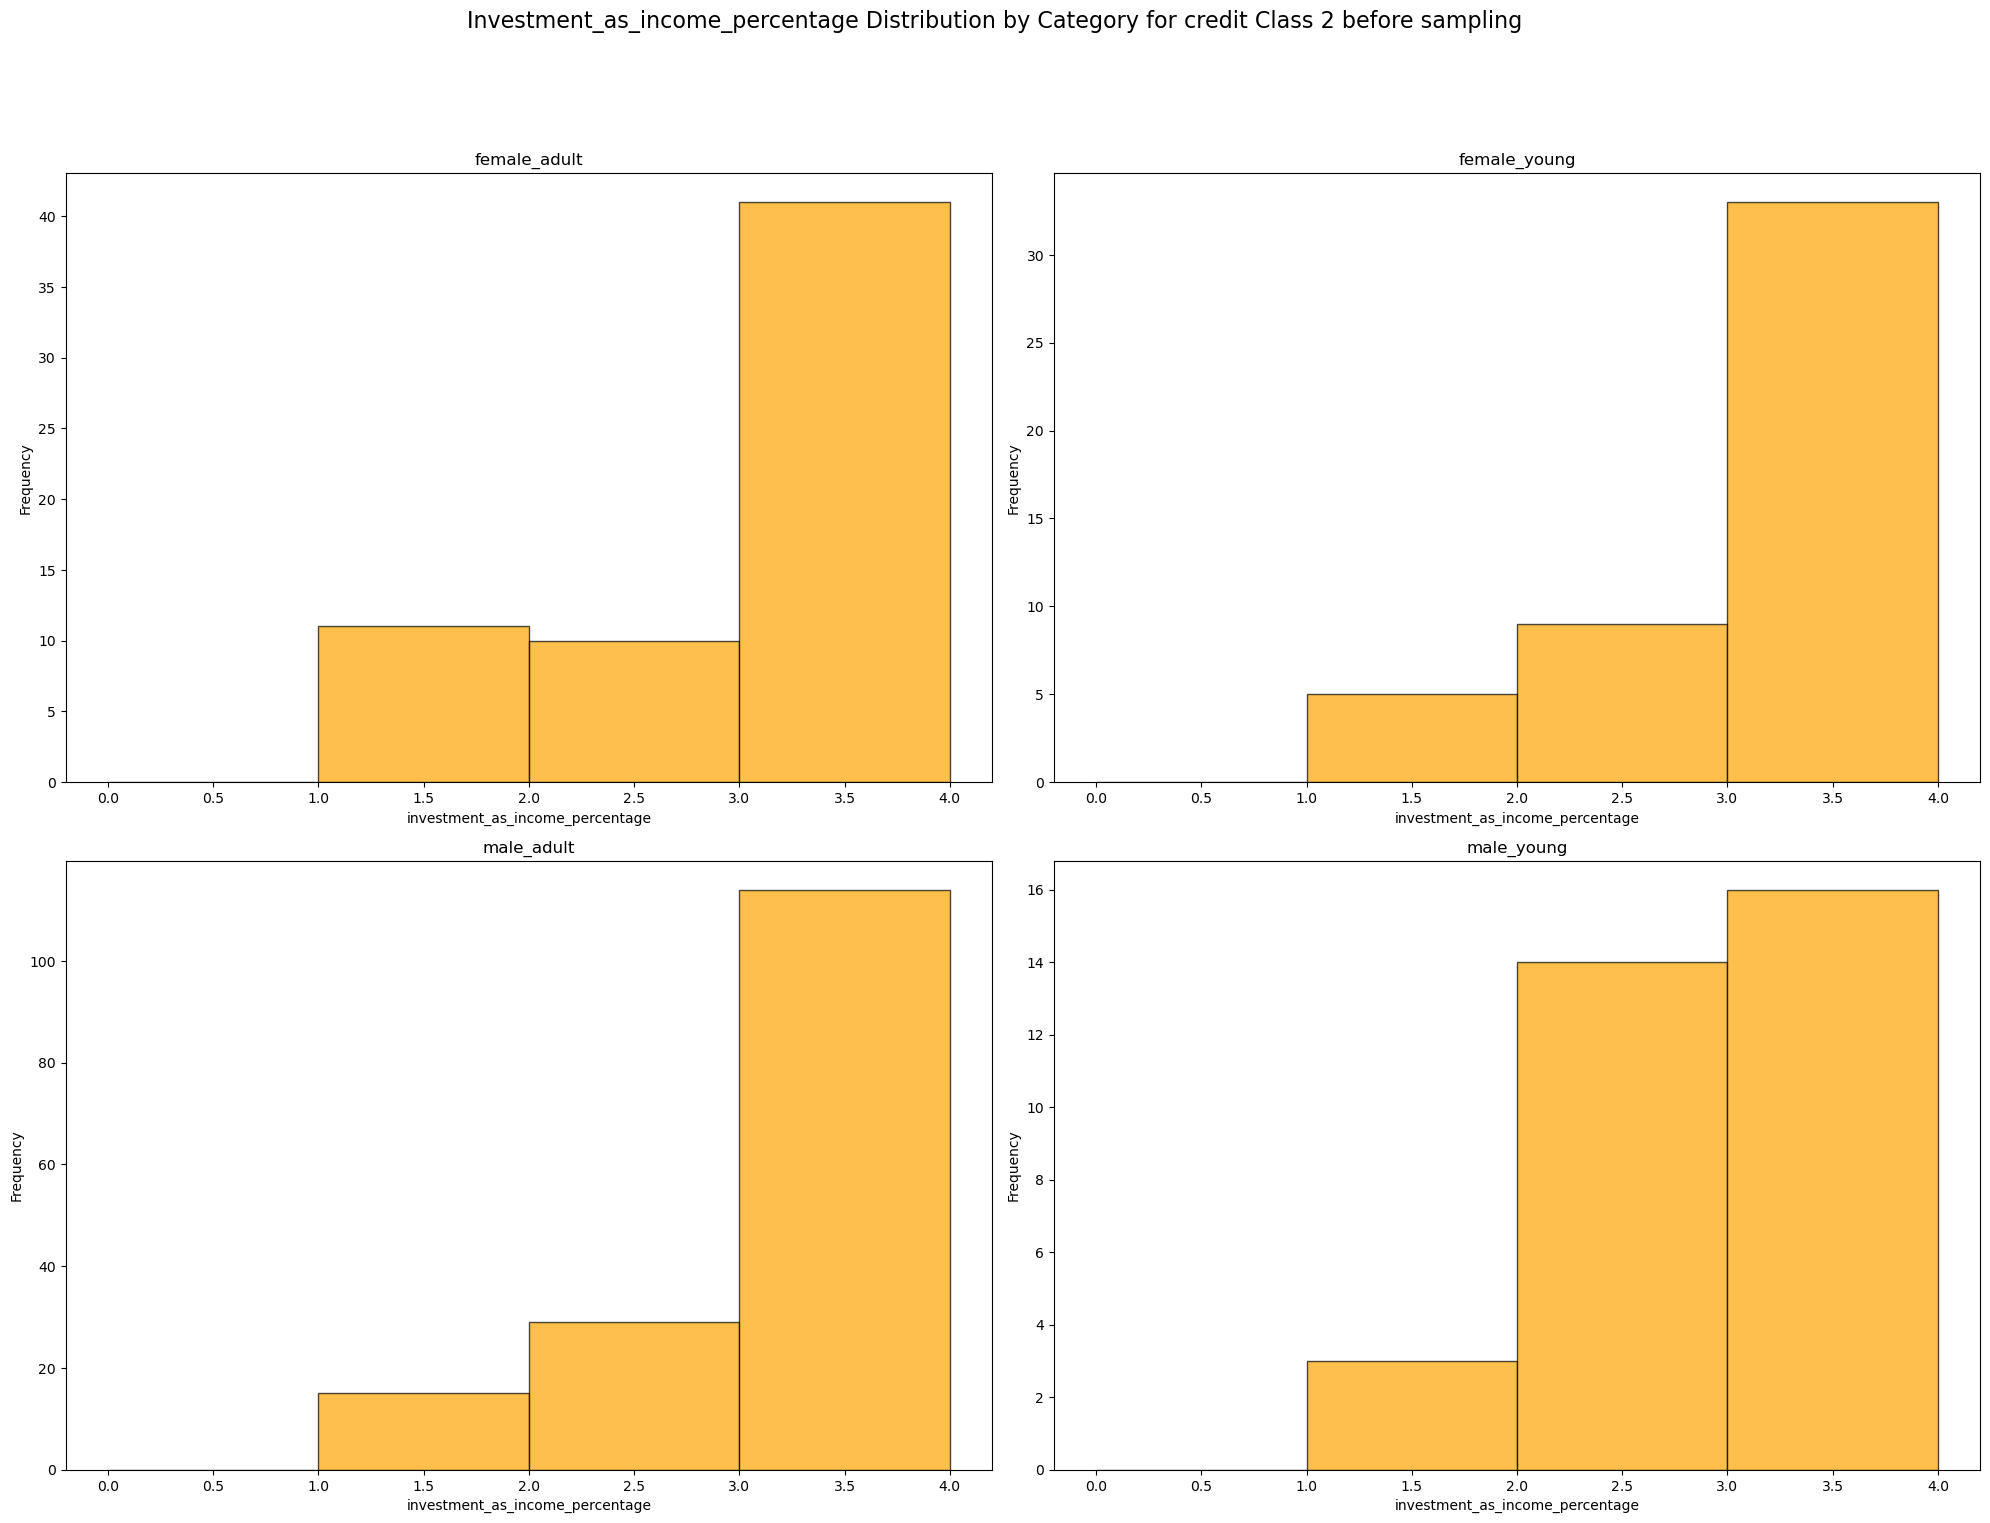

In [210]:
# Combine the categories into single strings for each row
combined_categories = data['sex'] + "_" + data['Age_Metric']

# Apply one-hot encoding to these combined categories
combined_one_hot_encoded = pd.get_dummies(combined_categories)

# Rename the columns to lowercase for consistency
combined_one_hot_encoded.columns = combined_one_hot_encoded.columns.str.lower()

# Show the first few rows of the combined one-hot encoded features to verify
combined_one_hot_encoded.head()

# Prepare the dataset with the one-hot encoded features and necessary columns for plotting
plotting_data = data[['investment_as_income_percentage', 'credit']].join(combined_one_hot_encoded)

# Set up the plotting environment
# Set up the plotting environment for Class 1A
plt.figure(figsize=(20, 30))
plt.suptitle('Investment_as_income_percentage Distribution by Category for credit Class 1 before sampling', fontsize=16)

for i, column in enumerate(combined_one_hot_encoded.columns, start=1):
    plt.subplot(4, 2, i)  # Adjust layout for 8 plots in one figure
    filtered_data_class_1 = plotting_data[(plotting_data[column] == 1) & (plotting_data['credit'] == 1)]
    plt.hist(filtered_data_class_1['investment_as_income_percentage'], bins=range(0, filtered_data_class_1['investment_as_income_percentage'].max() + 1), alpha=0.7, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel('investment_as_income_percentage')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Set up the plotting environment for Class 2
plt.figure(figsize=(20, 30))
plt.suptitle('Investment_as_income_percentage Distribution by Category for credit Class 2 before sampling', fontsize=16)

for i, column in enumerate(combined_one_hot_encoded.columns, start=1):
    plt.subplot(4, 2, i)  # Adjust layout for 8 plots in one figure
    filtered_data_class_2 = plotting_data[(plotting_data[column] == 1) & (plotting_data['credit'] == 2)]
    plt.hist(filtered_data_class_2['investment_as_income_percentage'], bins=range(0, filtered_data_class_2['investment_as_income_percentage'].max() + 1), alpha=0.7, color='orange', edgecolor='black')
    plt.title(column)
    plt.xlabel('investment_as_income_percentage')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [211]:
# Separate the dataset into two classes
data_class_1 = data[data['credit'] == 1]
data_class_2 = data[data['credit'] == 2]


# Oversample class 2
data_class_2_oversampled = resample(data_class_2,
                                    replace=True, # sample with replacement
                                    n_samples=len(data_class_1), # match number in class 1
                                    random_state=123) # reproducible results

balanced_data = pd.concat([data_class_1, data_class_2_oversampled])

# Check the new class distribution
balanced_data['credit'] = balanced_data['credit'].replace({1:0, 2:1})
balanced_class_distribution = balanced_data['credit'].value_counts()
balanced_class_distribution

credit
0    700
1    700
Name: count, dtype: int64

In [213]:
# Apply one-hot encoding to the balanced dataset for 'sex', 'Age_class', and 'race_class'
combined_columns_balanced = balanced_data['sex'] + "_" + balanced_data['Age_Metric'] 
one_hot_encoded_balanced = pd.get_dummies(combined_columns_balanced)

# Sum up the instances for each one-hot encoded column
column_sums_balanced = one_hot_encoded_balanced.sum()
print(column_sums_balanced)
# Initialize an empty DataFrame to hold the sampled rows
sampled_balanced_df = pd.DataFrame()

# First, ensure `balanced_data` has an index that we can use for joining
balanced_data.reset_index(drop=True, inplace=True)

# Similarly, reset the index on the one_hot_encoded_balanced to ensure alignment
one_hot_encoded_balanced.reset_index(drop=True, inplace=True)

# Now, join the balanced data with the one-hot encoded features
balanced_data_with_one_hot = pd.concat([balanced_data, one_hot_encoded_balanced], axis=1)

target_samples = 500

# Iterate over each one-hot encoded column to sample with replacement
for column in one_hot_encoded_balanced.columns:
    # Filter rows where the category is indicated
    category_rows = balanced_data_with_one_hot[balanced_data_with_one_hot[column] == 1]
    
    # Sample with replacement from these rows to reach the target count
    sampled_rows = category_rows.sample(n=target_samples, replace=True, random_state=123)
    
    # Since we're sampling per category, each set of sampled rows will have the category set to 1 and the rest to 0
    # Reset the one-hot encoded columns to reflect only the current category
    for col in one_hot_encoded_balanced.columns:
        sampled_rows[col] = 0
    sampled_rows[column] = 1
    
    # Append the sampled rows to the new DataFrame
    sampled_balanced_df = pd.concat([sampled_balanced_df, sampled_rows])

final_sampled_counts = sampled_balanced_df[one_hot_encoded_balanced.columns].sum()
#print(sampled_balanced_df)
print(final_sampled_counts)


female_Adult    278
female_Young    182
male_Adult      824
male_Young      116
dtype: int64
female_Adult    500
female_Young    500
male_Adult      500
male_Young      500
dtype: int64


TypeError: 'float' object cannot be interpreted as an integer

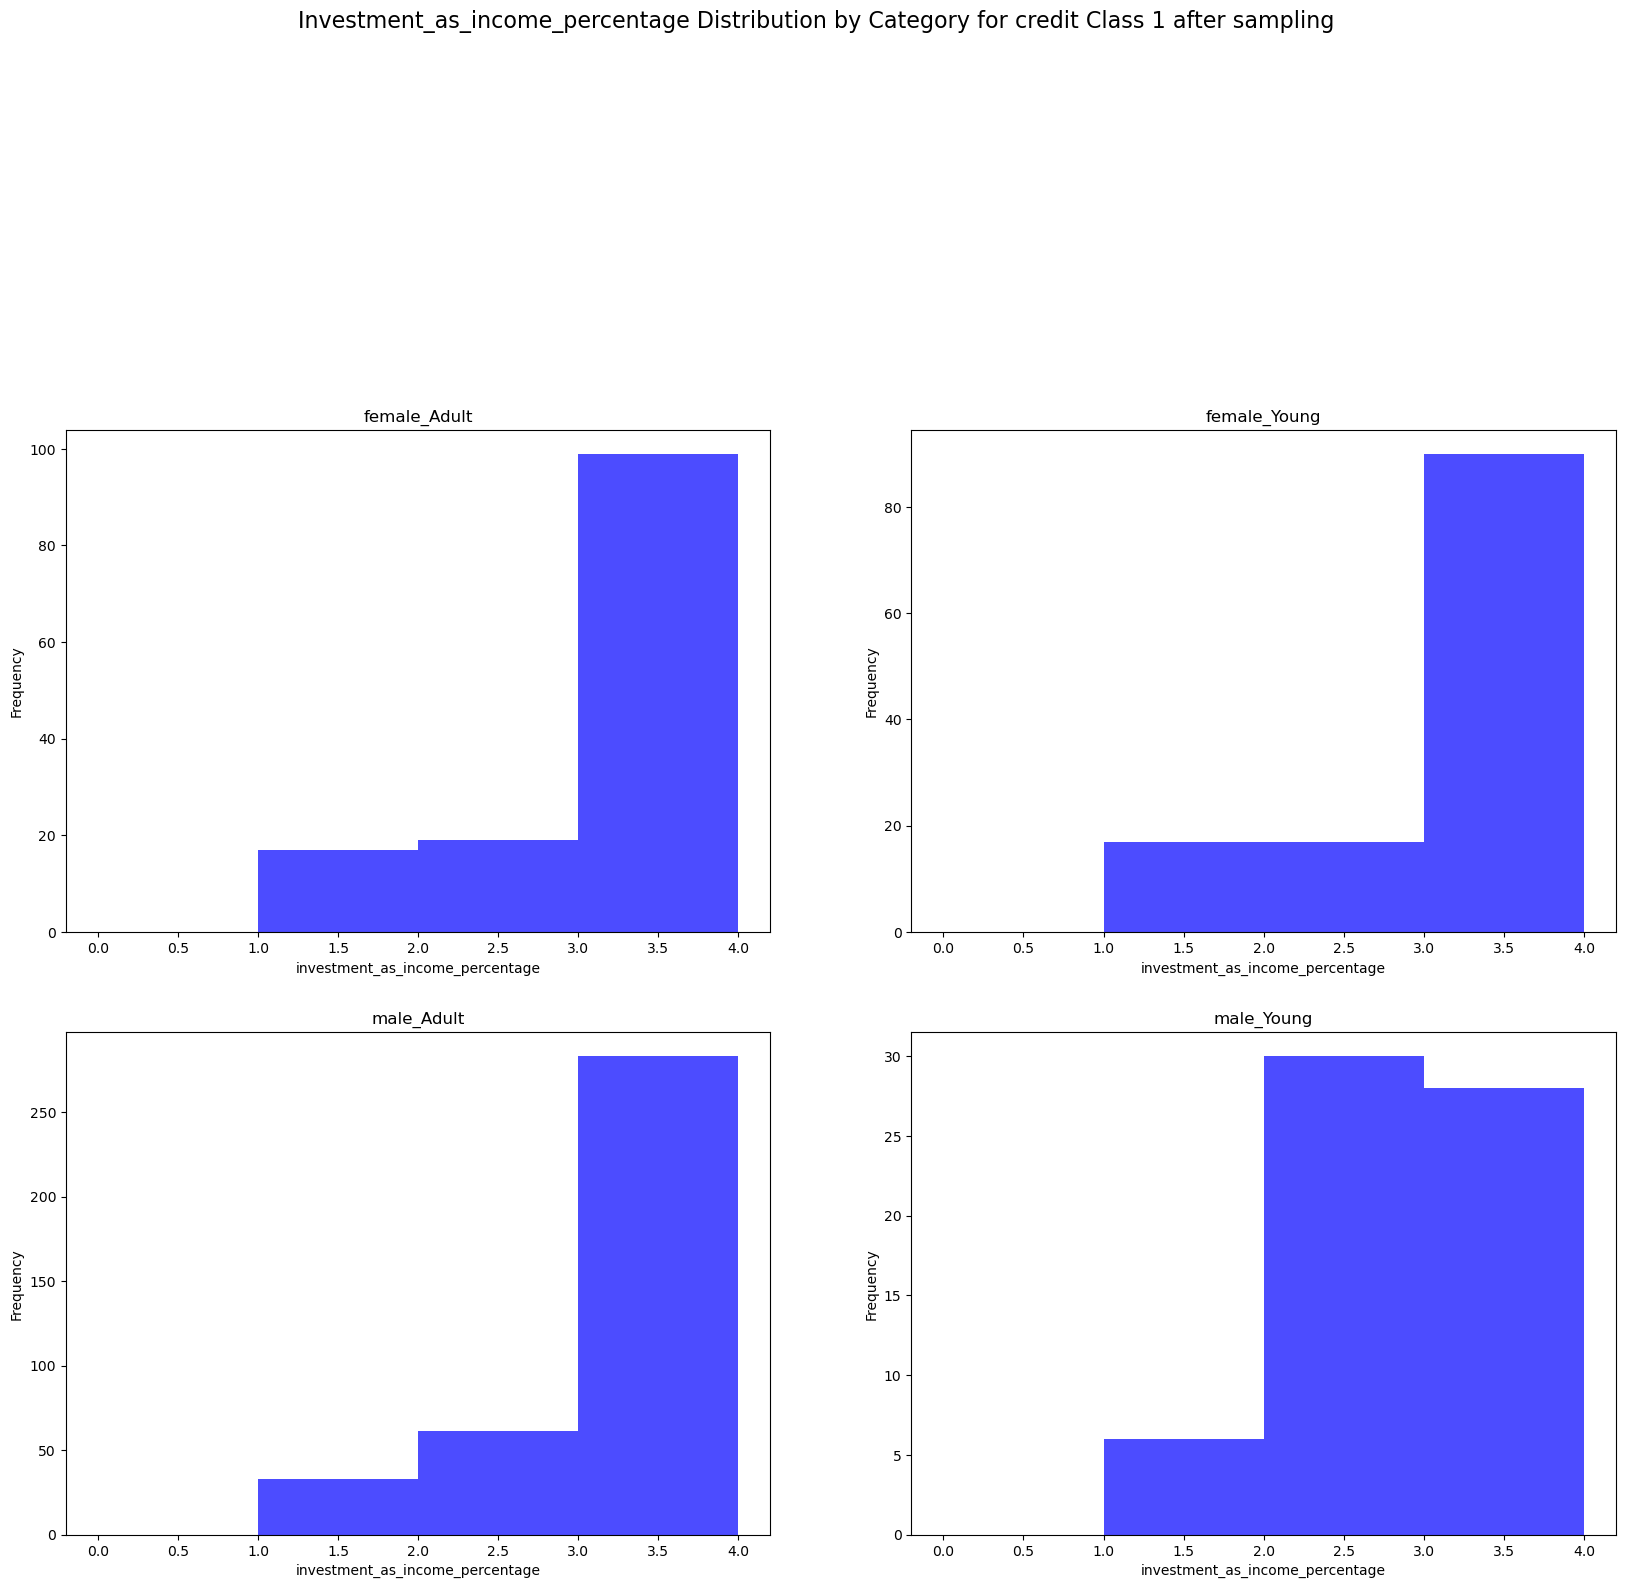

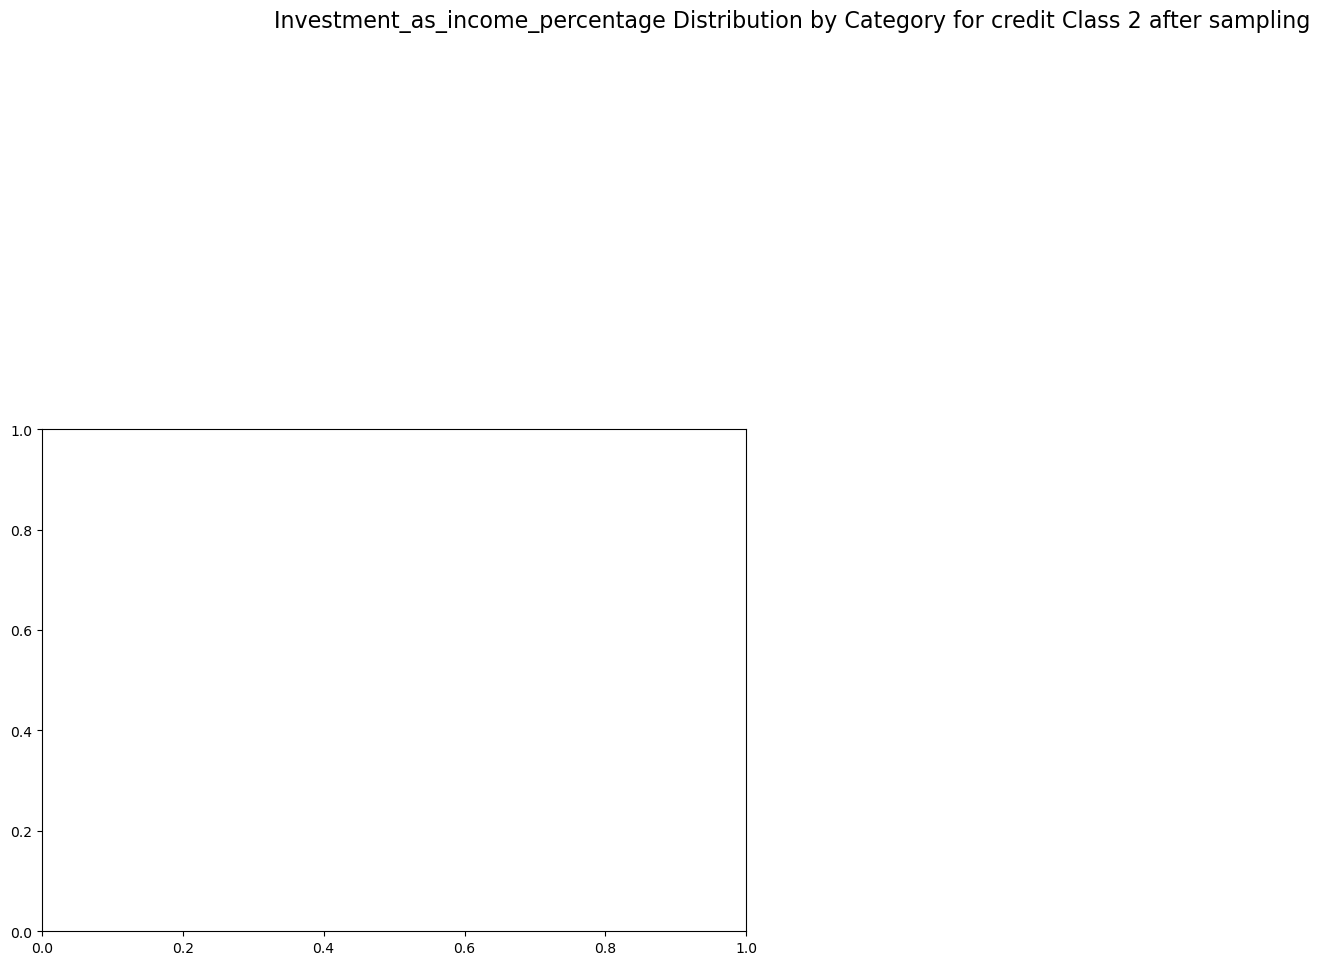

In [214]:
import matplotlib.pyplot as plt

# Define the layout for your subplots
plot_rows = 4  # Number of rows in the subplot grid
plot_cols = 2  # Number of columns in the subplot grid

# Set up the plotting environment for Class 1
plt.figure(figsize=(20, 30))
plt.suptitle('Investment_as_income_percentage Distribution by Category for credit Class 1 after sampling', fontsize=16, y=1.02)

# Plot for Class 1
for i, column in enumerate(one_hot_encoded_balanced.columns, start=1): 
    plt.subplot(plot_rows, plot_cols, i)
    # Filter data for the current category, for class 1
    category_class_1 = balanced_data_with_one_hot[(balanced_data_with_one_hot[column] == 1) & (balanced_data_with_one_hot['credit'] == 1)]
    # Plot histograms for class 1
    plt.hist(category_class_1['investment_as_income_percentage'], bins=range(0, category_class_1['investment_as_income_percentage'].max() + 1), alpha=0.7, color='blue')
    # Title and labels
    plt.title(column)
    plt.xlabel('investment_as_income_percentage')
    plt.ylabel('Frequency')

# Repeat for Class 2 in a new figure
plt.figure(figsize=(20, 30))
plt.suptitle('Investment_as_income_percentage Distribution by Category for credit Class 2 after sampling', fontsize=16, y=1.02)

# Plot for Class 2
for i, column in enumerate(one_hot_encoded_balanced.columns, start=1):  # Adjusted to include only the one-hot encoded columns
    plt.subplot(plot_rows, plot_cols, i)
    # Filter data for the current category, for class 2
    category_class_2 = balanced_data_with_one_hot[(balanced_data_with_one_hot[column] == 1) & (balanced_data_with_one_hot['credit'] == 2)]
    # Plot histograms for class 2
    plt.hist(category_class_2['investment_as_income_percentage'], bins=range(0, category_class_2['investment_as_income_percentage'].max() + 1), alpha=0.7, color='orange')
    # Title and labels
    plt.title(column)
    plt.xlabel('investment_as_income_percentage')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [118]:
# Calculate the correlation matrix
correlation_matrix = sampled_balanced_df.corr()
correlation_matrix.to_csv(r'C:\Users\olasu\OneDrive\Desktop\Resume and others\New folder\correlation_matrix.csv', index=True)
print(correlation_matrix)
#print(one_hot_encoded_data.corr())

print("Correlation of 'sex', 'age', and 'credits':")
print(correlation_matrix[['female_Adult', 'female_Young',  
                          'male_Adult', 'male_Young' ]])



                                    month  credit_amount  \
month                            1.000000       0.575060   
credit_amount                    0.575060       1.000000   
investment_as_income_percentage  0.063506      -0.237248   
residence_since                  0.066245       0.014633   
age                             -0.030632       0.041411   
number_of_credits                0.123280       0.138814   
people_liable_for               -0.038512      -0.011889   
credit                           0.240839       0.149353   
female_Adult                    -0.056267       0.004201   
female_Young                    -0.071717      -0.109438   
male_Adult                       0.012296       0.050753   
male_Young                       0.115689       0.054484   

                                 investment_as_income_percentage  \
month                                                   0.063506   
credit_amount                                          -0.237248   
investment_as_i

C:\Users\olasu\AppData\Local\Temp\ipykernel_6648\1988396441.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sampled_balanced_df.corr()


In [ ]:
## Dataset 3 COMPASS

In [162]:
import pandas as pd

# Load the data
file_path = r'C:\Users\olasu\Downloads\compas_data.csv'
data = pd.read_csv(file_path)

# Check the class distribution for Reoffending_Likelihood
class_distribution = data['Reoffending_Likelihood'].value_counts()
print(class_distribution)


1    3963
2    3251
Name: Reoffending_Likelihood, dtype: int64


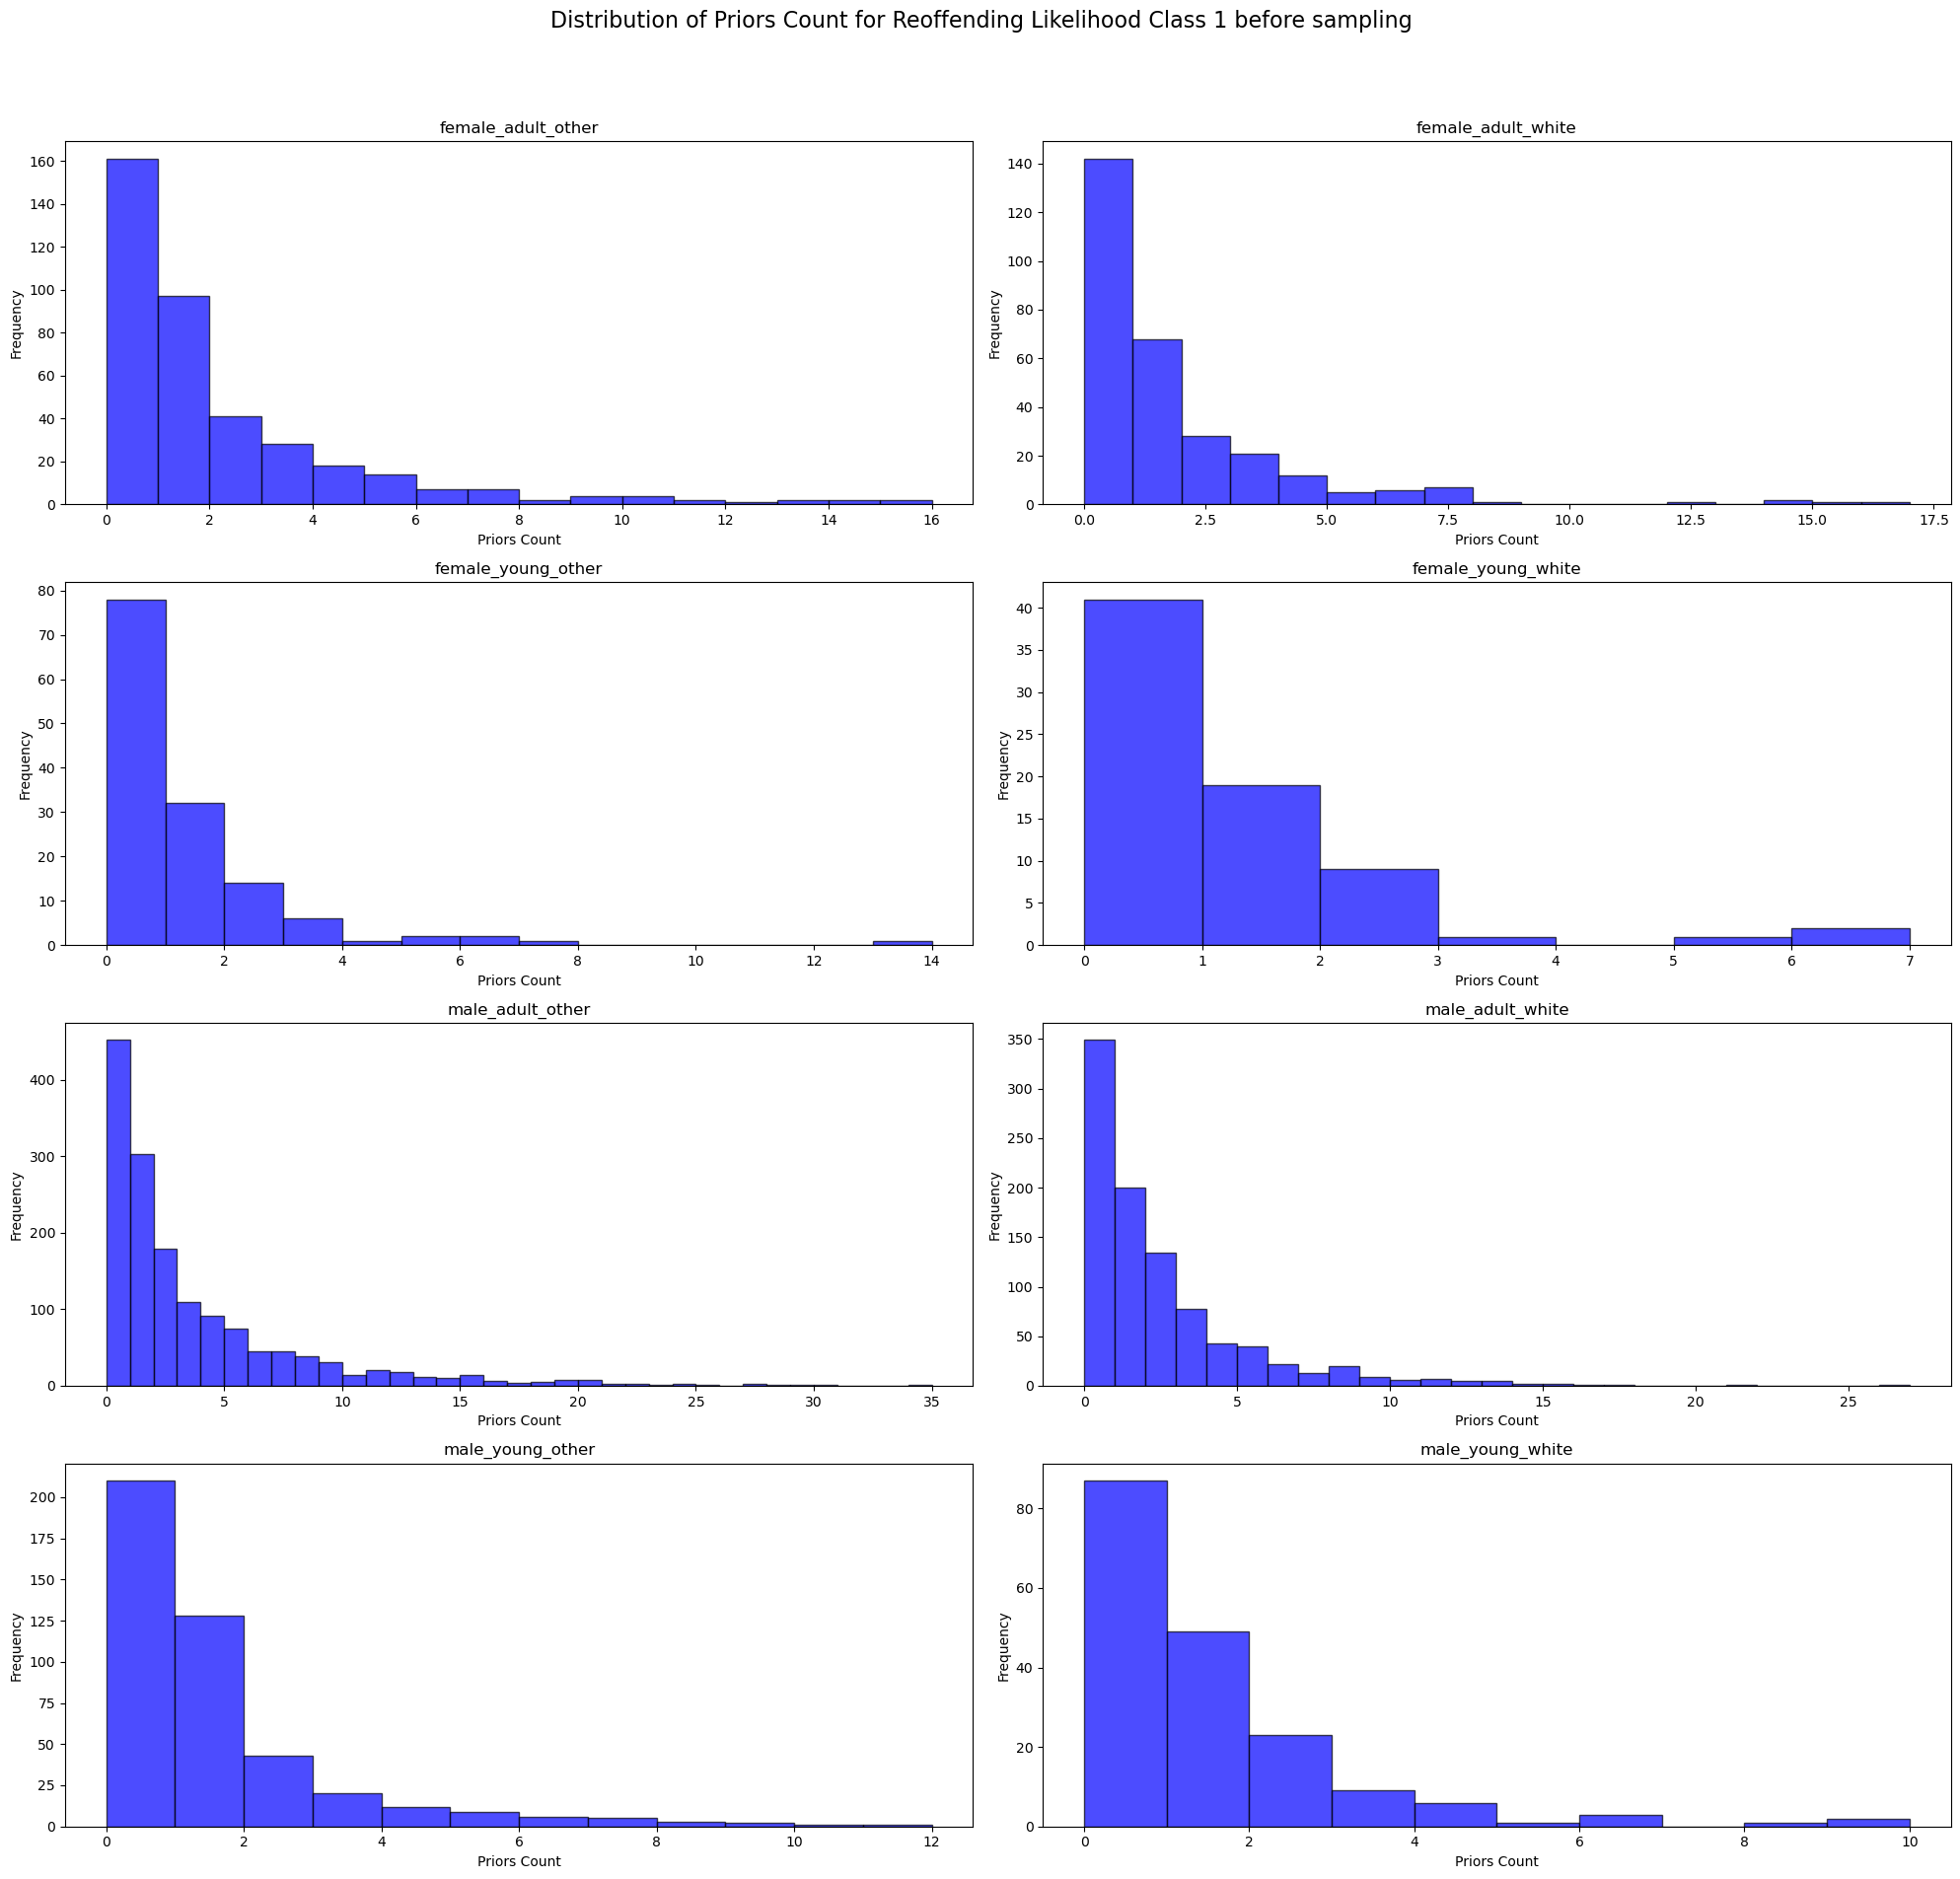

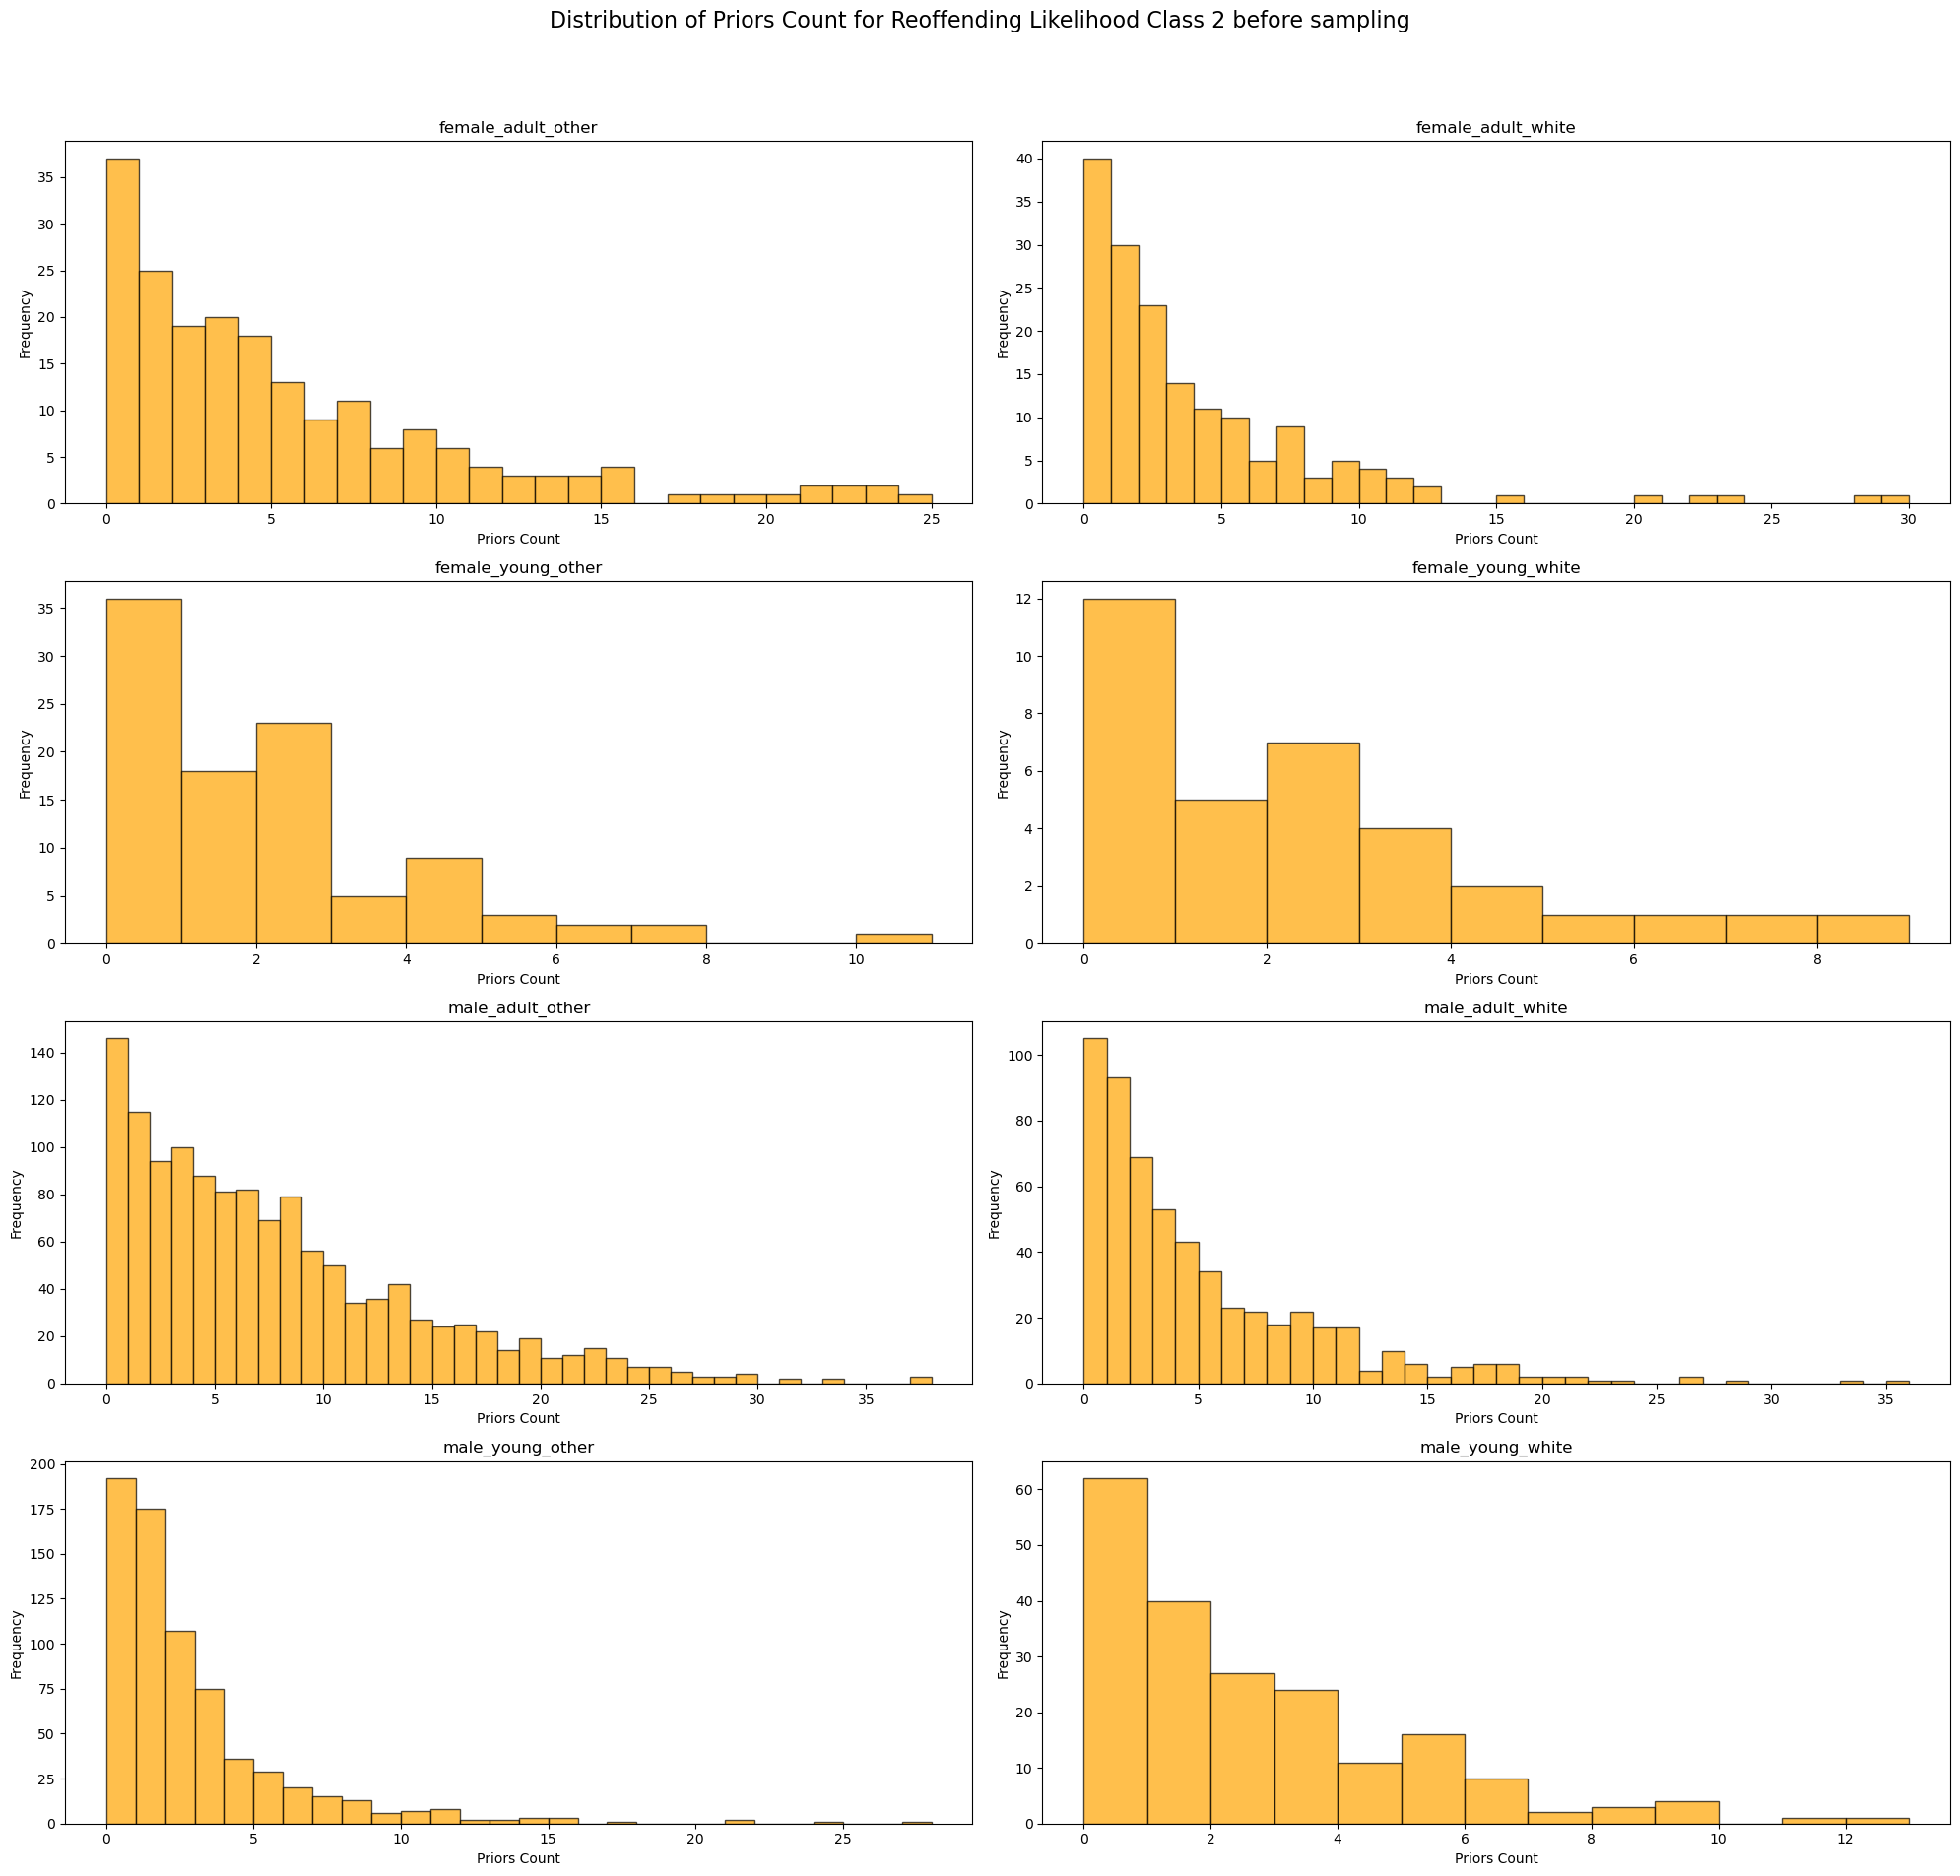

In [164]:

# Combine the categories into single strings for each row
combined_categories = data['sex'] + "_" + data['Age_class'] + "_" + data['race_class']

# Apply one-hot encoding to these combined categories
combined_one_hot_encoded = pd.get_dummies(combined_categories)

# Rename the columns to lowercase for consistency
combined_one_hot_encoded.columns = combined_one_hot_encoded.columns.str.lower()

# Show the first few rows of the combined one-hot encoded features to verify
combined_one_hot_encoded.head()

# Prepare the dataset with the one-hot encoded features and necessary columns for plotting
plotting_data = data[['priors_count', 'Reoffending_Likelihood']].join(combined_one_hot_encoded)

# Set up the plotting environment
# Set up the plotting environment for Class 1


plt.figure(figsize=(20, 20))
plt.suptitle('Distribution of Priors Count for Reoffending Likelihood Class 1 before sampling', fontsize=16)

for i, column in enumerate(combined_one_hot_encoded.columns, start=1):
    plt.subplot(4, 2, i)  # Adjust layout for 8 plots in one figure
    filtered_data_class_1 = plotting_data[(plotting_data[column] == 1) & (plotting_data['Reoffending_Likelihood'] == 1)]
    plt.hist(filtered_data_class_1['priors_count'], bins=range(0, filtered_data_class_1['priors_count'].max() + 1), alpha=0.7, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Priors Count')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Set up the plotting environment for Class 2
plt.figure(figsize=(20, 20))
plt.suptitle('Distribution of Priors Count for Reoffending Likelihood Class 2 before sampling', fontsize=16)

for i, column in enumerate(combined_one_hot_encoded.columns, start=1):
    plt.subplot(4, 2, i)  # Adjust layout for 8 plots in one figure
    filtered_data_class_2 = plotting_data[(plotting_data[column] == 1) & (plotting_data['Reoffending_Likelihood'] == 2)]
    plt.hist(filtered_data_class_2['priors_count'], bins=range(0, filtered_data_class_2['priors_count'].max() + 1), alpha=0.7, color='orange', edgecolor='black')
    plt.title(column)
    plt.xlabel('Priors Count')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

1    3963
2    3251
Name: Reoffending_Likelihood, dtype: int64
         sex  age Age_class race_class  juv_fel_count  decile_score  \
5851  Female   41     Adult      Other              0             6   
3698  Female   29     Adult      Other              0             3   
3856  Female   47     Adult      Other              0             6   
3238  Female   39     Adult      Other              0             6   
1018  Female   28     Adult      Other              0             5   
...      ...  ...       ...        ...            ...           ...   
4796    Male   22     Young      White              0             6   
4867    Male   25     Young      White              0             7   
4433    Male   25     Young      White              0             5   
6915    Male   24     Young      White              0             3   
206     Male   24     Young      White              0             4   

      juv_misd_count  juv_other_count  priors_count c_charge_degree  ...  \
5851    

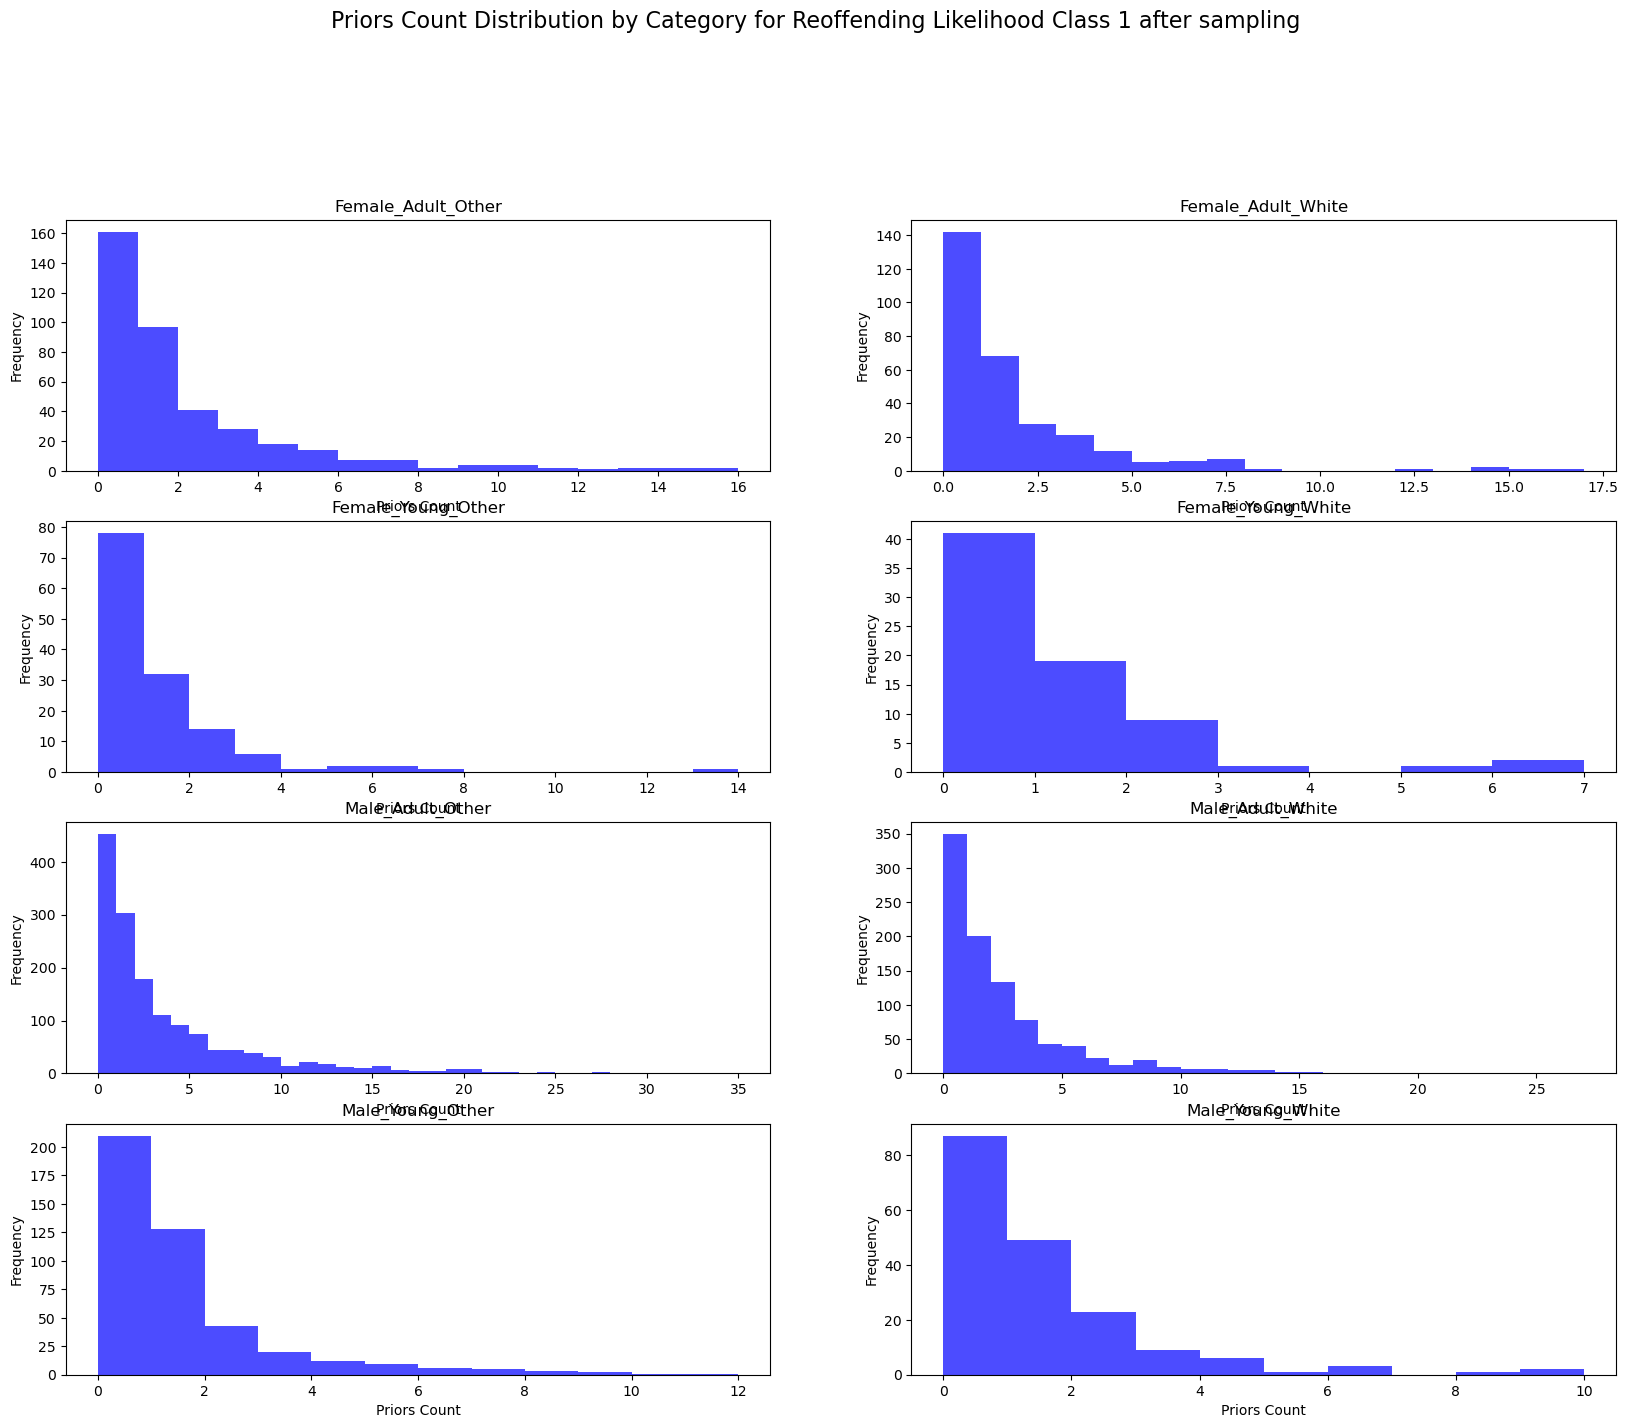

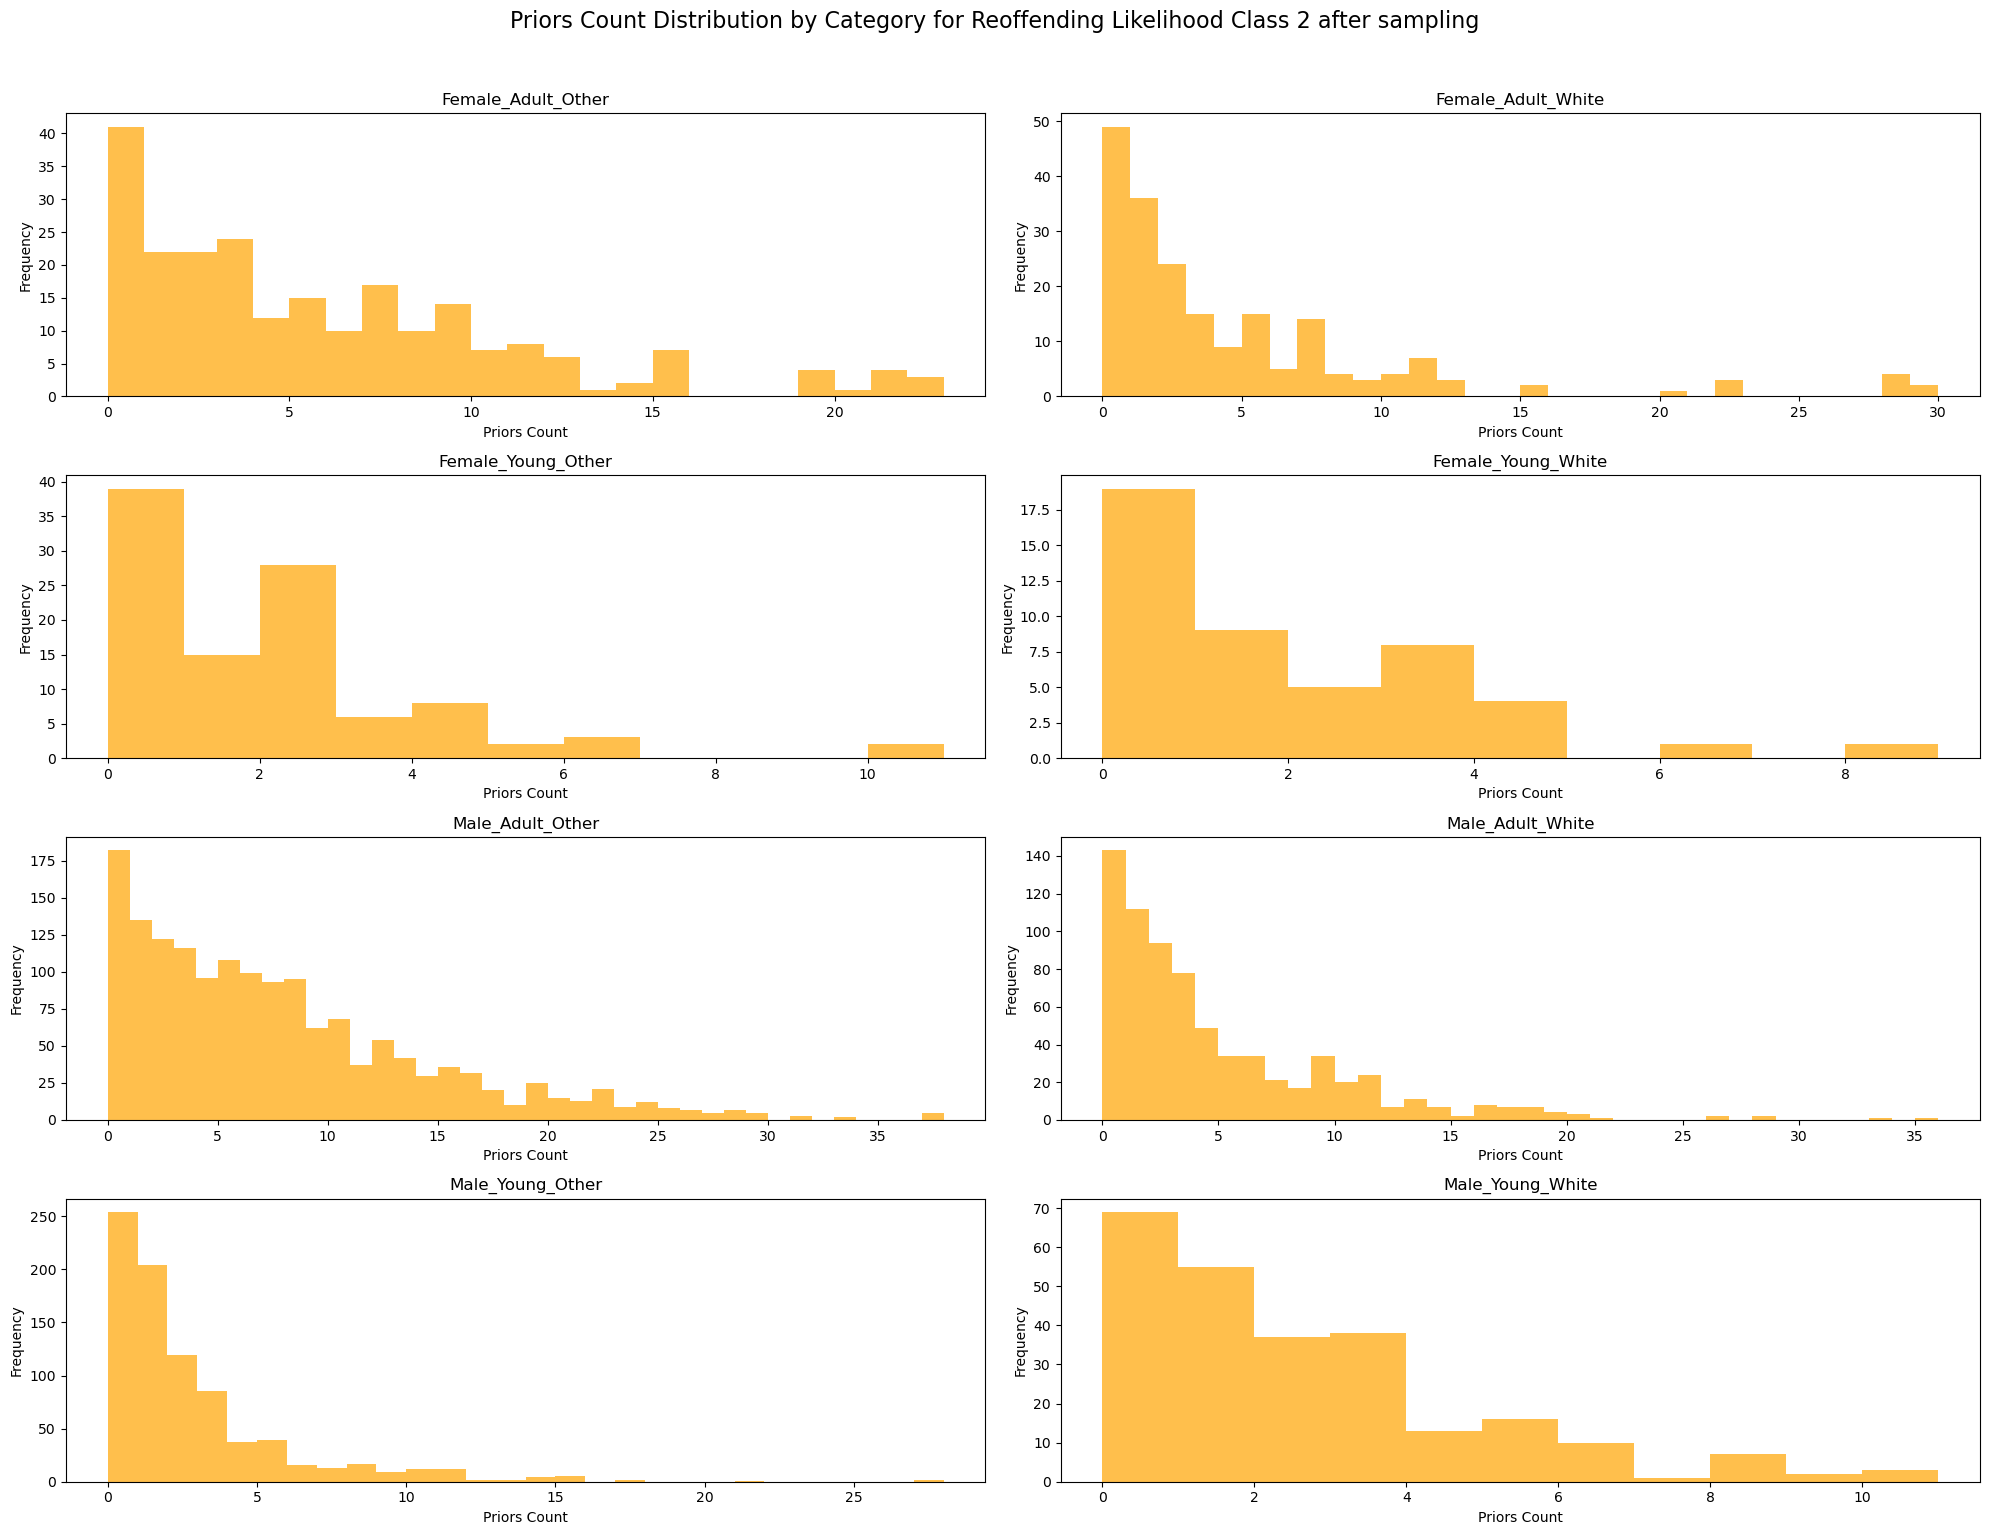

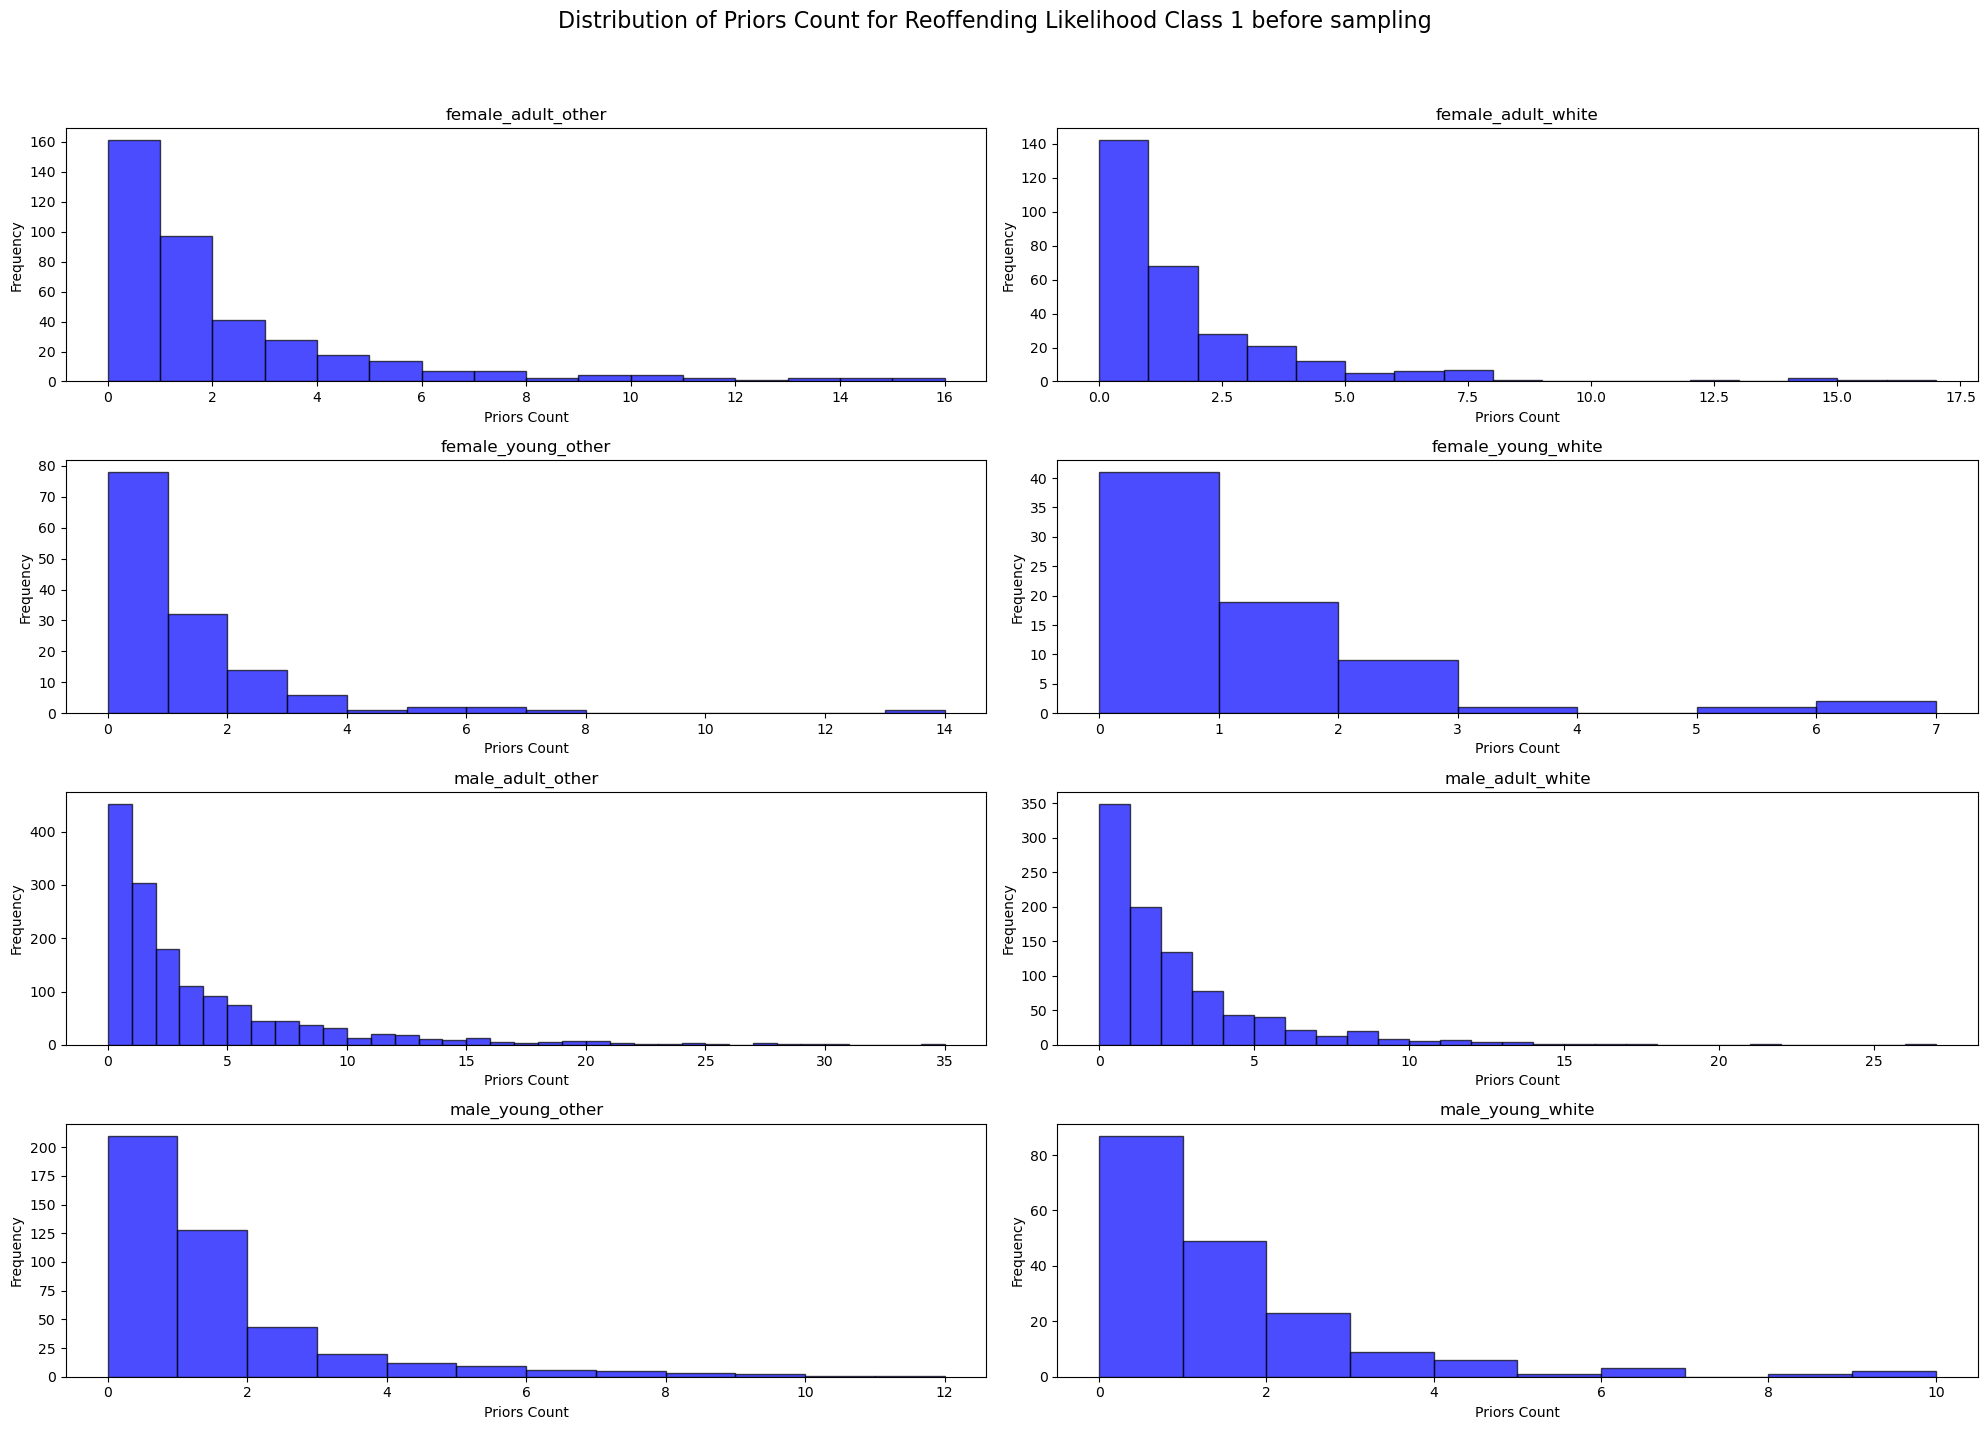

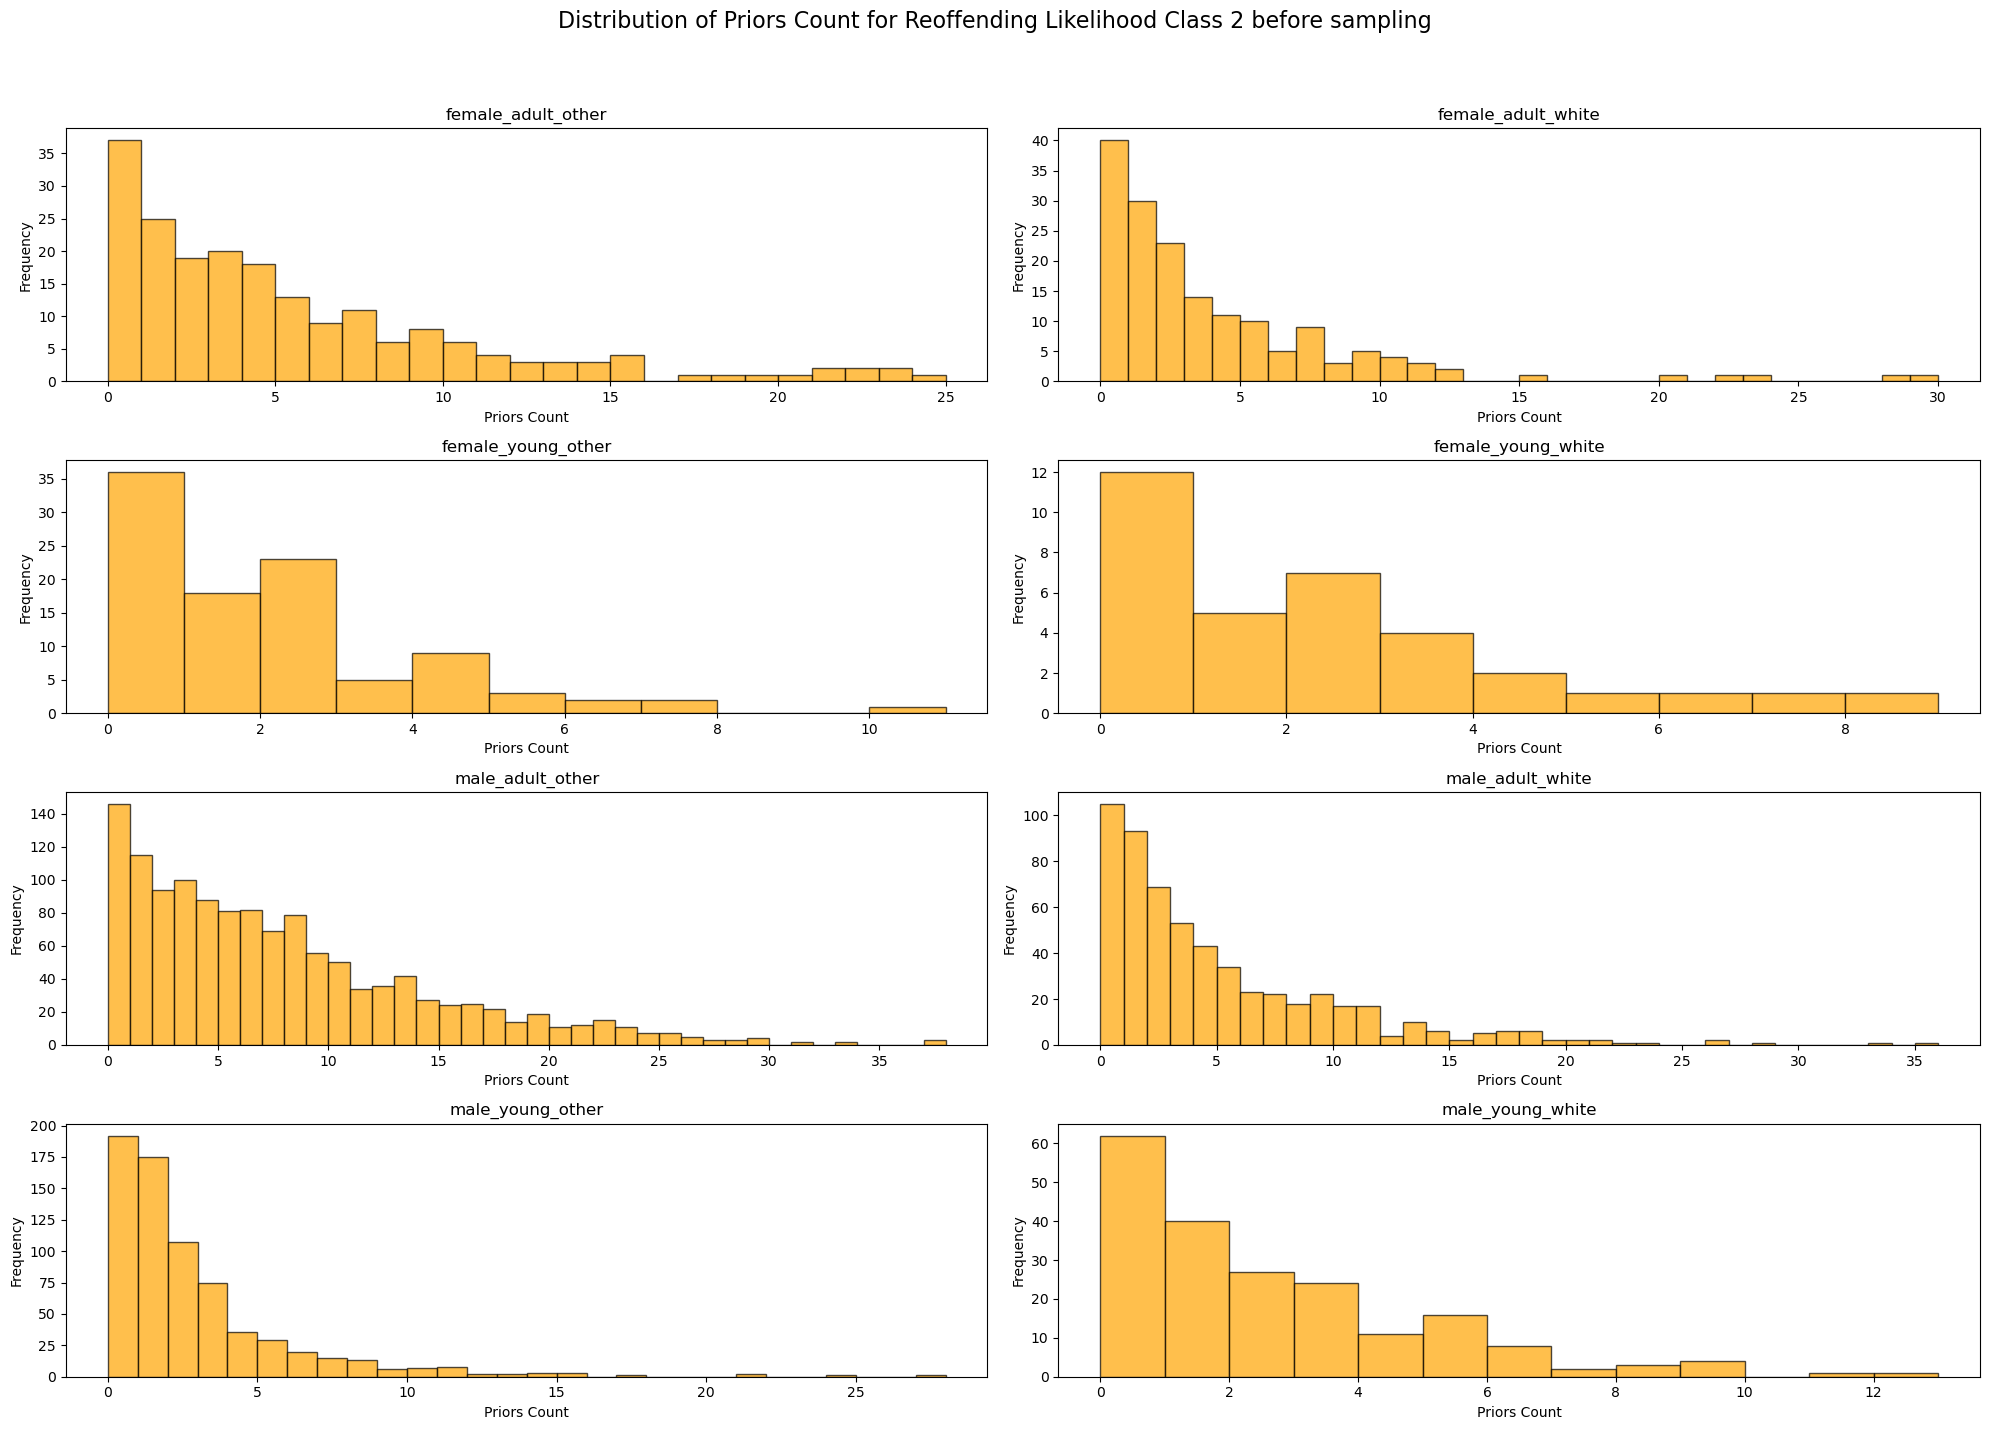

In [135]:



from sklearn.utils import resample

# Separate the dataset into two classes
data_class_1 = data[data['Reoffending_Likelihood'] == 1]
data_class_2 = data[data['Reoffending_Likelihood'] == 2]

# Oversample class 2
data_class_2_oversampled = resample(data_class_2,
                                    replace=True, # sample with replacement
                                    n_samples=len(data_class_1), # match number in class 1
                                    random_state=123) # reproducible results

# Combine the oversampled class 2 with class 1
balanced_data = pd.concat([data_class_1, data_class_2_oversampled])

# Check the new class distribution
balanced_class_distribution = balanced_data['Reoffending_Likelihood'].value_counts()
balanced_class_distribution

# Apply one-hot encoding to the balanced dataset for 'sex', 'Age_class', and 'race_class'
combined_columns_balanced = balanced_data['sex'] + "_" + balanced_data['Age_class'] + "_" + balanced_data['race_class']
one_hot_encoded_balanced = pd.get_dummies(combined_columns_balanced)

# Sum up the instances for each one-hot encoded column
column_sums_balanced = one_hot_encoded_balanced.sum()
column_sums_balanced
# Initialize an empty DataFrame to hold the sampled rows
sampled_balanced_df = pd.DataFrame()

# First, ensure `balanced_data` has an index that we can use for joining
balanced_data.reset_index(drop=True, inplace=True)

# Similarly, reset the index on the one_hot_encoded_balanced to ensure alignment
one_hot_encoded_balanced.reset_index(drop=True, inplace=True)

# Now, join the balanced data with the one-hot encoded features
balanced_data_with_one_hot = pd.concat([balanced_data, one_hot_encoded_balanced], axis=1)

target_samples =308

# Iterate over each one-hot encoded column to sample with replacement
for column in one_hot_encoded_balanced.columns:
    # Filter rows where the category is indicated
    category_rows = balanced_data_with_one_hot[balanced_data_with_one_hot[column] == 1]
    
    # Sample with replacement from these rows to reach the target count
    sampled_rows = category_rows.sample(n=target_samples, replace=True, random_state=123)
    
    # Since we're sampling per category, each set of sampled rows will have the category set to 1 and the rest to 0
    # Reset the one-hot encoded columns to reflect only the current category
    for col in one_hot_encoded_balanced.columns:
        sampled_rows[col] = 0
    sampled_rows[column] = 1
    
    # Append the sampled rows to the new DataFrame
    sampled_balanced_df = pd.concat([sampled_balanced_df, sampled_rows])

# After sampling for each category, we should have balanced counts for each one-hot encoded category
# However, since rows can belong to multiple categories, the total row count will be larger than in the original approach
# Summarize the final counts for each category
final_sampled_counts = sampled_balanced_df[one_hot_encoded_balanced.columns].sum()
print(sampled_balanced_df)
print(final_sampled_counts)












In [1]:
import matplotlib.pyplot as plt

# Define the layout for your subplots
plot_rows = 4  # Number of rows in the subplot grid
plot_cols = 2  # Number of columns in the subplot grid

# Set up the plotting environment for Class 1
plt.figure(figsize=(20, 25))
plt.suptitle('Priors Count Distribution by Category for Reoffending Likelihood Class 1 after sampling', fontsize=16, y=1.02)

# Plot for Class 1
for i, column in enumerate(one_hot_encoded_balanced.columns, start=1):  # Adjusted to include only the one-hot encoded columns
    plt.subplot(plot_rows, plot_cols, i)
    # Filter data for the current category, for class 1
    category_class_1 = balanced_data_with_one_hot[(balanced_data_with_one_hot[column] == 1) & (balanced_data_with_one_hot['Reoffending_Likelihood'] == 1)]
    # Plot histograms for class 1
    plt.hist(category_class_1['priors_count'], bins=range(0, category_class_1['priors_count'].max() + 1), alpha=0.7, color='blue')
    # Title and labels
    plt.title(column)
    plt.xlabel('Priors Count')
    plt.ylabel('Frequency')

# Repeat for Class 2 in a new figure
plt.figure(figsize=(15, 25))
plt.suptitle('Priors Count Distribution by Category for Reoffending Likelihood Class 2 after sampling', fontsize=16, y=1.02)

# Plot for Class 2
for i, column in enumerate(one_hot_encoded_balanced.columns, start=1):  # Adjusted to include only the one-hot encoded columns
    plt.subplot(plot_rows, plot_cols, i)
    # Filter data for the current category, for class 2
    category_class_2 = balanced_data_with_one_hot[(balanced_data_with_one_hot[column] == 1) & (balanced_data_with_one_hot['Reoffending_Likelihood'] == 2)]
    # Plot histograms for class 2
    plt.hist(category_class_2['priors_count'], bins=range(0, category_class_2['priors_count'].max() + 1), alpha=0.7, color='orange')
    # Title and labels
    plt.title(column)
    plt.xlabel('Priors Count')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

NameError: name 'one_hot_encoded_balanced' is not defined

<Figure size 2000x2500 with 0 Axes>

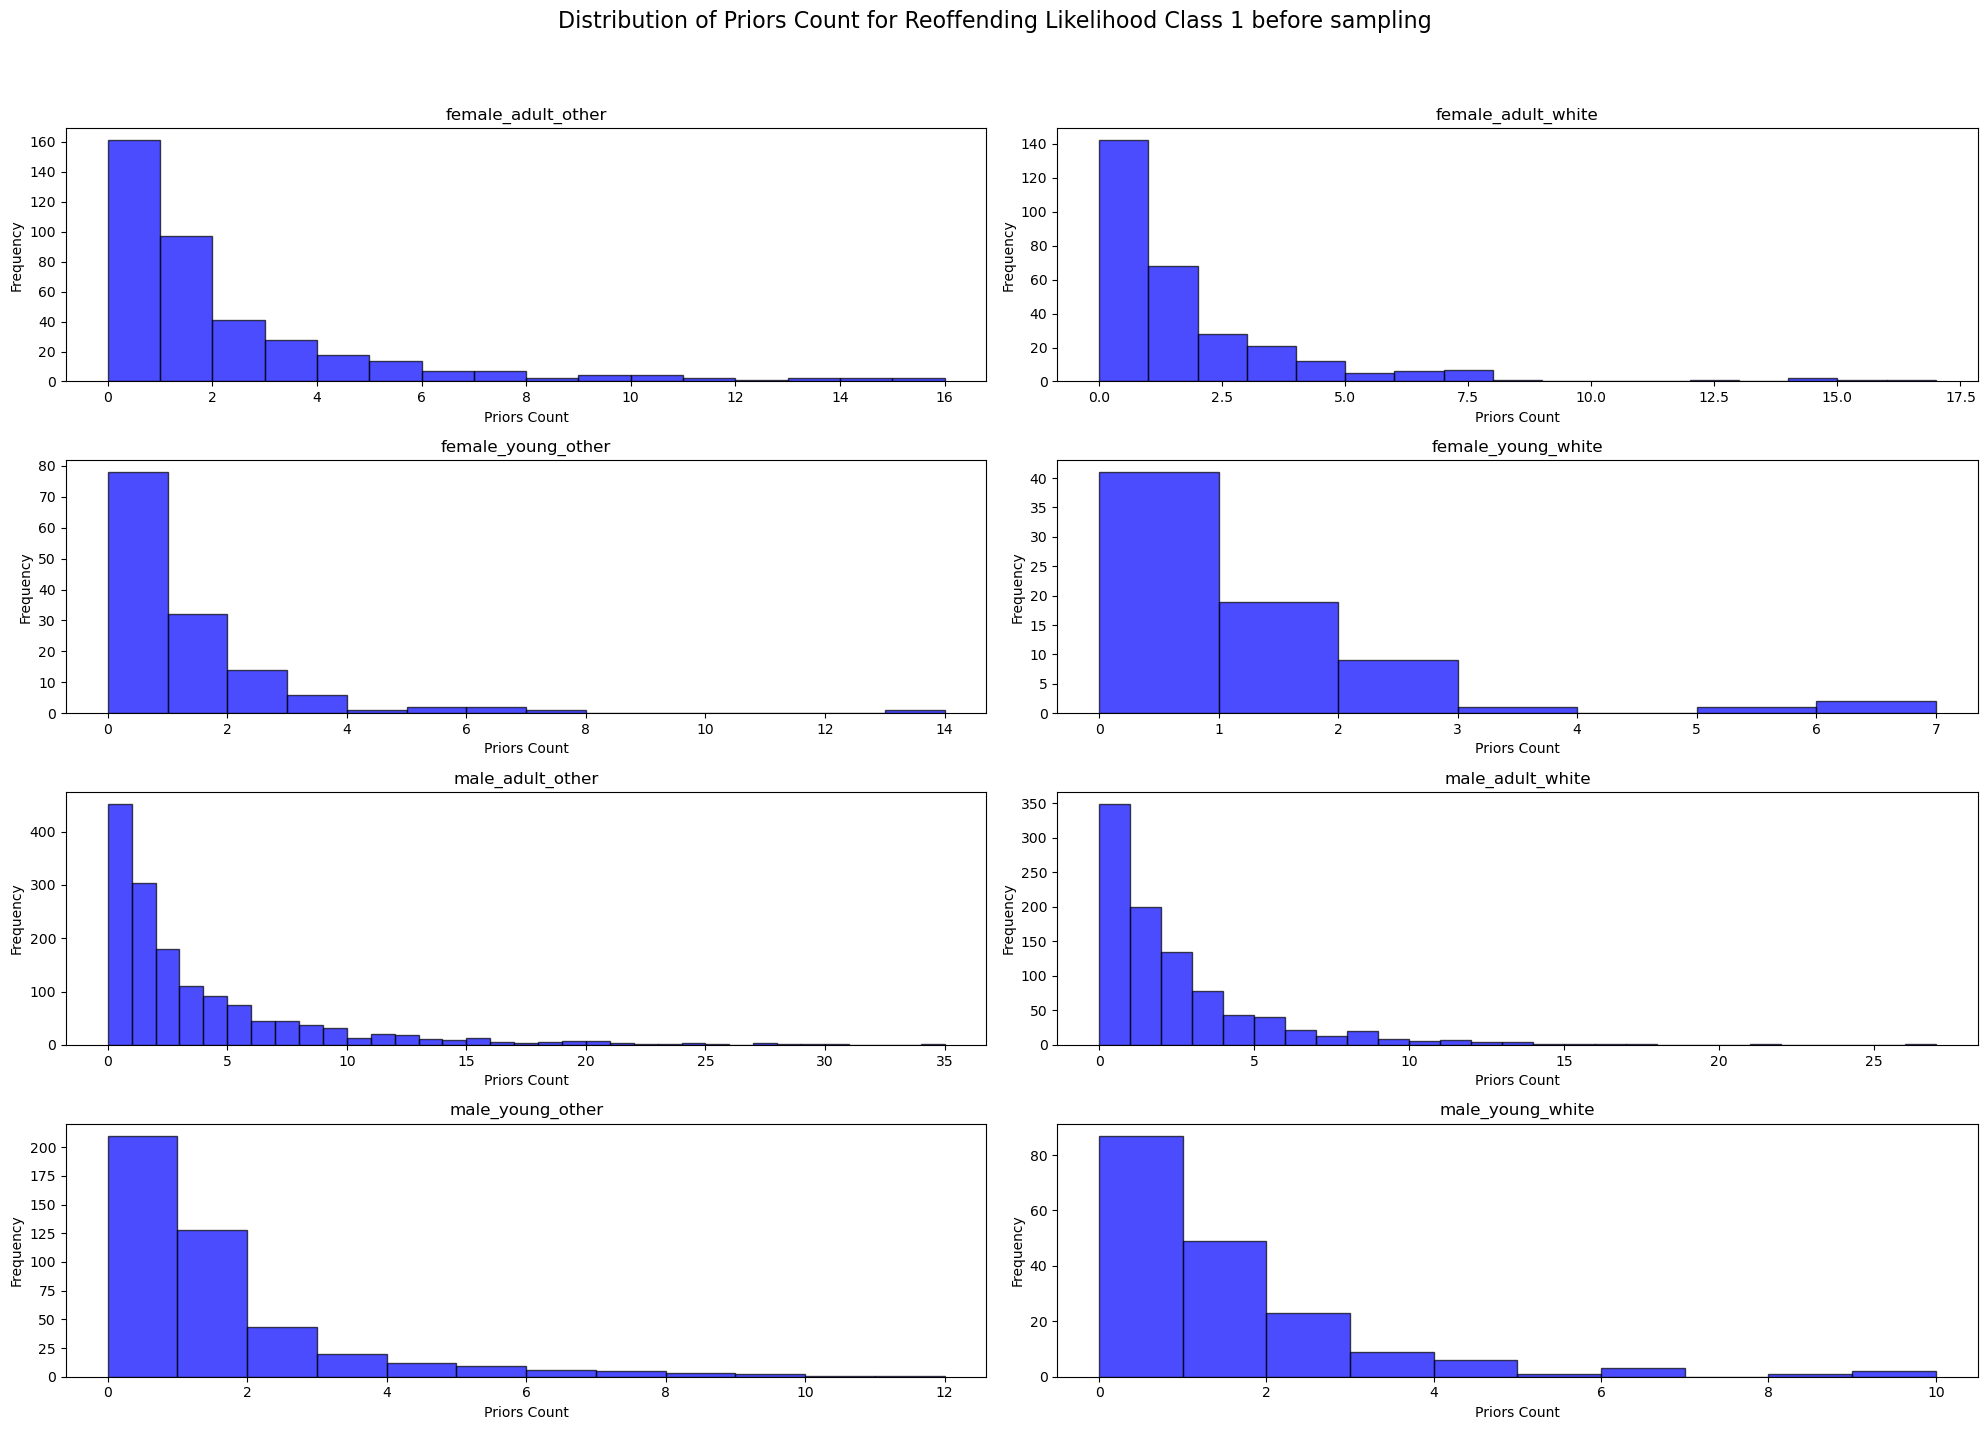

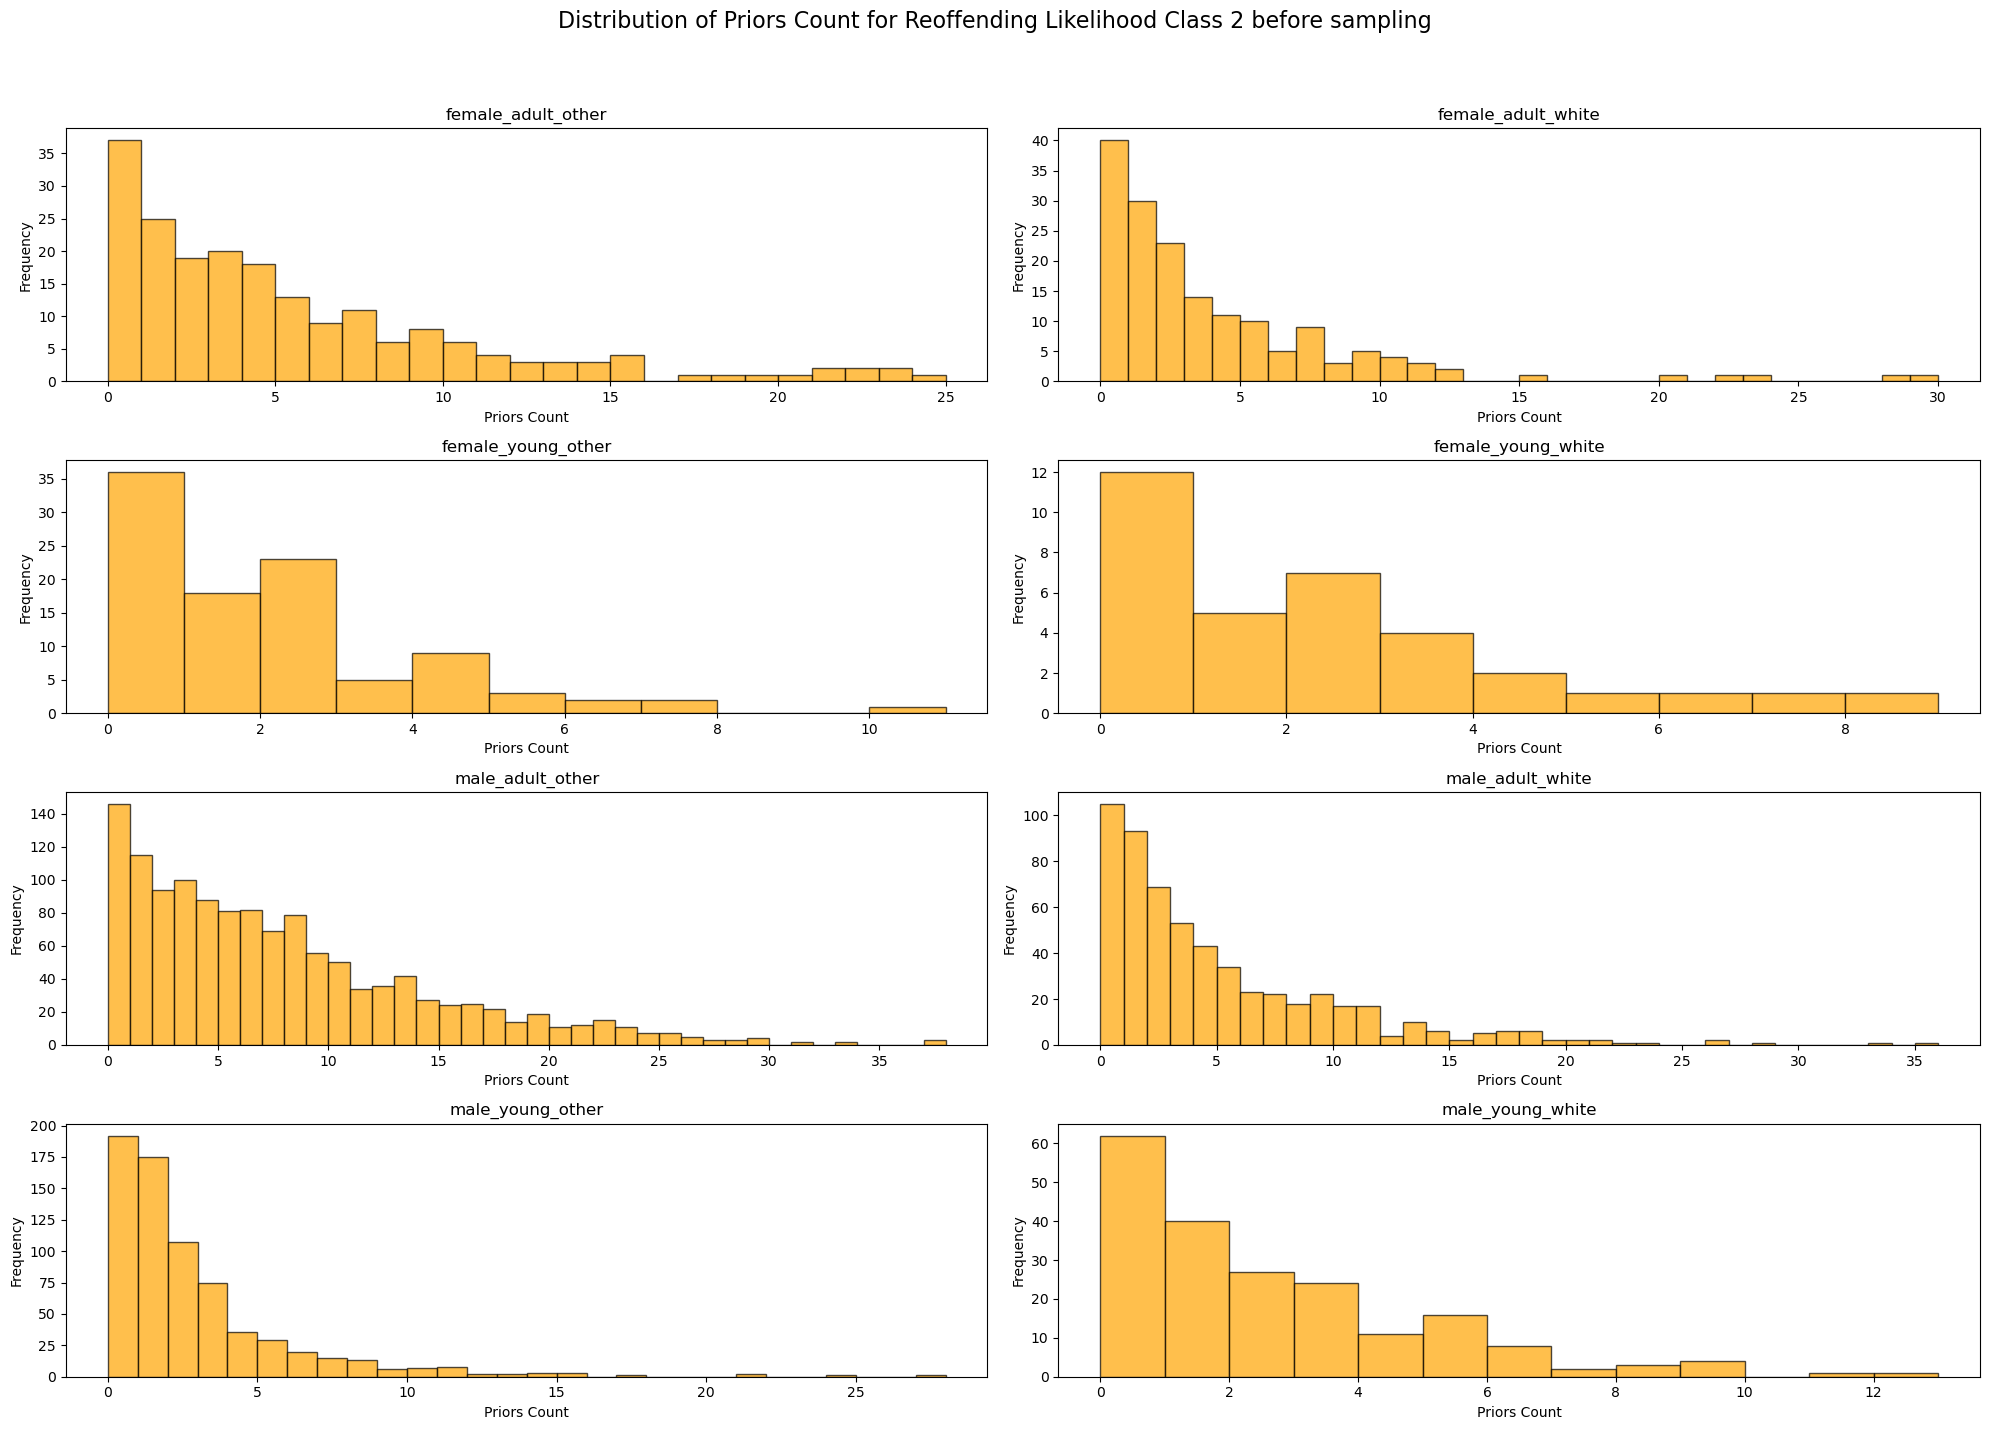